In [1]:
'''
Followee of the Followee Tweets (Potential Candidates)
Imports data from MongoDB and writes them into text files
'''
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import math,json



APP_KEY = 'e1bW6auCkvTBFo584p0PT45LX'
APP_SECRET = 'Fbqx55tPseFqWkAIX6JYKBdRljdDmyANlRfj0hf33vTixIc7xn'

ACCESS_TOKEN = "2480170513-m16MApiRW4rgIfU19MDA95JSRpLgt3nng4SOQaB"
ACCESS_TOKEN_SECRET= "80qoDoKUdyyn7RQfHZMtXCFQxaZ2OZEpZsvKCRA3L88j3"

import twitter
api = twitter.Api(consumer_key=APP_KEY,
                  consumer_secret=APP_SECRET,
                  access_token_key=ACCESS_TOKEN,
                  access_token_secret=ACCESS_TOKEN_SECRET)


In [ ]:
results = api.GetSearch("#turkishairlines or @turkishairlines",count=100,result_type='recent',return_json=True,max_id=results['statuses'][-1]['id'])


In [2]:
import nltk
def stop_words_list():
    '''
        A stop list specific to the observed timelines composed of noisy words
        This list would change for different set of timelines
    '''
    return ['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','really','see','want','nice',
            'while','know','free','today','day','always','last','put','live',
            'week','went','wasn','was','used','ugh','try','kind', 'http','much',
            'need', 'next','app','ibm','appleevent','using']


stoplist  = set(  nltk.corpus.stopwords.words("english")
                    + nltk.corpus.stopwords.words("french")
                    + nltk.corpus.stopwords.words("german")
                    + stop_words_list())

In [3]:
import re
def clean_tweet(tweet):
    cleaned_tweet = re.sub('\@.*|RT', '', tweet)
    cleaned_tweet = re.sub(r"http\S+|www\S+", "", cleaned_tweet)
    cleaned_tweet = re.sub(r"[^A-z]", " ", cleaned_tweet)
    cleaned_tweet = re.sub(' +',' ',cleaned_tweet)
    cleaned_tweet = cleaned_tweet.strip()
    return cleaned_tweet

In [ ]:
with open("/home/sruteeshkumar/personal/Freelancer/social_media_analysis/tweets_turkishairlines.json",'w') as fin:
    results = api.GetSearch("#turkishairlines",count=100,result_type='recent',return_json=True)
    json.dump(results_1['statuses'],fin)
    fin.write('\n')
    
    for i in range(100):
        try:

            print('getting ', (i+1)*100)
            results = api.GetSearch("#turkishairlines",count=100,result_type='recent',return_json=True,max_id=results['statuses'][-1]['id'])
            json.dump(results['statuses'],fin)
            fin.write('\n')
        except Exception as e:
            print(e)
            pass

In [ ]:
with open("/home/sruteeshkumar/personal/Freelancer/social_media_analysis/tweets_turkishairlines_mentions.json",'w') as fin:
    results = api.GetSearch("@turkishairlines",count=100,result_type='recent',return_json=True)
    json.dump(results['statuses'],fin)
    fin.write('\n')
    
    for i in range(100):
        try:

            print('getting ', (i+1)*100)
            results = api.GetSearch("@turkishairlines",count=100,result_type='recent',return_json=True,max_id=results['statuses'][-1]['id'])
            json.dump(results['statuses'],fin)
            fin.write('\n')
        except Exception as e:
            print(e)
            pass

In [ ]:
tweets_list= []
with open("/home/sruteeshkumar/personal/Freelancer/social_media_analysis/tweets_turkishairlines.json") as fin:
    for line in fin:
        line = json.loads(line)
        tweets_list.append(line)

In [ ]:
tweets_mentions_list= []
with open("/home/sruteeshkumar/personal/Freelancer/social_media_analysis/tweets_turkishairlines_mentions.json") as fin:
    for line in fin:
        line = json.loads(line)
        tweets_mentions_list.append(line)

In [ ]:
tweets_list = tweets_list+tweets_mentions_list

In [ ]:
def get_flag(tweet):
    if tweet['user']['screen_name'].lower()=='turkishairlines':
        return 'own_tweet'
    elif 'RT' in tweet['text']:
        return 'retweet'
    elif (tweet['in_reply_to_status_id'] is None) and (tweet['in_reply_to_status_id'] is None) and (tweet['in_reply_to_status_id'] is  None):
        return 'user_tweet'
    elif any(x is not None for x in [tweet['in_reply_to_status_id'],tweet['in_reply_to_status_id'],tweet['in_reply_to_status_id']]):
        return 'reply'

In [ ]:
from collections import defaultdict
count=0
hashtags=[]
processed_tweets=[]
for tweets in tweets_list:
    for tweet in tweets:
        selected_info = defaultdict(dict)
        selected_info['tweet_id'] = tweet['id']
        selected_info['tweet_time'] = tweet['created_at']
        selected_info['tweet_favorite_count'] = tweet['favorite_count']
        selected_info['tweet_retweet_count'] = tweet['retweet_count']
        selected_info['tweet_geo'] = tweet['geo']
        selected_info['tweet_lang'] = tweet['lang']
        selected_info['tweet_place'] = tweet['place']
        selected_info['tweet_text'] = tweet['text']
        selected_info['user'] = tweet['user']['name']
        selected_info['user_vintage'] = tweet['user']['created_at']
        selected_info['user_screen_name'] = tweet['user']['screen_name']
        selected_info['user_statuses_count'] = tweet['user']['statuses_count']
        selected_info['user_followers_count'] = tweet['user']['followers_count']
        selected_info['user_favourites_count'] = tweet['user']['favourites_count']
        selected_info['user_friends_count'] = tweet['user']['friends_count']
        selected_info['user_location'] = tweet['user']['location']
        selected_info['user_id'] = tweet['user']['id']
        selected_info['tweet_hashtags'] = [i['text'] for i in tweet['entities']['hashtags']]
        selected_info['tweet_user_mentions'] = [i['screen_name'] for i in tweet['entities']['user_mentions']]
        selected_info['tweet_user_mention_ids'] = [i['id'] for i in tweet['entities']['user_mentions']]
        cleaned_tweet = clean_tweet(str(tweet['text']))
        tweet_tokens = [i.lower() for i in cleaned_tweet.split() if i not in stoplist]
        selected_info['tweet_cleaned'] = cleaned_tweet
        selected_info['tweet_tokens'] = tweet_tokens
        selected_info['tweet_type'] = get_flag(tweet)
        processed_tweets.append(selected_info)

In [ ]:
df = pd.DataFrame(processed_tweets)

In [ ]:
df2 = df.drop_duplicates(subset='tweet_id')

In [ ]:
from sentiment_neuron.encoder import Model
global neuron_model
neuron_model = Model()

In [ ]:
def predict_sentiment(text_list):

    text_features = neuron_model.transform(text_list)
    prediced = []
    for i in text_features:
        prediced.append(i[2388])
    return prediced

In [ ]:
df['sentiment'] = predict_sentiment(df['tweet_text'].values)

In [ ]:
def give_sentiment(score):
    if score>0.2:
        return 'positive'
    elif score<-0.2:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment_class']= df['sentiment'].apply(lambda x: give_sentiment(x))

In [ ]:
df.to_csv("./turkishairlines_twitter_analysis_v2.csv",index=False)

In [4]:
df = pd.read_csv("./turkishairlines_twitter_analysis_v2.csv")

In [6]:
df.head()

,tweet_cleaned,tweet_favorite_count,tweet_geo,tweet_hashtags,tweet_id,tweet_lang,tweet_place,tweet_retweet_count,tweet_text,tweet_time,...,user_favourites_count,user_followers_count,user_friends_count,user_id,user_location,user_screen_name,user_statuses_count,user_vintage,sentiment,sentiment_class
0,Go live up in the sky above the fairy city of ...,0,NaN,['GoBeyond'],972831617277464576,en,NaN,100,RT @TurkishAirlines: ✈️\nGo live up in the sky...,Sun Mar 11 13:48:26 +0000 2018,...,7868,1569,419,969446544679333888,"London, England",DailyG13,7406,Fri Mar 02 05:37:22 +0000 2018,0.570212,positive
1,Istanbul Travel Cruise You ve been warned Stay...,1,NaN,"['Istanbul', 'Travel', 'Cruise', 'TurkishAirli...",972825809013616641,en,NaN,0,#Istanbul #Travel #Cruise @TUIGroup #TurkishAi...,Sun Mar 11 13:25:21 +0000 2018,...,14268,5064,1152,3302455838,NaN,Amercans4YPG,25699,Fri Jul 31 13:21:01 +0000 2015,-0.161688,neutral
2,NaN,0,NaN,"['TurkishAirlines', 'Boeing', 'Airbus']",972823577308401664,fr,NaN,1,RT @Ibrahimova_GNL: #TurkishAirlines prévoit d...,Sun Mar 11 13:16:29 +0000 2018,...,360,94,153,960397685747576837,NaN,pamplemousseeee,596,Mon Feb 05 06:20:26 +0000 2018,0.206704,positive
3,_ _ turkishairlines tkmoments,0,NaN,"['روعة_الشمال_التركي', 'turkishairlines', 'tkm...",972822317989617664,ar,NaN,58,RT @AnAmd05: من أفضل المطاعم في طرابزون👍\nhttp...,Sun Mar 11 13:11:29 +0000 2018,...,346,23865,4158,594013443,"Türkiye, kuwait",mishari_beck,36719,Tue May 29 18:30:01 +0000 2012,0.072621,neutral
4,In our flight training center which is the lar...,0,NaN,[],972814464453136384,en,NaN,85,RT @TurkishAirlines: ✈\nIn our flight training...,Sun Mar 11 12:40:17 +0000 2018,...,1621,0,10,938361961758240768,NaN,Therealnin2,3955,Wed Dec 06 10:58:20 +0000 2017,0.534541,positive


In [5]:
import datefinder

In [8]:
%matplotlib inline

In [45]:
text = ['wonderful experience!!! #turkishairlines']
text_features = neuron_model.transform(text)
print(text_features[2388])

NameError: name 'neuron_model' is not defined

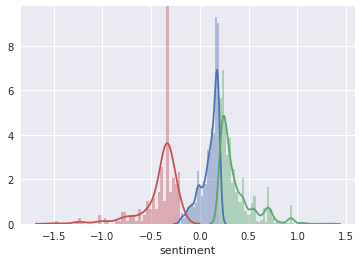

In [18]:
import seaborn as sns, numpy as np
sns.set(); np.random.seed(0)
x = np.random.randn(100)
sns.distplot(df[df['sentiment_class']=='neutral']['sentiment'])
sns.distplot(df[df['sentiment_class']=='positive']['sentiment'])
sns.distplot(df[df['sentiment_class']=='negative']['sentiment'])


In [20]:
df.describe()

,tweet_favorite_count,tweet_id,tweet_retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_id,user_statuses_count,sentiment
count,6409.000000,6.409000e+03,6409.000000,6409.000000,6.409000e+03,6409.000000,6.409000e+03,6.409000e+03,6409.000000
mean,2.630988,9.709791e+17,49.765798,10056.767670,7.619080e+03,1135.338742,2.176016e+17,2.014133e+04,0.267999
std,61.186209,9.975772e+14,504.257028,28194.620472,8.239163e+04,6753.962512,3.768880e+17,4.939549e+04,0.241711
min,0.000000,9.691667e+17,0.000000,0.000000,0.000000e+00,0.000000,1.937530e+05,1.000000e+00,-1.486226
25%,0.000000,9.702720e+17,0.000000,189.000000,6.000000e+01,110.000000,2.484023e+08,9.150000e+02,0.186506
50%,0.000000,9.707004e+17,0.000000,1485.000000,2.410000e+02,300.000000,1.425829e+09,4.749000e+03,0.248012
75%,0.000000,9.718055e+17,13.000000,7173.000000,9.030000e+02,850.000000,7.033180e+17,1.702400e+04,0.356459
max,4336.000000,9.728921e+17,34827.000000,376327.000000,2.134050e+06,401818.000000,9.722281e+17,1.030888e+06,1.342749


In [7]:
df['tweet_time_format'] = df['tweet_time'].apply(lambda x:[i for i in datefinder.find_dates(x)][0])

In [8]:
df['tweet_time_format'].head()

0   2018-03-11 13:48:26+00:00
1   2018-03-11 13:25:21+00:00
2   2018-03-11 13:16:29+00:00
3   2018-03-11 13:11:29+00:00
4   2018-03-11 12:40:17+00:00
Name: tweet_time_format, dtype: datetime64[ns, UTC]

In [11]:
import ast

In [15]:
df['tweet_hashtags'] = df['tweet_hashtags'].apply(lambda x:ast.literal_eval(x))
df['tweet_user_mention_ids'] = df['tweet_user_mention_ids'].apply(lambda x:ast.literal_eval(x))
df['tweet_user_mentions'] = df['tweet_user_mentions'].apply(lambda x:ast.literal_eval(x))
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x:ast.literal_eval(x))

In [16]:
df['tweet_place'] = df['tweet_place'].apply(lambda x:ast.literal_eval(x) if str(x)!='nan' else None)
df['tweet_geo'] = df['tweet_geo'].apply(lambda x:ast.literal_eval(x)  if str(x)!='nan' else None)

In [21]:
df['tweet_hashtags']=df['tweet_hashtags'].apply(lambda x:[i.lower() for i in x ] if x!=[] else x)

Upload to Kibana with Index turkish_airlines_twitter

In [44]:
from elasticsearch import helpers, Elasticsearch
import csv,pandas as pd
import datetime

index_name = "turkish_airlines_twitter"
es = Elasticsearch('http://localhost:9200/')
try :
    es.delete(index_name,'twitter')
except Exception as e:
#     print(e)
    pass
records=df.where(pd.notnull(df), None).T.to_dict()
list_records=[records[it] for it in records]
# try :
helpers.bulk(es, list_records, index=index_name, doc_type='twitter')

BulkIndexError: ('500 document(s) failed to index.', [{'index': {'_index': 'turkish_airlines_twitter', '_id': 'SZeVHWIBXVhnzaJ2k3fu', 'data': {'user_favourites_count': 7868, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'London, England', 'user_friends_count': 419, 'tweet_id': 972831617277464576, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 969446544679333888, 'user_followers_count': 1569, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7406, 'tweet_time': 'Sun Mar 11 13:48:26 +0000 2018', 'user_vintage': 'Fri Mar 02 05:37:22 +0000 2018', 'user_screen_name': 'DailyG13', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Daily G', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'SpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 14268, 'tweet_text': "#Istanbul #Travel #Cruise @TUIGroup #TurkishAirlines #EU #Russia #USA #NYC \nYou've been warned. Stay away from Turk… https://t.co/xSjCbGCgM6", 'tweet_tokens': "['istanbul', 'travel', 'cruise', 'you', 'warned', 'stay', 'away', 'turk']", 'tweet_user_mentions': "['TUIGroup']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1152, 'tweet_id': 972825809013616641, 'sentiment': -0.16168799996376038, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Istanbul', 'Travel', 'Cruise', 'TurkishAirlines', 'EU', 'Russia', 'USA', 'NYC']", 'tweet_geo': None, 'user_id': 3302455838, 'user_followers_count': 5064, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[41062336]', 'user_statuses_count': 25699, 'tweet_time': 'Sun Mar 11 13:25:21 +0000 2018', 'user_vintage': 'Fri Jul 31 13:21:01 +0000 2015', 'user_screen_name': 'Amercans4YPG', 'tweet_cleaned': 'Istanbul Travel Cruise You ve been warned Stay away from Turk', 'tweet_type': 'user_tweet', 'user': 'Americans4YPG', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[41062336]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'S5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 360, 'tweet_text': "RT @Ibrahimova_GNL: #TurkishAirlines prévoit d'acheter au moins 50 appareils à #Boeing et #Airbus https://t.co/ppqfb3lcaB @TurkishAirlines…", 'tweet_tokens': '[]', 'tweet_user_mentions': "['Ibrahimova_GNL', 'TurkishAirlines']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 153, 'tweet_id': 972823577308401664, 'sentiment': 0.20670431852340695, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Boeing', 'Airbus']", 'tweet_geo': None, 'user_id': 960397685747576837, 'user_followers_count': 94, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[4462248196, 18909186]', 'user_statuses_count': 596, 'tweet_time': 'Sun Mar 11 13:16:29 +0000 2018', 'user_vintage': 'Mon Feb 05 06:20:26 +0000 2018', 'user_screen_name': 'pamplemousseeee', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Pample_Mousse', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[4462248196, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 346, 'tweet_text': 'RT @AnAmd05: من أفضل المطاعم في طرابزون👍\nhttps://t.co/azHnSQMITA\n#روعة_الشمال_التركي\n#turkishairlines\n#tkmoments\n@s2005mb https://t.co/b06k…', 'tweet_tokens': "['_', '_', 'turkishairlines', 'tkmoments']", 'tweet_user_mentions': "['AnAmd05', 's2005mb']", 'tweet_lang': 'ar', 'user_location': 'Türkiye, kuwait', 'user_friends_count': 4158, 'tweet_id': 972822317989617664, 'sentiment': 0.07262089848518373, 'tweet_favorite_count': 0, 'tweet_hashtags': "['روعة_الشمال_التركي', 'turkishairlines', 'tkmoments']", 'tweet_geo': None, 'user_id': 594013443, 'user_followers_count': 23865, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[492292710, 433574142]', 'user_statuses_count': 36719, 'tweet_time': 'Sun Mar 11 13:11:29 +0000 2018', 'user_vintage': 'Tue May 29 18:30:01 +0000 2012', 'user_screen_name': 'mishari_beck', 'tweet_cleaned': '_ _ turkishairlines tkmoments', 'tweet_type': 'retweet', 'user': 'مشاري بيك☪︎ 🇰🇼🇹🇷', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[492292710, 433574142]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: ✈\nIn our flight training center, which is the largest in Europe, we train more than 10,000 flight attendants and 4,000…', 'tweet_tokens': "['in', 'flight', 'training', 'center', 'largest', 'europe', 'train', 'flight', 'attendants']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814464453136384, 'sentiment': 0.5345414876937866, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 85, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:40:17 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'In our flight training center which is the largest in Europe we train more than flight attendants and', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814447717822465, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:40:13 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'T5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': "RT @TurkishAirlines: ✈️\nCheck out Turkish Airlines' set of in-flight entertainment offers, including #Oscars Best Picture #TheShapeofWater!…", 'tweet_tokens': "['check', 'turkish', 'airlines', 'set', 'flight', 'entertainment', 'offers', 'including', 'oscars', 'best', 'picture', 'theshapeofwater']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814436170903553, 'sentiment': 0.510441780090332, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Oscars', 'TheShapeofWater']", 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 25, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:40:10 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'Check out Turkish Airlines set of in flight entertainment offers including Oscars Best Picture TheShapeofWater', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: ✈️\neDreams ranked Turkish Airlines the "best full service airline in the world for 2018" based on Turkish Airlines\' ex…', 'tweet_tokens': "['edreams', 'ranked', 'turkish', 'airlines', 'full', 'service', 'airline', 'world', 'based', 'turkish', 'airlines', 'ex']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814415656570880, 'sentiment': 0.43600934743881226, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 71, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:40:05 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'eDreams ranked Turkish Airlines the best full service airline in the world for based on Turkish Airlines ex', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814378344042496, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:39:56 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814365559873536, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:39:53 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'U5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814354151297024, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:39:50 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 22014, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Sverige', 'user_friends_count': 793, 'tweet_id': 972814261675266048, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 577170536, 'user_followers_count': 968, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 10944, 'tweet_time': 'Sun Mar 11 12:39:28 +0000 2018', 'user_vintage': 'Fri May 11 14:17:09 +0000 2012', 'user_screen_name': 'mdg_85', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Mustafa Deniz Gül', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 10, 'tweet_id': 972814235637026816, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 938361961758240768, 'user_followers_count': 0, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3955, 'tweet_time': 'Sun Mar 11 12:39:22 +0000 2018', 'user_vintage': 'Wed Dec 06 10:58:20 +0000 2017', 'user_screen_name': 'Therealnin2', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Therealnin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7758, 'tweet_text': 'RT @ronip: Landing in Dublin! Or is it Antarctica? 😯 @DublinAirport @TurkishAirlines\n#BeastFromTheEast\n#DublinAirport #Dublin #turkishairli…', 'tweet_tokens': "['beastfromtheeast', 'dublinairport', 'dublin', 'turkishairli']", 'tweet_user_mentions': "['ronip', 'DublinAirport', 'TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 849, 'tweet_id': 972812596582731776, 'sentiment': 0.2935984134674072, 'tweet_favorite_count': 0, 'tweet_hashtags': "['BeastFromTheEast', 'DublinAirport', 'Dublin']", 'tweet_geo': None, 'user_id': 782265632985415680, 'user_followers_count': 43, 'tweet_retweet_count': 107, 'tweet_place': None, 'tweet_user_mention_ids': '[17940851, 179569408, 18909186]', 'user_statuses_count': 9394, 'tweet_time': 'Sun Mar 11 12:32:51 +0000 2018', 'user_vintage': 'Sat Oct 01 17:07:15 +0000 2016', 'user_screen_name': 'waldemar_walth', 'tweet_cleaned': 'BeastFromTheEast DublinAirport Dublin turkishairli', 'tweet_type': 'retweet', 'user': 'Waldemar Walth', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[17940851, 179569408, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'V5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7758, 'tweet_text': 'RT @TK_DEU: Wir nehmen Ihre Sinne mit auf eine einzigartige #Reise. Lassen Sie sich von den #Köstlichkeiten unserer #FlyingChefs verzaubern…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_DEU']", 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 849, 'tweet_id': 972812344387690496, 'sentiment': 0.27516186237335205, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Reise', 'Köstlichkeiten', 'FlyingChefs']", 'tweet_geo': None, 'user_id': 782265632985415680, 'user_followers_count': 43, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[1070242453]', 'user_statuses_count': 9394, 'tweet_time': 'Sun Mar 11 12:31:51 +0000 2018', 'user_vintage': 'Sat Oct 01 17:07:15 +0000 2016', 'user_screen_name': 'waldemar_walth', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Waldemar Walth', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1070242453]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7758, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 849, 'tweet_id': 972811934759309312, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 782265632985415680, 'user_followers_count': 43, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9394, 'tweet_time': 'Sun Mar 11 12:30:13 +0000 2018', 'user_vintage': 'Sat Oct 01 17:07:15 +0000 2016', 'user_screen_name': 'waldemar_walth', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Waldemar Walth', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7758, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 849, 'tweet_id': 972811861791002624, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 782265632985415680, 'user_followers_count': 43, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9394, 'tweet_time': 'Sun Mar 11 12:29:56 +0000 2018', 'user_vintage': 'Sat Oct 01 17:07:15 +0000 2016', 'user_screen_name': 'waldemar_walth', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Waldemar Walth', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2164, 'tweet_text': 'EFSANE : BOEING 737 . #Boeing #737 TURKISH AIRLINES is the BEST . #TurkishAirlines… https://t.co/R65OmfAw4E', 'tweet_tokens': "['efsane', 'boeing', 'boeing', 'turkish', 'airlines', 'best', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Ankara', 'user_friends_count': 1580, 'tweet_id': 972811804471574528, 'sentiment': 0.5515731573104858, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Boeing', 'TurkishAirlines']", 'tweet_geo': "{'coordinates': [48.11968993, 16.56071], 'type': 'Point'}", 'user_id': 62319122, 'user_followers_count': 277, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/d62d58de815998db.json', 'country': 'Austria', 'bounding_box': {'coordinates': [[[16.4327106, 48.088982], [16.576842, 48.088982], [16.576842, 48.159012], [16.4327106, 48.159012]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'AT', 'full_name': 'Schwechat, Österreich', 'name': 'Schwechat', 'attributes': {}, 'id': 'd62d58de815998db'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 7872, 'tweet_time': 'Sun Mar 11 12:29:42 +0000 2018', 'user_vintage': 'Sun Aug 02 18:33:29 +0000 2009', 'user_screen_name': 'sleepcalm80', 'tweet_cleaned': 'EFSANE BOEING Boeing TURKISH AIRLINES is the BEST TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'sleep calm 80', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'W5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 399, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 977, 'tweet_id': 972807082213826561, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 414267663, 'user_followers_count': 96, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3485, 'tweet_time': 'Sun Mar 11 12:10:56 +0000 2018', 'user_vintage': 'Wed Nov 16 21:02:49 +0000 2011', 'user_screen_name': 'johnoleary8', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'john o leary', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1606, 'tweet_text': "RT @DunyayiGeziyor: Dünyayı Geziyorum şimdi saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi bekli…", 'tweet_tokens': '[]', 'tweet_user_mentions': "['DunyayiGeziyor']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Turkiye', 'user_friends_count': 35, 'tweet_id': 972806652700299264, 'sentiment': 0.4135827422142029, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 523244339, 'user_followers_count': 3700, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[1141816867]', 'user_statuses_count': 10306, 'tweet_time': 'Sun Mar 11 12:09:14 +0000 2018', 'user_vintage': 'Tue Mar 13 13:16:00 +0000 2012', 'user_screen_name': 'EsirgencYasin', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Yasin Esirgenç', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1141816867]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1603, 'tweet_text': "RT @DunyayiGeziyor: Dünyayı Geziyorum şimdi saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi bekli…", 'tweet_tokens': '[]', 'tweet_user_mentions': "['DunyayiGeziyor']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 17, 'tweet_id': 972806580679921665, 'sentiment': 0.4135827422142029, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1141816867, 'user_followers_count': 14126, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[1141816867]', 'user_statuses_count': 7328, 'tweet_time': 'Sun Mar 11 12:08:57 +0000 2018', 'user_vintage': 'Sat Feb 02 07:52:34 +0000 2013', 'user_screen_name': 'DunyayiGeziyor', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Dünyayı Geziyorum', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1141816867]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1603, 'tweet_text': "Dünyayı Geziyorum şimdi saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi b… https://t.co/02rNmZeE63", 'tweet_tokens': "['d', 'nyay', 'geziyorum', 'imdi', 'saat', 'kanal', 'mauritius', 'adas', 'nda', 'mauritius', 'b', 'kemmel', 'g', 'r', 'nt', 'lerle', 'sizi', 'b']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 17, 'tweet_id': 972806101824688130, 'sentiment': 0.33850792050361633, 'tweet_favorite_count': 7, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1141816867, 'user_followers_count': 14126, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 7328, 'tweet_time': 'Sun Mar 11 12:07:03 +0000 2018', 'user_vintage': 'Sat Feb 02 07:52:34 +0000 2013', 'user_screen_name': 'DunyayiGeziyor', 'tweet_cleaned': 'D nyay Geziyorum imdi saat da Kanal de Mauritius Adas nda Mauritius b l m m kemmel g r nt lerle sizi b', 'tweet_type': 'user_tweet', 'user': 'Dünyayı Geziyorum', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'X5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1603, 'tweet_text': "RT @EsirgencYasin: Dünyayı Geziyorum azsonra saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi bekl…", 'tweet_tokens': '[]', 'tweet_user_mentions': "['EsirgencYasin']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 17, 'tweet_id': 972805940780195841, 'sentiment': 0.4252653419971466, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1141816867, 'user_followers_count': 14126, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[523244339]', 'user_statuses_count': 7328, 'tweet_time': 'Sun Mar 11 12:06:24 +0000 2018', 'user_vintage': 'Sat Feb 02 07:52:34 +0000 2013', 'user_screen_name': 'DunyayiGeziyor', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Dünyayı Geziyorum', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[523244339]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1606, 'tweet_text': "RT @EsirgencYasin: Dünyayı Geziyorum azsonra saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi bekl…", 'tweet_tokens': '[]', 'tweet_user_mentions': "['EsirgencYasin']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Turkiye', 'user_friends_count': 35, 'tweet_id': 972805659191373824, 'sentiment': 0.4252653419971466, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 523244339, 'user_followers_count': 3700, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[523244339]', 'user_statuses_count': 10306, 'tweet_time': 'Sun Mar 11 12:05:17 +0000 2018', 'user_vintage': 'Tue Mar 13 13:16:00 +0000 2012', 'user_screen_name': 'EsirgencYasin', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Yasin Esirgenç', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[523244339]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1606, 'tweet_text': "Dünyayı Geziyorum azsonra saat 15.10'da Kanal7'de Mauritius Adasında. Mauritius 2 bölümü mükemmel görüntülerle sizi… https://t.co/6Rxem2RjDs", 'tweet_tokens': "['d', 'nyay', 'geziyorum', 'azsonra', 'saat', 'kanal', 'mauritius', 'adas', 'nda', 'mauritius', 'b', 'kemmel', 'g', 'r', 'nt', 'lerle', 'sizi']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'İstanbul, Turkiye', 'user_friends_count': 35, 'tweet_id': 972805614073274368, 'sentiment': 0.3833441138267517, 'tweet_favorite_count': 7, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 523244339, 'user_followers_count': 3700, 'tweet_retweet_count': 4, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/ee9d992aa12a6fa0.json', 'country': 'Republic of Mauritius', 'bounding_box': {'coordinates': [[[57.3083535, -20.5254982], [57.8229151, -20.5254982], [57.8229151, -19.9355533], [57.3083535, -19.9355533]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'country', 'country_code': 'MU', 'full_name': 'Republic of Mauritius', 'name': 'Republic of Mauritius', 'attributes': {}, 'id': 'ee9d992aa12a6fa0'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 10306, 'tweet_time': 'Sun Mar 11 12:05:06 +0000 2018', 'user_vintage': 'Tue Mar 13 13:16:00 +0000 2012', 'user_screen_name': 'EsirgencYasin', 'tweet_cleaned': 'D nyay Geziyorum azsonra saat da Kanal de Mauritius Adas nda Mauritius b l m m kemmel g r nt lerle sizi', 'tweet_type': 'user_tweet', 'user': 'Yasin Esirgenç', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 11646, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 299, 'tweet_id': 972787999929847809, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 912485743586504704, 'user_followers_count': 274, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 11429, 'tweet_time': 'Sun Mar 11 10:55:07 +0000 2018', 'user_vintage': 'Tue Sep 26 01:15:29 +0000 2017', 'user_screen_name': 'VickyJi80917886', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Vicky Ji', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'Y5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 30354, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 825, 'tweet_id': 972782996724985857, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 457444213, 'user_followers_count': 115, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 85765, 'tweet_time': 'Sun Mar 11 10:35:14 +0000 2018', 'user_vintage': 'Sat Jan 07 12:18:51 +0000 2012', 'user_screen_name': '7647Run', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'トコトコ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 76252, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 1350, 'tweet_id': 972781892465410048, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 344761866, 'user_followers_count': 1105, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 200547, 'tweet_time': 'Sun Mar 11 10:30:51 +0000 2018', 'user_vintage': 'Fri Jul 29 15:05:44 +0000 2011', 'user_screen_name': 'himeroad', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'あつこ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 302, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Bulgaria', 'user_friends_count': 300, 'tweet_id': 972776209397485568, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3288076966, 'user_followers_count': 231, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 229, 'tweet_time': 'Sun Mar 11 10:08:16 +0000 2018', 'user_vintage': 'Mon May 18 07:06:44 +0000 2015', 'user_screen_name': 'navigato_io', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Navigato', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 232, 'tweet_text': 'Influence of #tahirshah on #turkishairlines... Wao, inflight entertainment hahahha  #eye2eye \U0001f923\U0001f923\U0001f923😂😂😵👏🏼👏🏼 https://t.co/3Oq78DtjE7', 'tweet_tokens': "['influence', 'tahirshah', 'turkishairlines', 'wao', 'inflight', 'entertainment', 'hahahha', 'eye', 'eye']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Trondheim, Norway', 'user_friends_count': 69, 'tweet_id': 972774267464179712, 'sentiment': 0.4977729022502899, 'tweet_favorite_count': 0, 'tweet_hashtags': "['tahirshah', 'turkishairlines', 'eye2eye']", 'tweet_geo': None, 'user_id': 2160744509, 'user_followers_count': 56, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 895, 'tweet_time': 'Sun Mar 11 10:00:33 +0000 2018', 'user_vintage': 'Wed Oct 30 19:18:24 +0000 2013', 'user_screen_name': 'Hammad_Majeed1', 'tweet_cleaned': 'Influence of tahirshah on turkishairlines Wao inflight entertainment hahahha eye eye', 'tweet_type': 'user_tweet', 'user': 'Hammad Majeed', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'Z5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4526, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 2423, 'tweet_id': 972773074574696448, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 2387062759, 'user_followers_count': 732, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 23494, 'tweet_time': 'Sun Mar 11 09:55:48 +0000 2018', 'user_vintage': 'Thu Mar 13 14:05:31 +0000 2014', 'user_screen_name': 'battacio', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': '🎯battacio🎯', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'aJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 11534, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1009, 'tweet_id': 972771043675983873, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 2706137984, 'user_followers_count': 865, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9250, 'tweet_time': 'Sun Mar 11 09:47:44 +0000 2018', 'user_vintage': 'Mon Aug 04 09:28:43 +0000 2014', 'user_screen_name': 'lookatwhat', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'look at this', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'aZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 8418, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Kuchaman City', 'user_friends_count': 20, 'tweet_id': 972766497939505153, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 960427165618651136, 'user_followers_count': 172, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 8567, 'tweet_time': 'Sun Mar 11 09:29:40 +0000 2018', 'user_vintage': 'Mon Feb 05 08:17:34 +0000 2018', 'user_screen_name': 'Ramniva61549036', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Ramnivas', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'apeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 85090, 'tweet_text': 'How to waste the time... Learn from #TurkishAirlines... go round &amp; round &amp; round... #Timepass https://t.co/v6rpphsh9m', 'tweet_tokens': "['how', 'waste', 'time', 'learn', 'turkishairlines', 'go', 'round', 'round', 'round', 'timepass']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New Delhi, NYC, Dubai', 'user_friends_count': 7735, 'tweet_id': 972765719183220737, 'sentiment': -0.14616252481937408, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Timepass']", 'tweet_geo': None, 'user_id': 28149588, 'user_followers_count': 7673, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 22014, 'tweet_time': 'Sun Mar 11 09:26:35 +0000 2018', 'user_vintage': 'Wed Apr 01 17:29:51 +0000 2009', 'user_screen_name': 'nksingal', 'tweet_cleaned': 'How to waste the time Learn from TurkishAirlines go round amp round amp round Timepass', 'tweet_type': 'user_tweet', 'user': 'Neeraj Kumar Singal', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'a5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 775, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'New York, USA', 'user_friends_count': 340, 'tweet_id': 972765182786179073, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 862758395933282305, 'user_followers_count': 125, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 817, 'tweet_time': 'Sun Mar 11 09:24:27 +0000 2018', 'user_vintage': 'Thu May 11 19:56:45 +0000 2017', 'user_screen_name': 'hoprealisw1', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'AUGUSTUS  HOBLAK .Dr', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 47769, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 142, 'tweet_id': 972764266184036352, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 550392008, 'user_followers_count': 263, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 15628, 'tweet_time': 'Sun Mar 11 09:20:48 +0000 2018', 'user_vintage': 'Tue Apr 10 19:48:30 +0000 2012', 'user_screen_name': 'lukasrydhage', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Lukas Rydhage', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 342, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'पिपर शहर, भारत', 'user_friends_count': 82, 'tweet_id': 972763990815207424, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 970352420617244672, 'user_followers_count': 16, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 348, 'tweet_time': 'Sun Mar 11 09:19:43 +0000 2018', 'user_vintage': 'Sun Mar 04 17:37:00 +0000 2018', 'user_screen_name': 'ChanaramP', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Chanaram Panwar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 134, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 41, 'tweet_id': 972762705957355521, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 3314949711, 'user_followers_count': 71, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 215, 'tweet_time': 'Sun Mar 11 09:14:36 +0000 2018', 'user_vintage': 'Tue Jun 09 13:34:28 +0000 2015', 'user_screen_name': 'mkv19760625', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Lenin the Russian Hitler', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'b5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9750, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Singapore* - London - Istanbul', 'user_friends_count': 1999, 'tweet_id': 972754065993035782, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 173469847, 'user_followers_count': 1216, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 10236, 'tweet_time': 'Sun Mar 11 08:40:16 +0000 2018', 'user_vintage': 'Sun Aug 01 15:18:09 +0000 2010', 'user_screen_name': 'omer_wilson', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Omer Wilson (奥马尔)', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 177, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 87, 'tweet_id': 972753857343315974, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 153724992, 'user_followers_count': 47, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 904, 'tweet_time': 'Sun Mar 11 08:39:27 +0000 2018', 'user_vintage': 'Wed Jun 09 08:37:42 +0000 2010', 'user_screen_name': 'saulat_kalim', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Saul', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9311, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Sat Saheb ji', 'user_friends_count': 47, 'tweet_id': 972753832559239168, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 932581395649761281, 'user_followers_count': 161, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9288, 'tweet_time': 'Sun Mar 11 08:39:21 +0000 2018', 'user_vintage': 'Mon Nov 20 12:08:26 +0000 2017', 'user_screen_name': 'Rahul73424136', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Rahul', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 14, 'tweet_id': 972753549645008896, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 968969958389673985, 'user_followers_count': 1, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 63, 'tweet_time': 'Sun Mar 11 08:38:13 +0000 2018', 'user_vintage': 'Wed Feb 28 22:03:35 +0000 2018', 'user_screen_name': 'hHsikKZbehj1bj8', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': '😮', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'c5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2105, 'tweet_text': "#TurkishAirlines prévoit d'acheter au moins 50 appareils à #Boeing et #Airbus https://t.co/ppqfb3lcaB… https://t.co/p4BQjXilE3", 'tweet_tokens': "['turkishairlines', 'pr', 'voit', 'acheter', 'moins', 'appareils', 'boeing', 'airbus']", 'tweet_user_mentions': '[]', 'tweet_lang': 'fr', 'user_location': 'baku, Az', 'user_friends_count': 542, 'tweet_id': 972751649101041664, 'sentiment': 0.13590891659259796, 'tweet_favorite_count': 1, 'tweet_hashtags': "['TurkishAirlines', 'Boeing', 'Airbus']", 'tweet_geo': None, 'user_id': 4462248196, 'user_followers_count': 1089, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 22414, 'tweet_time': 'Sun Mar 11 08:30:40 +0000 2018', 'user_vintage': 'Sat Dec 12 18:54:52 +0000 2015', 'user_screen_name': 'Ibrahimova_GNL', 'tweet_cleaned': 'TurkishAirlines pr voit d acheter au moins appareils Boeing et Airbus', 'tweet_type': 'user_tweet', 'user': 'Gunel Ibrahimova', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 248, 'tweet_text': '#TurkishAirlines  supper partner https://t.co/T3sm90h3Si', 'tweet_tokens': "['turkishairlines', 'supper', 'partner']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Somalia', 'user_friends_count': 219, 'tweet_id': 972749012918067202, 'sentiment': 0.08062820881605147, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3340732690, 'user_followers_count': 54, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/2e09439cac5c7992.json', 'country': 'Somalia', 'bounding_box': {'coordinates': [[[40.9886682, -1.6603619], [51.4154958, -1.6603619], [51.4154958, 11.9880685], [40.9886682, 11.9880685]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'country', 'country_code': 'SO', 'full_name': 'Somalia', 'name': 'Somalia', 'attributes': {}, 'id': '2e09439cac5c7992'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 78, 'tweet_time': 'Sun Mar 11 08:20:12 +0000 2018', 'user_vintage': 'Mon Jun 22 06:32:35 +0000 2015', 'user_screen_name': 'catooshka8', 'tweet_cleaned': 'TurkishAirlines supper partner', 'tweet_type': 'user_tweet', 'user': 'Abdikarin Dahir Abdirahman', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 184, 'tweet_text': '@TurkishAirlines müdavimi bir adamı kendisinden soğutmak için uğraşan bir müşteri ilişkileri. Saçma sapan hatalar y… https://t.co/KHWuVThciq', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'tr', 'user_location': 'London', 'user_friends_count': 710, 'tweet_id': 972747218724839424, 'sentiment': 0.3267499804496765, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 111905427, 'user_followers_count': 1014, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 907, 'tweet_time': 'Sun Mar 11 08:13:04 +0000 2018', 'user_vintage': 'Sat Feb 06 15:03:18 +0000 2010', 'user_screen_name': 'ahmetferruh', 'tweet_cleaned': None, 'tweet_type': 'user_tweet', 'user': 'Ahmet Ferruh Öncü', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1, 'tweet_text': '✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/6HLgYNeJLs', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York, NY', 'user_friends_count': 3561, 'tweet_id': 972744803367706624, 'sentiment': 0.4482782781124115, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 808256469229572096, 'user_followers_count': 2706, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 106132, 'tweet_time': 'Sun Mar 11 08:03:28 +0000 2018', 'user_vintage': 'Mon Dec 12 10:25:33 +0000 2016', 'user_screen_name': 'g_ashleyhawkins', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'G. Ashley Hawkins', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'd5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7658, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Jaisalmer,Rajasthan India', 'user_friends_count': 60, 'tweet_id': 972741208442208256, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 944155481479585795, 'user_followers_count': 209, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5251, 'tweet_time': 'Sun Mar 11 07:49:11 +0000 2018', 'user_vintage': 'Fri Dec 22 10:39:43 +0000 2017', 'user_screen_name': 'ChelakGulab', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'GULAB', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'eJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 10822, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Halcyon Fold', 'user_friends_count': 477, 'tweet_id': 972740652445327360, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 907883146531581953, 'user_followers_count': 503, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1579, 'tweet_time': 'Sun Mar 11 07:46:58 +0000 2018', 'user_vintage': 'Wed Sep 13 08:26:24 +0000 2017', 'user_screen_name': 'Sgt_DavisXJ', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'DavisXJ', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'eZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 18103, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Θεσσαλονίκη, Ελλάς', 'user_friends_count': 4986, 'tweet_id': 972739845503234048, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 783032206688133120, 'user_followers_count': 1145, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1537, 'tweet_time': 'Sun Mar 11 07:43:46 +0000 2018', 'user_vintage': 'Mon Oct 03 19:53:20 +0000 2016', 'user_screen_name': 'george_itl', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'George Orfanidis', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'epeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 860, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Nairobi, Kenya', 'user_friends_count': 269, 'tweet_id': 972732016771960832, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 831871640183173123, 'user_followers_count': 328, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 665, 'tweet_time': 'Sun Mar 11 07:12:39 +0000 2018', 'user_vintage': 'Wed Feb 15 14:23:49 +0000 2017', 'user_screen_name': 'MidasVentures', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Midas Marketing Agency⏺', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'e5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1318, 'tweet_text': 'RT @AnAmd05: من أفضل المطاعم في طرابزون👍\nhttps://t.co/azHnSQMITA\n#روعة_الشمال_التركي\n#turkishairlines\n#tkmoments\n@s2005mb https://t.co/b06k…', 'tweet_tokens': "['_', '_', 'turkishairlines', 'tkmoments']", 'tweet_user_mentions': "['AnAmd05', 's2005mb']", 'tweet_lang': 'ar', 'user_location': 'jeddah', 'user_friends_count': 217, 'tweet_id': 972729824958656512, 'sentiment': 0.07262089848518373, 'tweet_favorite_count': 0, 'tweet_hashtags': "['روعة_الشمال_التركي', 'turkishairlines', 'tkmoments']", 'tweet_geo': None, 'user_id': 492292710, 'user_followers_count': 14672, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[492292710, 433574142]', 'user_statuses_count': 9056, 'tweet_time': 'Sun Mar 11 07:03:57 +0000 2018', 'user_vintage': 'Tue Feb 14 15:15:55 +0000 2012', 'user_screen_name': 'AnAmd05', 'tweet_cleaned': '_ _ turkishairlines tkmoments', 'tweet_type': 'retweet', 'user': 'ابراهيم بالريش', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[492292710, 433574142]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 24619, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Chennai paiyan', 'user_friends_count': 24, 'tweet_id': 972715741949583362, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 3194069106, 'user_followers_count': 145, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 13274, 'tweet_time': 'Sun Mar 11 06:07:59 +0000 2018', 'user_vintage': 'Wed May 13 08:59:00 +0000 2015', 'user_screen_name': 'dirc_ParatheGun', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Parandagan🎬', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1203, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Kuchaman City, India', 'user_friends_count': 139, 'tweet_id': 972714718149345280, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 968094473099137025, 'user_followers_count': 39, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1315, 'tweet_time': 'Sun Mar 11 06:03:55 +0000 2018', 'user_vintage': 'Mon Feb 26 12:04:43 +0000 2018', 'user_screen_name': 'MukeshB77829936', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Mukesh Bhagat', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2302, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Aapke*❤Dil❤*me....... 😜', 'user_friends_count': 66, 'tweet_id': 972706304027512832, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 861464507708616704, 'user_followers_count': 348, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7974, 'tweet_time': 'Sun Mar 11 05:30:29 +0000 2018', 'user_vintage': 'Mon May 08 06:15:18 +0000 2017', 'user_screen_name': 'neetu_princess', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': '👸🔱¢ûť€ Pα®¥🔱🇳', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'f5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 16, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Jaipur', 'user_friends_count': 4842, 'tweet_id': 972704262902788097, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 849212163436707840, 'user_followers_count': 2419, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3664, 'tweet_time': 'Sun Mar 11 05:22:22 +0000 2018', 'user_vintage': 'Tue Apr 04 10:48:52 +0000 2017', 'user_screen_name': 'ChuchraNeeraj', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Neeraj Arora', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 577, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'New Delhi, India', 'user_friends_count': 275, 'tweet_id': 972702685903257600, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1011317574, 'user_followers_count': 98, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 406, 'tweet_time': 'Sun Mar 11 05:16:06 +0000 2018', 'user_vintage': 'Fri Dec 14 15:09:47 +0000 2012', 'user_screen_name': 'Aman86518Aman', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Aman Rajput', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9885, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 3459, 'tweet_id': 972697617418412032, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 828253120560058368, 'user_followers_count': 240, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3782, 'tweet_time': 'Sun Mar 11 04:55:58 +0000 2018', 'user_vintage': 'Sun Feb 05 14:45:06 +0000 2017', 'user_screen_name': 'Gulianebbiolo', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Gulia', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 22582, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Tampa, FL', 'user_friends_count': 4167, 'tweet_id': 972686817966292992, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 818237382499663877, 'user_followers_count': 2569, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 20014, 'tweet_time': 'Sun Mar 11 04:13:03 +0000 2018', 'user_vintage': 'Sun Jan 08 23:26:08 +0000 2017', 'user_screen_name': 'SandraMolineux', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Sandra Molineux', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'g5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 36564, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4994, 'tweet_id': 972681568459268096, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 938798872696107008, 'user_followers_count': 465, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 41222, 'tweet_time': 'Sun Mar 11 03:52:12 +0000 2018', 'user_vintage': 'Thu Dec 07 15:54:28 +0000 2017', 'user_screen_name': 'samaraweera1971', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'samaraweerawasantha', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 36564, 'tweet_text': 'RT @TurkishAirlines: ✈️\neDreams ranked Turkish Airlines the "best full service airline in the world for 2018" based on Turkish Airlines\' ex…', 'tweet_tokens': "['edreams', 'ranked', 'turkish', 'airlines', 'full', 'service', 'airline', 'world', 'based', 'turkish', 'airlines', 'ex']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4994, 'tweet_id': 972681482513731585, 'sentiment': 0.43600934743881226, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 938798872696107008, 'user_followers_count': 465, 'tweet_retweet_count': 71, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 41222, 'tweet_time': 'Sun Mar 11 03:51:51 +0000 2018', 'user_vintage': 'Thu Dec 07 15:54:28 +0000 2017', 'user_screen_name': 'samaraweera1971', 'tweet_cleaned': 'eDreams ranked Turkish Airlines the best full service airline in the world for based on Turkish Airlines ex', 'tweet_type': 'retweet', 'user': 'samaraweerawasantha', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 36564, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4994, 'tweet_id': 972681412800274437, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 938798872696107008, 'user_followers_count': 465, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 41222, 'tweet_time': 'Sun Mar 11 03:51:35 +0000 2018', 'user_vintage': 'Thu Dec 07 15:54:28 +0000 2017', 'user_screen_name': 'samaraweera1971', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'samaraweerawasantha', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 18909, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 2521, 'tweet_id': 972680509259104256, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 129236399, 'user_followers_count': 620, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 25505, 'tweet_time': 'Sun Mar 11 03:47:59 +0000 2018', 'user_vintage': 'Sat Apr 03 16:29:06 +0000 2010', 'user_screen_name': 'akki0907', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Akika', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'h5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 17011, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Newport Beach, Ca.', 'user_friends_count': 303, 'tweet_id': 972675017799475200, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 164460269, 'user_followers_count': 201, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5946, 'tweet_time': 'Sun Mar 11 03:26:10 +0000 2018', 'user_vintage': 'Thu Jul 08 23:08:32 +0000 2010', 'user_screen_name': 'pablitomon', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'pablo montagna', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'iJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 5490, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 3157, 'tweet_id': 972674216381235200, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 3071577726, 'user_followers_count': 2336, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 27656, 'tweet_time': 'Sun Mar 11 03:22:59 +0000 2018', 'user_vintage': 'Tue Mar 10 15:28:15 +0000 2015', 'user_screen_name': 'emiemi_1224', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'emi1224', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'iZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 42213, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '水辺', 'user_friends_count': 769, 'tweet_id': 972672294064566273, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 83046848, 'user_followers_count': 740, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 96768, 'tweet_time': 'Sun Mar 11 03:15:20 +0000 2018', 'user_vintage': 'Sat Oct 17 03:36:06 +0000 2009', 'user_screen_name': 'alorika6', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ぱんだ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ipeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 32, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'United States', 'user_friends_count': 71, 'tweet_id': 972667308475760642, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 944112987119411200, 'user_followers_count': 10, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 129, 'tweet_time': 'Sun Mar 11 02:55:32 +0000 2018', 'user_vintage': 'Fri Dec 22 07:50:51 +0000 2017', 'user_screen_name': 'DNa756', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'JA757A', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'i5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 156, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 38, 'tweet_id': 972647077166465024, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2959569050, 'user_followers_count': 2, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 165, 'tweet_time': 'Sun Mar 11 01:35:08 +0000 2018', 'user_vintage': 'Mon Jan 05 11:23:40 +0000 2015', 'user_screen_name': '2imvlbWp9peWOWT', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'スゥイング娘', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1744, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '千葉県', 'user_friends_count': 198, 'tweet_id': 972642810477211648, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 948729840814899200, 'user_followers_count': 29, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 1516, 'tweet_time': 'Sun Mar 11 01:18:11 +0000 2018', 'user_vintage': 'Thu Jan 04 01:36:35 +0000 2018', 'user_screen_name': 'EyesTakeshi', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '健(たけし)@６９', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7227, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'TOKYO', 'user_friends_count': 439, 'tweet_id': 972638797761363968, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 56620449, 'user_followers_count': 1757, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 124669, 'tweet_time': 'Sun Mar 11 01:02:14 +0000 2018', 'user_vintage': 'Tue Jul 14 05:48:12 +0000 2009', 'user_screen_name': 'matsumocchi', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'マツモトユミ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1864, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 79, 'tweet_id': 972636161167405056, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 743083903053750274, 'user_followers_count': 3, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 1512, 'tweet_time': 'Sun Mar 11 00:51:46 +0000 2018', 'user_vintage': 'Wed Jun 15 14:13:03 +0000 2016', 'user_screen_name': 'fann_tta_aa16', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'なあなあ77✨', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'j5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6377, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '福岡市', 'user_friends_count': 140, 'tweet_id': 972636004023656448, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 148755565, 'user_followers_count': 39, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 11049, 'tweet_time': 'Sun Mar 11 00:51:08 +0000 2018', 'user_vintage': 'Thu May 27 14:30:27 +0000 2010', 'user_screen_name': 'kurimerry', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kazuko', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7222, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '\n横浜\n', 'user_friends_count': 454, 'tweet_id': 972622967065595904, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 165182903, 'user_followers_count': 363, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 7933, 'tweet_time': 'Sat Mar 10 23:59:20 +0000 2018', 'user_vintage': 'Sat Jul 10 21:12:45 +0000 2010', 'user_screen_name': 'Lizretto', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '最近は疲れ気味', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1818, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 104, 'tweet_id': 972614846398083072, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 953616155238780929, 'user_followers_count': 81, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 2024, 'tweet_time': 'Sat Mar 10 23:27:04 +0000 2018', 'user_vintage': 'Wed Jan 17 13:13:03 +0000 2018', 'user_screen_name': 'ynfyzp11', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': '一推到底', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7327, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Türkiye', 'user_friends_count': 4884, 'tweet_id': 972610539569537025, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3256070356, 'user_followers_count': 4434, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 6490, 'tweet_time': 'Sat Mar 10 23:09:57 +0000 2018', 'user_vintage': 'Fri May 15 10:14:50 +0000 2015', 'user_screen_name': 'Reisciyiz53', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'İMAMOĞLU53', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'k5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1197, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'USA.....but someday......', 'user_friends_count': 1356, 'tweet_id': 972600951960932353, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 950258432589824001, 'user_followers_count': 1021, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 1623, 'tweet_time': 'Sat Mar 10 22:31:51 +0000 2018', 'user_vintage': 'Mon Jan 08 06:50:40 +0000 2018', 'user_screen_name': 'SaudiArabiaLuv', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Luv Saudi Arabia❤️🇸🇦❤️🇺🇸❤️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4856, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 103, 'tweet_id': 972592984553349120, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 3522612435, 'user_followers_count': 37, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 3463, 'tweet_time': 'Sat Mar 10 22:00:12 +0000 2018', 'user_vintage': 'Wed Sep 02 11:17:17 +0000 2015', 'user_screen_name': 'mertmalkoc2', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'mert malkoc', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 855, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 247, 'tweet_id': 972587178353135616, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2972133483, 'user_followers_count': 267, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 517, 'tweet_time': 'Sat Mar 10 21:37:07 +0000 2018', 'user_vintage': 'Sat Jan 10 22:32:01 +0000 2015', 'user_screen_name': 'MrTransportaion', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Mr.HotelTransportation', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7277, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'Dubai', 'user_friends_count': 4995, 'tweet_id': 972585830018699264, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 967789195, 'user_followers_count': 1407, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 49104, 'tweet_time': 'Sat Mar 10 21:31:46 +0000 2018', 'user_vintage': 'Sat Nov 24 10:37:27 +0000 2012', 'user_screen_name': 'AnamjemWAK', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'AnamjemWAK', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'l5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 550, 'tweet_text': '#turkishairlines\nIstanbul from sky https://t.co/a1gzNjwNJL', 'tweet_tokens': "['turkishairlines', 'istanbul', 'sky']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Gabon', 'user_friends_count': 92, 'tweet_id': 972577804310208514, 'sentiment': 0.2646237313747406, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2472695593, 'user_followers_count': 25, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2148, 'tweet_time': 'Sat Mar 10 20:59:52 +0000 2018', 'user_vintage': 'Thu May 01 15:42:09 +0000 2014', 'user_screen_name': 'barh00m_87', 'tweet_cleaned': 'turkishairlines Istanbul from sky', 'tweet_type': 'user_tweet', 'user': 'Ibrahim Baydoun', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 16712, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4996, 'tweet_id': 972576550771220483, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 3025277766, 'user_followers_count': 1198, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 31842, 'tweet_time': 'Sat Mar 10 20:54:53 +0000 2018', 'user_vintage': 'Wed Feb 18 09:47:44 +0000 2015', 'user_screen_name': 'Key2MiddleEast', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Key2MiddleEast', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 513, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'Transient or Lahori Badshah', 'user_friends_count': 2797, 'tweet_id': 972575056600731656, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 35213505, 'user_followers_count': 172, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 13017, 'tweet_time': 'Sat Mar 10 20:48:57 +0000 2018', 'user_vintage': 'Sat Apr 25 13:45:35 +0000 2009', 'user_screen_name': 'AtiqKhalidCh', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'AK', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7074, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'Jeddah, Kingdom of Saudi Arabi', 'user_friends_count': 39, 'tweet_id': 972575023876706304, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 826012704943067137, 'user_followers_count': 225, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 4454, 'tweet_time': 'Sat Mar 10 20:48:49 +0000 2018', 'user_vintage': 'Mon Jan 30 10:22:30 +0000 2017', 'user_screen_name': 'Billatennis2', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'احمدالحسینی( Blue Tick Mark)', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'm5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 400, 'tweet_text': '#TurkishAirlines choisit l’A350 XWB pour propulser sa flotte vers de nouveaux sommets\n https://t.co/PbnSOn2GAG', 'tweet_tokens': "['turkishairlines', 'choisit', 'a', 'xwb', 'propulser', 'flotte', 'vers', 'nouveaux', 'sommets']", 'tweet_user_mentions': '[]', 'tweet_lang': 'fr', 'user_location': 'Alger', 'user_friends_count': 704, 'tweet_id': 972570843594346497, 'sentiment': 0.14153558015823364, 'tweet_favorite_count': 1, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3022742406, 'user_followers_count': 26938, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 24131, 'tweet_time': 'Sat Mar 10 20:32:13 +0000 2018', 'user_vintage': 'Mon Feb 16 17:17:08 +0000 2015', 'user_screen_name': 'Alg24net', 'tweet_cleaned': 'TurkishAirlines choisit l A XWB pour propulser sa flotte vers de nouveaux sommets', 'tweet_type': 'user_tweet', 'user': 'Algérie24', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'nJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 720, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'الدمام, المملكة العربية السعود', 'user_friends_count': 98, 'tweet_id': 972570740867284992, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 942760914880811010, 'user_followers_count': 8, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 821, 'tweet_time': 'Sat Mar 10 20:31:48 +0000 2018', 'user_vintage': 'Mon Dec 18 14:18:12 +0000 2017', 'user_screen_name': 'Ahmad41720532', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Ahmad', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'nZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4068, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 452, 'tweet_id': 972568468771008512, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 413906000, 'user_followers_count': 2147, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 67642, 'tweet_time': 'Sat Mar 10 20:22:47 +0000 2018', 'user_vintage': 'Wed Nov 16 11:52:27 +0000 2011', 'user_screen_name': 'tkarasik', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'theodore karasik', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'npeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2707, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 693, 'tweet_id': 972567985721356289, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 982989702, 'user_followers_count': 561, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1629, 'tweet_time': 'Sat Mar 10 20:20:51 +0000 2018', 'user_vintage': 'Sat Dec 01 17:37:51 +0000 2012', 'user_screen_name': 'BolukbasiZafer', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Z', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'n5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4928, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': 'The Netherlands', 'user_friends_count': 239, 'tweet_id': 972566070857957376, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 1567694065, 'user_followers_count': 246, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 29424, 'tweet_time': 'Sat Mar 10 20:13:15 +0000 2018', 'user_vintage': 'Thu Jul 04 08:22:44 +0000 2013', 'user_screen_name': 'HvanderHeij1', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Hubert', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'oJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 103779, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': '石川県です', 'user_friends_count': 2997, 'tweet_id': 972565443666894848, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 722630257908457472, 'user_followers_count': 2102, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 87059, 'tweet_time': 'Sat Mar 10 20:10:45 +0000 2018', 'user_vintage': 'Wed Apr 20 03:37:34 +0000 2016', 'user_screen_name': 'sadogashima3210', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': '佐渡島、ああ佐渡島。', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'oZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 54330, 'tweet_text': 'RT @Arab_News: #TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai\nhttps://t.co/d1lwlg56tS ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['Arab_News']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4999, 'tweet_id': 972564251998146560, 'sentiment': -0.03026172891259193, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 771285091414904832, 'user_followers_count': 1198, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[69172612]', 'user_statuses_count': 126642, 'tweet_time': 'Sat Mar 10 20:06:01 +0000 2018', 'user_vintage': 'Thu Sep 01 09:54:30 +0000 2016', 'user_screen_name': 'clarinetwoman2', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'michal beit halachmi', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[69172612]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'opeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 25, 'tweet_text': '#TurkishAirlines to buy at least 50 Airbus and Boeing planes as #Istanbul airport takes on #Dubai… https://t.co/5YTjTqLNDL', 'tweet_tokens': "['turkishairlines', 'buy', 'least', 'airbus', 'boeing', 'planes', 'istanbul', 'airport', 'takes', 'dubai']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Saudi Arabia', 'user_friends_count': 541, 'tweet_id': 972563495433719808, 'sentiment': 0.024437205865979198, 'tweet_favorite_count': 20, 'tweet_hashtags': "['TurkishAirlines', 'Istanbul', 'Dubai']", 'tweet_geo': None, 'user_id': 69172612, 'user_followers_count': 148012, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 132656, 'tweet_time': 'Sat Mar 10 20:03:01 +0000 2018', 'user_vintage': 'Thu Aug 27 02:15:51 +0000 2009', 'user_screen_name': 'Arab_News', 'tweet_cleaned': 'TurkishAirlines to buy at least Airbus and Boeing planes as Istanbul airport takes on Dubai', 'tweet_type': 'user_tweet', 'user': 'Arab News', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'o5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 90, 'tweet_id': 972555905752535041, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 707926609018404865, 'user_followers_count': 17, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 30, 'tweet_time': 'Sat Mar 10 19:32:51 +0000 2018', 'user_vintage': 'Thu Mar 10 13:50:31 +0000 2016', 'user_screen_name': 'mr_turkmenn', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Türkmen Ali Demirci', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'pJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 478, 'tweet_text': "#TurkishAirlines'ille aiesopimus #Airbus A350 XWB -koneista - Tilauksessa myös #Boeing'in laajarunkoja https://t.co/rXjgyDSgpv", 'tweet_tokens': "['turkishairlines', 'ille', 'aiesopimus', 'airbus', 'a', 'xwb', 'koneista', 'tilauksessa', 'boeing', 'laajarunkoja']", 'tweet_user_mentions': '[]', 'tweet_lang': 'fi', 'user_location': None, 'user_friends_count': 259, 'tweet_id': 972552903243325440, 'sentiment': 0.16766108572483066, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Airbus', 'Boeing']", 'tweet_geo': None, 'user_id': 403695531, 'user_followers_count': 2644, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 11540, 'tweet_time': 'Sat Mar 10 19:20:55 +0000 2018', 'user_vintage': 'Wed Nov 02 21:33:28 +0000 2011', 'user_screen_name': 'lentopostifi', 'tweet_cleaned': 'TurkishAirlines ille aiesopimus Airbus A XWB koneista Tilauksessa my s Boeing in laajarunkoja', 'tweet_type': 'user_tweet', 'user': 'lentoposti.fi', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'pZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Lahore, Pakistan', 'user_friends_count': 88, 'tweet_id': 972548499039498241, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 956252132734316544, 'user_followers_count': 11, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 36, 'tweet_time': 'Sat Mar 10 19:03:25 +0000 2018', 'user_vintage': 'Wed Jan 24 19:47:29 +0000 2018', 'user_screen_name': 'DazzleTravels', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Dazzle Travel & Tours', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ppeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 141391, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Italy-Milano', 'user_friends_count': 5001, 'tweet_id': 972544015513112581, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1578125996, 'user_followers_count': 3139, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 85132, 'tweet_time': 'Sat Mar 10 18:45:36 +0000 2018', 'user_vintage': 'Mon Jul 08 16:57:16 +0000 2013', 'user_screen_name': 'edelweiss330', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'md80 plane', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'p5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 141391, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Italy-Milano', 'user_friends_count': 5001, 'tweet_id': 972543973930799104, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1578125996, 'user_followers_count': 3139, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 85132, 'tweet_time': 'Sat Mar 10 18:45:27 +0000 2018', 'user_vintage': 'Mon Jul 08 16:57:16 +0000 2013', 'user_screen_name': 'edelweiss330', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'md80 plane', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 71, 'tweet_text': 'RT @muhyuksel: #jetsonsrobotics6435 4-7 Nisan’da Türkiye’yi Kanada Calgary’de yapılacak ‘FIRST Robotics Competition 2018’de temsil edecek.…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['muhyuksel']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 131, 'tweet_id': 972540249091067904, 'sentiment': 0.40180703997612, 'tweet_favorite_count': 0, 'tweet_hashtags': "['jetsonsrobotics6435']", 'tweet_geo': None, 'user_id': 3920687740, 'user_followers_count': 104, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[373504479]', 'user_statuses_count': 914, 'tweet_time': 'Sat Mar 10 18:30:38 +0000 2018', 'user_vintage': 'Sat Oct 10 18:27:40 +0000 2015', 'user_screen_name': 'Kahidze08', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'İdris MISIRLIOĞLU', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[373504479]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 227, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 151, 'tweet_id': 972540199401115648, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 262851130, 'user_followers_count': 50, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 6614, 'tweet_time': 'Sat Mar 10 18:30:27 +0000 2018', 'user_vintage': 'Tue Mar 08 22:04:37 +0000 2011', 'user_screen_name': 'BBI2009', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Fulya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 130, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Viyana', 'user_friends_count': 316, 'tweet_id': 972527285533335552, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1418183192, 'user_followers_count': 2129, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 23855, 'tweet_time': 'Sat Mar 10 17:39:08 +0000 2018', 'user_vintage': 'Fri May 10 13:54:26 +0000 2013', 'user_screen_name': 'TC_Viyana', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'T.C.ViyanaB.Elçiliği', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'q5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 63, 'tweet_text': '#thy #turkishairlines #turkhavayollari minik pilotumuz venedikte şapkasıyla https://t.co/m13u1ojjCe', 'tweet_tokens': "['thy', 'turkishairlines', 'turkhavayollari', 'minik', 'pilotumuz', 'venedikte', 'apkas', 'yla']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Istanbul', 'user_friends_count': 93, 'tweet_id': 972525155737128961, 'sentiment': 0.2063203603029251, 'tweet_favorite_count': 0, 'tweet_hashtags': "['thy', 'turkishairlines', 'turkhavayollari']", 'tweet_geo': None, 'user_id': 97275460, 'user_followers_count': 69, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 258, 'tweet_time': 'Sat Mar 10 17:30:40 +0000 2018', 'user_vintage': 'Wed Dec 16 19:45:13 +0000 2009', 'user_screen_name': 'KenaninVardarHa', 'tweet_cleaned': 'thy turkishairlines turkhavayollari minik pilotumuz venedikte apkas yla', 'tweet_type': 'user_tweet', 'user': "Kenan'inVardarHali", 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1001, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': "Brig O' Turk", 'user_friends_count': 93, 'tweet_id': 972518725357309952, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3434304869, 'user_followers_count': 95, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 329, 'tweet_time': 'Sat Mar 10 17:05:07 +0000 2018', 'user_vintage': 'Fri Aug 21 15:25:11 +0000 2015', 'user_screen_name': 'SerkTurk1', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Serkan Olgac', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 228, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 151, 'tweet_id': 972540199401115648, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 262851130, 'user_followers_count': 50, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 6616, 'tweet_time': 'Sat Mar 10 18:30:27 +0000 2018', 'user_vintage': 'Tue Mar 08 22:04:37 +0000 2011', 'user_screen_name': 'BBI2009', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Fulya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 130, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Viyana', 'user_friends_count': 316, 'tweet_id': 972527285533335552, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1418183192, 'user_followers_count': 2129, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 23860, 'tweet_time': 'Sat Mar 10 17:39:08 +0000 2018', 'user_vintage': 'Fri May 10 13:54:26 +0000 2013', 'user_screen_name': 'TC_Viyana', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'T.C.ViyanaB.Elçiliği', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'r5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 63, 'tweet_text': '#thy #turkishairlines #turkhavayollari minik pilotumuz venedikte şapkasıyla https://t.co/m13u1ojjCe', 'tweet_tokens': "['thy', 'turkishairlines', 'turkhavayollari', 'minik', 'pilotumuz', 'venedikte', 'apkas', 'yla']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Istanbul', 'user_friends_count': 93, 'tweet_id': 972525155737128961, 'sentiment': 0.2063203603029251, 'tweet_favorite_count': 0, 'tweet_hashtags': "['thy', 'turkishairlines', 'turkhavayollari']", 'tweet_geo': None, 'user_id': 97275460, 'user_followers_count': 69, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 258, 'tweet_time': 'Sat Mar 10 17:30:40 +0000 2018', 'user_vintage': 'Wed Dec 16 19:45:13 +0000 2009', 'user_screen_name': 'KenaninVardarHa', 'tweet_cleaned': 'thy turkishairlines turkhavayollari minik pilotumuz venedikte apkas yla', 'tweet_type': 'user_tweet', 'user': "Kenan'inVardarHali", 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'sJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1001, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': "Brig O' Turk", 'user_friends_count': 93, 'tweet_id': 972518725357309952, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3434304869, 'user_followers_count': 95, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 329, 'tweet_time': 'Sat Mar 10 17:05:07 +0000 2018', 'user_vintage': 'Fri Aug 21 15:25:11 +0000 2015', 'user_screen_name': 'SerkTurk1', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Serkan Olgac', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'sZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 3488, 'tweet_text': "Sofya'ya güzel bir proje ve inceleme için #sofya #bulgaristan #proje #bulgaria #thy #turkishairlines https://t.co/qrdSmrNZOo", 'tweet_tokens': "['sofya', 'ya', 'g', 'zel', 'bir', 'proje', 'inceleme', 'sofya', 'bulgaristan', 'proje', 'bulgaria', 'thy', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Istanbul', 'user_friends_count': 170, 'tweet_id': 972514390145732608, 'sentiment': 0.3018385171890259, 'tweet_favorite_count': 21, 'tweet_hashtags': "['sofya', 'bulgaristan', 'proje', 'bulgaria', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 710772673, 'user_followers_count': 97563, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/4c7478af24f82833.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.7969016, 40.9545364], [28.8471825, 40.9545364], [28.8471825, 41.0007644], [28.7969016, 41.0007644]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'neighborhood', 'country_code': 'TR', 'full_name': 'Yeşilköy, İstanbul', 'name': 'Yeşilköy', 'attributes': {}, 'id': '4c7478af24f82833'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 12530, 'tweet_time': 'Sat Mar 10 16:47:53 +0000 2018', 'user_vintage': 'Sun Jul 22 14:30:15 +0000 2012', 'user_screen_name': 'haydrendersarac', 'tweet_cleaned': 'Sofya ya g zel bir proje ve inceleme i in sofya bulgaristan proje bulgaria thy turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Dr. Ender Saraç', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'speVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 345, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '伊丹空港', 'user_friends_count': 49, 'tweet_id': 972508177743822848, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 949522814297493504, 'user_followers_count': 37, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 147, 'tweet_time': 'Sat Mar 10 16:23:12 +0000 2018', 'user_vintage': 'Sat Jan 06 06:07:35 +0000 2018', 'user_screen_name': 'gyo_miler', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '魚マイラー', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 's5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 30154, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Mumbai', 'user_friends_count': 564, 'tweet_id': 972505869379391491, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 395791785, 'user_followers_count': 836, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 239653, 'tweet_time': 'Sat Mar 10 16:14:02 +0000 2018', 'user_vintage': 'Sat Oct 22 07:50:59 +0000 2011', 'user_screen_name': 'YazdJBilimoria', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Yazdgerd J Bilimoria', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9513, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 167, 'tweet_id': 972501311353688064, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2293911220, 'user_followers_count': 274, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7817, 'tweet_time': 'Sat Mar 10 15:55:55 +0000 2018', 'user_vintage': 'Mon Jan 20 17:36:02 +0000 2014', 'user_screen_name': 'yilmaz_gultekin', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'gultekin yilmaz', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2181, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 876, 'tweet_id': 972500912555089920, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 912646231532417025, 'user_followers_count': 308, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 8948, 'tweet_time': 'Sat Mar 10 15:54:20 +0000 2018', 'user_vintage': 'Tue Sep 26 11:53:12 +0000 2017', 'user_screen_name': 'Karkouch3', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'TOUR EIFFEL NEWS🇫🇷', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 293, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Enschede, Nederland', 'user_friends_count': 57, 'tweet_id': 972494152989585410, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 860215757929684994, 'user_followers_count': 58, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 455, 'tweet_time': 'Sat Mar 10 15:27:28 +0000 2018', 'user_vintage': 'Thu May 04 19:33:13 +0000 2017', 'user_screen_name': 'Airbuspilot21', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Halil', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 't5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 62, 'tweet_text': 'Enjoy the fly ⚜️#  #on #air  #rawair #🇹🇷 #worldcup #norway #turkishairlines #turkishairforce https://t.co/PB2II2Wkfx', 'tweet_tokens': "['enjoy', 'fly', 'air', 'rawair', 'worldcup', 'norway', 'turkishairlines', 'turkishairforce']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Erzurum, Türkiye', 'user_friends_count': 21, 'tweet_id': 972486737351016455, 'sentiment': 0.5102875232696533, 'tweet_favorite_count': 14, 'tweet_hashtags': "['on', 'air', 'rawair', 'worldcup', 'norway', 'turkishairlines', 'turkishairforce']", 'tweet_geo': None, 'user_id': 956485478798249985, 'user_followers_count': 151, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 29, 'tweet_time': 'Sat Mar 10 14:58:00 +0000 2018', 'user_vintage': 'Thu Jan 25 11:14:43 +0000 2018', 'user_screen_name': 'ArdaIpcioglu', 'tweet_cleaned': 'Enjoy the fly on air rawair worldcup norway turkishairlines turkishairforce', 'tweet_type': 'user_tweet', 'user': 'Fatih Arda İpcioğlu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'uJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2853, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 99, 'tweet_id': 972482072563478528, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 492230442, 'user_followers_count': 29, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 6357, 'tweet_time': 'Sat Mar 10 14:39:28 +0000 2018', 'user_vintage': 'Tue Feb 14 13:52:00 +0000 2012', 'user_screen_name': 'sorairofu_chan', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'そらいろ*', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'uZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6835, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '空', 'user_friends_count': 791, 'tweet_id': 972479890552274944, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 57271244, 'user_followers_count': 1069, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 212694, 'tweet_time': 'Sat Mar 10 14:30:48 +0000 2018', 'user_vintage': 'Thu Jul 16 07:22:17 +0000 2009', 'user_screen_name': 'c_jptk', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'C', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'upeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 179, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '東京 西東京市', 'user_friends_count': 26, 'tweet_id': 972476445279780864, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 913431942598496258, 'user_followers_count': 9, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 2024, 'tweet_time': 'Sat Mar 10 14:17:06 +0000 2018', 'user_vintage': 'Thu Sep 28 15:55:20 +0000 2017', 'user_screen_name': 'YdzVwUhPDujtlgM', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '前田仮面', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'u5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 792, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 740, 'tweet_id': 972474786487193600, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 895692542930558977, 'user_followers_count': 30, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 428, 'tweet_time': 'Sat Mar 10 14:10:31 +0000 2018', 'user_vintage': 'Thu Aug 10 17:05:18 +0000 2017', 'user_screen_name': 'KibuukaAsaph1', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Kibuuka Asaph', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1119, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Japan', 'user_friends_count': 978, 'tweet_id': 972472215038914560, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 83590060, 'user_followers_count': 536, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 3484, 'tweet_time': 'Sat Mar 10 14:00:18 +0000 2018', 'user_vintage': 'Mon Oct 19 12:41:16 +0000 2009', 'user_screen_name': 'bottunmetro', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'mamako', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 82773, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'England, United Kingdom', 'user_friends_count': 399, 'tweet_id': 972471069889228800, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 726908994200174592, 'user_followers_count': 1087, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 92059, 'tweet_time': 'Sat Mar 10 13:55:45 +0000 2018', 'user_vintage': 'Sun May 01 22:59:44 +0000 2016', 'user_screen_name': 'Pippaprice3', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Nefilian xxxxxxx', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 27, 'tweet_text': '#EuroLeague #turkishairlines #Thy #iddaa #Banko #Tahmin #İddaaKuponu #iddaatahmin \n\nBarcelona 🆚 C.Zvezda\nTahminimiz… https://t.co/qr6MevlH73', 'tweet_tokens': "['euroleague', 'turkishairlines', 'thy', 'iddaa', 'banko', 'tahmin', 'ddaakuponu', 'iddaatahmin', 'barcelona', 'c', 'zvezda', 'tahminimiz']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 1321, 'tweet_id': 972470276578521089, 'sentiment': 0.2415762692689896, 'tweet_favorite_count': 1, 'tweet_hashtags': "['EuroLeague', 'turkishairlines', 'Thy', 'iddaa', 'Banko', 'Tahmin', 'İddaaKuponu', 'iddaatahmin']", 'tweet_geo': None, 'user_id': 888744792091500545, 'user_followers_count': 281, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 404, 'tweet_time': 'Sat Mar 10 13:52:36 +0000 2018', 'user_vintage': 'Sat Jul 22 12:57:25 +0000 2017', 'user_screen_name': 'bahisnotlari', 'tweet_cleaned': 'EuroLeague turkishairlines Thy iddaa Banko Tahmin ddaaKuponu iddaatahmin Barcelona C Zvezda Tahminimiz', 'tweet_type': 'user_tweet', 'user': 'Bahis Notları', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'v5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 39462, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'London, England', 'user_friends_count': 415, 'tweet_id': 972469929478901760, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 2836335723, 'user_followers_count': 565, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 21633, 'tweet_time': 'Sat Mar 10 13:51:13 +0000 2018', 'user_vintage': 'Sat Oct 18 18:19:30 +0000 2014', 'user_screen_name': 'gsmith193', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'glen smith', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 27, 'tweet_text': '#EuroLeague #turkishairlines #Thy #iddaa #Banko #Tahmin #İddaaKuponu #iddaatahmin \n\nZalgiris 🆚 Fenerbahce\nTahminimi… https://t.co/esFWM60o7h', 'tweet_tokens': "['euroleague', 'turkishairlines', 'thy', 'iddaa', 'banko', 'tahmin', 'ddaakuponu', 'iddaatahmin', 'zalgiris', 'fenerbahce', 'tahminimi']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 1321, 'tweet_id': 972469912563273731, 'sentiment': 0.2407263517379761, 'tweet_favorite_count': 1, 'tweet_hashtags': "['EuroLeague', 'turkishairlines', 'Thy', 'iddaa', 'Banko', 'Tahmin', 'İddaaKuponu', 'iddaatahmin']", 'tweet_geo': None, 'user_id': 888744792091500545, 'user_followers_count': 281, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 404, 'tweet_time': 'Sat Mar 10 13:51:09 +0000 2018', 'user_vintage': 'Sat Jul 22 12:57:25 +0000 2017', 'user_screen_name': 'bahisnotlari', 'tweet_cleaned': 'EuroLeague turkishairlines Thy iddaa Banko Tahmin ddaaKuponu iddaatahmin Zalgiris Fenerbahce Tahminimi', 'tweet_type': 'user_tweet', 'user': 'Bahis Notları', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 27, 'tweet_text': '#EuroLeague #turkishairlines #Thy #iddaa #Banko #Tahmin #İddaaKuponu #iddaatahmin #Basketbol #iddaatahminleri\n\nCSKA… https://t.co/rEYq9qRqHv', 'tweet_tokens': "['euroleague', 'turkishairlines', 'thy', 'iddaa', 'banko', 'tahmin', 'ddaakuponu', 'iddaatahmin', 'basketbol', 'iddaatahminleri', 'cska']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 1321, 'tweet_id': 972469877138251776, 'sentiment': 0.22369614243507385, 'tweet_favorite_count': 1, 'tweet_hashtags': "['EuroLeague', 'turkishairlines', 'Thy', 'iddaa', 'Banko', 'Tahmin', 'İddaaKuponu', 'iddaatahmin', 'Basketbol', 'iddaatahminleri']", 'tweet_geo': None, 'user_id': 888744792091500545, 'user_followers_count': 281, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 404, 'tweet_time': 'Sat Mar 10 13:51:00 +0000 2018', 'user_vintage': 'Sat Jul 22 12:57:25 +0000 2017', 'user_screen_name': 'bahisnotlari', 'tweet_cleaned': 'EuroLeague turkishairlines Thy iddaa Banko Tahmin ddaaKuponu iddaatahmin Basketbol iddaatahminleri CSKA', 'tweet_type': 'user_tweet', 'user': 'Bahis Notları', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 48441, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Tokyo, Japan', 'user_friends_count': 803, 'tweet_id': 972467181437968385, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 67257881, 'user_followers_count': 149, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 10360, 'tweet_time': 'Sat Mar 10 13:40:18 +0000 2018', 'user_vintage': 'Thu Aug 20 07:41:47 +0000 2009', 'user_screen_name': 'y_t_miki', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Y. Miki', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'w5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1708, 'tweet_text': 'RT @BDS_Golfguru: Turkish Airlines flying high @T_A_Golf ... Back to back celebrations with an overwhelming response in Mumbai and Delhi!!!…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['BDS_Golfguru', 'T_A_Golf']", 'tweet_lang': 'en', 'user_location': 'International', 'user_friends_count': 290, 'tweet_id': 972464615857811456, 'sentiment': 0.5615302324295044, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1922812615, 'user_followers_count': 31089, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[1490844228, 1922812615]', 'user_statuses_count': 2717, 'tweet_time': 'Sat Mar 10 13:30:06 +0000 2018', 'user_vintage': 'Tue Oct 01 08:47:56 +0000 2013', 'user_screen_name': 'T_A_Golf', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Turkish Airlines Golf', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1490844228, 1922812615]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9207, 'tweet_text': 'Reposting @jedavan:\nTurkish 777 under a Beijing sunset!\n.\n.\n#plane #airport #planelovers #777 \n#boeing777… https://t.co/XudCoB9JAB', 'tweet_tokens': "['reposting', 'turkish', 'beijing', 'sunset', 'plane', 'airport', 'planelovers', 'boeing']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York, NY, USA', 'user_friends_count': 55, 'tweet_id': 972463866838884352, 'sentiment': 0.0803646370768547, 'tweet_favorite_count': 0, 'tweet_hashtags': "['plane', 'airport', 'planelovers', 'boeing777']", 'tweet_geo': None, 'user_id': 1683801974, 'user_followers_count': 363, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 916, 'tweet_time': 'Sat Mar 10 13:27:08 +0000 2018', 'user_vintage': 'Mon Aug 19 17:38:04 +0000 2013', 'user_screen_name': 'pilotnavia', 'tweet_cleaned': 'Reposting Turkish under a Beijing sunset plane airport planelovers boeing', 'tweet_type': 'user_tweet', 'user': 'Adrian Navia', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 36133, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 80, 'tweet_id': 972463154792947713, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1861440254, 'user_followers_count': 289, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4425, 'tweet_time': 'Sat Mar 10 13:24:18 +0000 2018', 'user_vintage': 'Fri Sep 13 18:57:45 +0000 2013', 'user_screen_name': 'robertarslanlar', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Robert Arslanlar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4351, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 53, 'tweet_id': 972462529187164160, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2367095798, 'user_followers_count': 1623, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 28064, 'tweet_time': 'Sat Mar 10 13:21:49 +0000 2018', 'user_vintage': 'Sat Mar 01 13:45:24 +0000 2014', 'user_screen_name': 'moguramuri', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'もぐら', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'x5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1170, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 50, 'tweet_id': 972461731233505280, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 827412158921134081, 'user_followers_count': 34, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 5987, 'tweet_time': 'Sat Mar 10 13:18:38 +0000 2018', 'user_vintage': 'Fri Feb 03 07:03:26 +0000 2017', 'user_screen_name': 'oyakudachi_link', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'mako', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'yJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 878, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '元祖女子3Aと女子クワドの特産地', 'user_friends_count': 405, 'tweet_id': 972461489268248576, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 48253890, 'user_followers_count': 483, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 216955, 'tweet_time': 'Sat Mar 10 13:17:41 +0000 2018', 'user_vintage': 'Thu Jun 18 05:08:42 +0000 2009', 'user_screen_name': 'Aloeclogue', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '3A-3Lo⛸🇨🇦🎹知事杯、JSOI大阪', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'yZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 3518, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 75, 'tweet_id': 972461436784930817, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 961592498039660544, 'user_followers_count': 20, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 2095, 'tweet_time': 'Sat Mar 10 13:17:28 +0000 2018', 'user_vintage': 'Thu Feb 08 13:28:11 +0000 2018', 'user_screen_name': 'anego_houjyu', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '姐御', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ypeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 50, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 348, 'tweet_id': 972460641960079360, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 281414989, 'user_followers_count': 506, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5554, 'tweet_time': 'Sat Mar 10 13:14:19 +0000 2018', 'user_vintage': 'Wed Apr 13 07:33:31 +0000 2011', 'user_screen_name': 'rizkinazik', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Hidayatullah', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'y5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 36480, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 201, 'tweet_id': 972456192550223873, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1003368218, 'user_followers_count': 263, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 79933, 'tweet_time': 'Sat Mar 10 12:56:38 +0000 2018', 'user_vintage': 'Tue Dec 11 05:24:20 +0000 2012', 'user_screen_name': '_yu_k_k_o', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ゆっこ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zJeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 0, 'tweet_text': 'Dikkat, uçak çıkabilir! #uçak #airplane #turkishairlines #airbus #a330 #havayolu101… https://t.co/fqoL6nmtAK', 'tweet_tokens': "['dikkat', 'u', 'ak', 'kabilir', 'u', 'ak', 'airplane', 'turkishairlines', 'airbus', 'havayolu']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Istanbul', 'user_friends_count': 530, 'tweet_id': 972455901780107265, 'sentiment': 0.3597286343574524, 'tweet_favorite_count': 0, 'tweet_hashtags': "['uçak', 'airplane', 'turkishairlines', 'airbus', 'a330', 'havayolu101']", 'tweet_geo': "{'coordinates': [40.97884081, 28.81858639], 'type': 'Point'}", 'user_id': 91649023, 'user_followers_count': 2321, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/5e02a0f0d91c76d2.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.6321043, 40.8027337], [29.3783413, 40.8027337], [29.3783413, 41.2399073], [28.6321043, 41.2399073]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İstanbul, Türkiye', 'name': 'İstanbul', 'attributes': {}, 'id': '5e02a0f0d91c76d2'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 29871, 'tweet_time': 'Sat Mar 10 12:55:28 +0000 2018', 'user_vintage': 'Sat Nov 21 20:40:04 +0000 2009', 'user_screen_name': 'havayolu101', 'tweet_cleaned': 'Dikkat u ak kabilir u ak airplane turkishairlines airbus a havayolu', 'tweet_type': 'user_tweet', 'user': 'Havayolu 101', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 18, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '岡山', 'user_friends_count': 4936, 'tweet_id': 972454814297636866, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 899996466072006656, 'user_followers_count': 2713, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 3379, 'tweet_time': 'Sat Mar 10 12:51:09 +0000 2018', 'user_vintage': 'Tue Aug 22 14:07:33 +0000 2017', 'user_screen_name': 'superposv1919', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'shiori@気ままにまったり生きる', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zpeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6931, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Erbil, Kurdistan', 'user_friends_count': 1539, 'tweet_id': 972452073521537024, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3119825112, 'user_followers_count': 1479, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3546, 'tweet_time': 'Sat Mar 10 12:40:16 +0000 2018', 'user_vintage': 'Tue Mar 31 10:42:52 +0000 2015', 'user_screen_name': 'msgehd', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Mohammed Mezory', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'z5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 59620, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '北国', 'user_friends_count': 207, 'tweet_id': 972449863446052864, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 3250760791, 'user_followers_count': 198, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 42064, 'tweet_time': 'Sat Mar 10 12:31:29 +0000 2018', 'user_vintage': 'Sat Jun 20 14:01:23 +0000 2015', 'user_screen_name': '101060nyanko', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'つくね☆≡3@半冬眠', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 245, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '嵐を呼ぶ幼稚園児と同じ町の民', 'user_friends_count': 175, 'tweet_id': 972448480118456323, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 487471559, 'user_followers_count': 151, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 48601, 'tweet_time': 'Sat Mar 10 12:25:59 +0000 2018', 'user_vintage': 'Thu Feb 09 11:56:57 +0000 2012', 'user_screen_name': 'kaori_svenska', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kaori', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 16, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 3, 'tweet_id': 972447989083107335, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 969138420596531206, 'user_followers_count': 2, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3, 'tweet_time': 'Sat Mar 10 12:24:02 +0000 2018', 'user_vintage': 'Thu Mar 01 09:12:59 +0000 2018', 'user_screen_name': 'Zaur039', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Zaur', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 132, 'tweet_text': 'Turkish Airlines flying high @T_A_Golf ... Back to back celebrations with an overwhelming response in Mumbai and De… https://t.co/wbuskgIPnh', 'tweet_tokens': "['turkish', 'airlines', 'flying', 'high']", 'tweet_user_mentions': "['T_A_Golf']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 100, 'tweet_id': 972447788385669130, 'sentiment': 0.4716460108757019, 'tweet_favorite_count': 3, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1490844228, 'user_followers_count': 281, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[1922812615]', 'user_statuses_count': 379, 'tweet_time': 'Sat Mar 10 12:23:14 +0000 2018', 'user_vintage': 'Fri Jun 07 17:17:35 +0000 2013', 'user_screen_name': 'BDS_Golfguru', 'tweet_cleaned': 'Turkish Airlines flying high', 'tweet_type': 'user_tweet', 'user': 'Brandon de Souza', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1922812615]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '05eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1621, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 60, 'tweet_id': 972447220384505857, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2950329864, 'user_followers_count': 12, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 2127, 'tweet_time': 'Sat Mar 10 12:20:59 +0000 2018', 'user_vintage': 'Mon Dec 29 14:29:45 +0000 2014', 'user_screen_name': 'listen822', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'たもこ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 534, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Dundee, UK', 'user_friends_count': 526, 'tweet_id': 972447100830134272, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 51061368, 'user_followers_count': 591, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 25519, 'tweet_time': 'Sat Mar 10 12:20:30 +0000 2018', 'user_vintage': 'Fri Jun 26 13:41:55 +0000 2009', 'user_screen_name': 'aleebakari', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Ali Bakari, PhD', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 66641, 'tweet_text': 'RT @GomilaL: Airbus: Turkish Airlines commande 25 A350-900 https://t.co/N7V8vo89E4 via @abcbourse #avgeek @BoeingAirplanes @TurkishAirlines…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['GomilaL', 'abcbourse', 'BoeingAirplanes', 'TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Nantes, France', 'user_friends_count': 1625, 'tweet_id': 972446880906006528, 'sentiment': 0.18111929297447205, 'tweet_favorite_count': 0, 'tweet_hashtags': "['avgeek']", 'tweet_geo': None, 'user_id': 732472974, 'user_followers_count': 1460, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[1448490878, 57607554, 22090282, 18909186]', 'user_statuses_count': 62976, 'tweet_time': 'Sat Mar 10 12:19:38 +0000 2018', 'user_vintage': 'Thu Aug 02 08:54:33 +0000 2012', 'user_screen_name': 'HERVE73950491', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'HERVE', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1448490878, 57607554, 22090282, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4362, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Rajasthan, India', 'user_friends_count': 18, 'tweet_id': 972446627612053504, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 948476182617505792, 'user_followers_count': 109, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4475, 'tweet_time': 'Sat Mar 10 12:18:37 +0000 2018', 'user_vintage': 'Wed Jan 03 08:48:38 +0000 2018', 'user_screen_name': 'RameshDaas3', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Ramesh Daas', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '15eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9609, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Edo→Ryukyu→Owari', 'user_friends_count': 1296, 'tweet_id': 972446186786271237, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 220944695, 'user_followers_count': 677, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 54161, 'tweet_time': 'Sat Mar 10 12:16:52 +0000 2018', 'user_vintage': 'Mon Nov 29 09:06:51 +0000 2010', 'user_screen_name': 'kotsubu0919', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '小粒まま', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6104, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'しゃちほこシティ', 'user_friends_count': 286, 'tweet_id': 972445304669663232, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 121034062, 'user_followers_count': 231, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 84249, 'tweet_time': 'Sat Mar 10 12:13:22 +0000 2018', 'user_vintage': 'Mon Mar 08 08:04:31 +0000 2010', 'user_screen_name': 'mintblue_lily', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ミントブルー', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 60427, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 383, 'tweet_id': 972444945641451523, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 135891511, 'user_followers_count': 201, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 49857, 'tweet_time': 'Sat Mar 10 12:11:56 +0000 2018', 'user_vintage': 'Thu Apr 22 13:46:59 +0000 2010', 'user_screen_name': 'cocosaru', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Coco-saru', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 3322, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Nederland', 'user_friends_count': 136, 'tweet_id': 972444769241763845, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 916725437962817537, 'user_followers_count': 246, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3417, 'tweet_time': 'Sat Mar 10 12:11:14 +0000 2018', 'user_vintage': 'Sat Oct 07 18:02:31 +0000 2017', 'user_screen_name': 'tamerrrrr_', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'tamerrrrr', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '25eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 133373, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Tokyo, Japan', 'user_friends_count': 369, 'tweet_id': 972444097221861383, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 401981915, 'user_followers_count': 608, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 387685, 'tweet_time': 'Sat Mar 10 12:08:34 +0000 2018', 'user_vintage': 'Mon Oct 31 11:23:02 +0000 2011', 'user_screen_name': 'Liddell_0124', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'まつい（H_MATSUI）', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6980, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'カモメが飛んで来る場所', 'user_friends_count': 159, 'tweet_id': 972444007639875585, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2726336149, 'user_followers_count': 120, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 30178, 'tweet_time': 'Sat Mar 10 12:08:13 +0000 2018', 'user_vintage': 'Tue Aug 12 13:55:53 +0000 2014', 'user_screen_name': 'makkurohitosuji', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'くろか', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4903, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '晴れの国大都会', 'user_friends_count': 205, 'tweet_id': 972443729536548864, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 151342545, 'user_followers_count': 135, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 61902, 'tweet_time': 'Sat Mar 10 12:07:06 +0000 2018', 'user_vintage': 'Thu Jun 03 05:23:53 +0000 2010', 'user_screen_name': 'iquminami', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '郁臨＋陽', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 206, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 49, 'tweet_id': 972443576650031104, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1322176818, 'user_followers_count': 22, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 1979, 'tweet_time': 'Sat Mar 10 12:06:30 +0000 2018', 'user_vintage': 'Tue Apr 02 10:22:12 +0000 2013', 'user_screen_name': 'bluetreecheese', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'cheese', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '35eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 176819, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 596, 'tweet_id': 972442827618631685, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 392112922, 'user_followers_count': 476, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 200733, 'tweet_time': 'Sat Mar 10 12:03:31 +0000 2018', 'user_vintage': 'Sun Oct 16 15:32:45 +0000 2011', 'user_screen_name': 'zenggen61316621', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ぞんげん', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 23736, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Saran, Loiret, France', 'user_friends_count': 1023, 'tweet_id': 972442679232663552, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 160954669, 'user_followers_count': 1203, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 36797, 'tweet_time': 'Sat Mar 10 12:02:56 +0000 2018', 'user_vintage': 'Tue Jun 29 15:35:08 +0000 2010', 'user_screen_name': 'saelno', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'michael', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 26547, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'ひつまぶしの国の労働者の地域', 'user_friends_count': 169, 'tweet_id': 972442628192022528, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2264570426, 'user_followers_count': 80, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 29371, 'tweet_time': 'Sat Mar 10 12:02:44 +0000 2018', 'user_vintage': 'Fri Dec 27 16:12:10 +0000 2013', 'user_screen_name': 'FC_30_deg_C', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Taraxacum_japonicum', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6112, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '汽水域', 'user_friends_count': 13, 'tweet_id': 972442421605801984, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 126022487, 'user_followers_count': 16, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 8671, 'tweet_time': 'Sat Mar 10 12:01:55 +0000 2018', 'user_vintage': 'Wed Mar 24 15:59:58 +0000 2010', 'user_screen_name': 'azuch_momoyama', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '桃山あづち', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '45eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1967, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': ' İstanbul-Trabzon TÜRKİYE', 'user_friends_count': 462, 'tweet_id': 972442069821206529, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 341466400, 'user_followers_count': 466, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 11028, 'tweet_time': 'Sat Mar 10 12:00:31 +0000 2018', 'user_vintage': 'Sun Jul 24 12:06:17 +0000 2011', 'user_screen_name': 'aliihsancebi', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Ali İhsan ÇEBİ', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6263, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '関東あっこ村', 'user_friends_count': 112, 'tweet_id': 972440614838026241, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2854369363, 'user_followers_count': 118, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 38415, 'tweet_time': 'Sat Mar 10 11:54:44 +0000 2018', 'user_vintage': 'Mon Oct 13 12:23:32 +0000 2014', 'user_screen_name': 'mamefuji222', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'な～こ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 7067, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 89, 'tweet_id': 972440353226698757, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1269524870, 'user_followers_count': 391, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 72943, 'tweet_time': 'Sat Mar 10 11:53:41 +0000 2018', 'user_vintage': 'Fri Mar 15 11:42:34 +0000 2013', 'user_screen_name': 'makoto17637197', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '✨makoto 🌬❄️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2797, 'tweet_text': '#turkishairlines https://t.co/IOlKIxTYv1', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Türkiye', 'user_friends_count': 238, 'tweet_id': 972439930571051008, 'sentiment': 0.0976409763097763, 'tweet_favorite_count': 3, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 874717410410057732, 'user_followers_count': 48, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 138, 'tweet_time': 'Sat Mar 10 11:52:01 +0000 2018', 'user_vintage': 'Tue Jun 13 19:57:36 +0000 2017', 'user_screen_name': 'Dgnkaya35', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'user_tweet', 'user': 'kaya.d', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '55eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 59, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 46, 'tweet_id': 972439605881556992, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 972228066914291713, 'user_followers_count': 1, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 25, 'tweet_time': 'Sat Mar 10 11:50:43 +0000 2018', 'user_vintage': 'Fri Mar 09 21:50:09 +0000 2018', 'user_screen_name': 'tkliiimrv', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Meerrvee', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1598, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 472, 'tweet_id': 972438779846782976, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 89608704, 'user_followers_count': 131, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 71944, 'tweet_time': 'Sat Mar 10 11:47:26 +0000 2018', 'user_vintage': 'Fri Nov 13 02:48:30 +0000 2009', 'user_screen_name': 'otyunn178', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '( ・ ё ・ )', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 63, 'tweet_id': 972438709692977153, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 825596393674985472, 'user_followers_count': 5, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 298, 'tweet_time': 'Sat Mar 10 11:47:10 +0000 2018', 'user_vintage': 'Sun Jan 29 06:48:13 +0000 2017', 'user_screen_name': 'biletydeshevo', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Билеты дешево', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 3349, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 333, 'tweet_id': 972438568198197248, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 549555804, 'user_followers_count': 389, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7225, 'tweet_time': 'Sat Mar 10 11:46:36 +0000 2018', 'user_vintage': 'Mon Apr 09 19:13:56 +0000 2012', 'user_screen_name': 'ustunberk10', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Berk Üstün', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '65eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 10442, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 114, 'tweet_id': 972438515324674048, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2408914562, 'user_followers_count': 88, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 21035, 'tweet_time': 'Sat Mar 10 11:46:23 +0000 2018', 'user_vintage': 'Mon Mar 24 12:07:42 +0000 2014', 'user_screen_name': 'kaho2684', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kaho', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 72435, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 45, 'tweet_id': 972438165989421057, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 275566370, 'user_followers_count': 191, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 155668, 'tweet_time': 'Sat Mar 10 11:45:00 +0000 2018', 'user_vintage': 'Fri Apr 01 14:54:55 +0000 2011', 'user_screen_name': 'Rin_Me', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '凛々', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4778, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '揚げもみソフト美味だぞ', 'user_friends_count': 270, 'tweet_id': 972437952109338624, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 888908082, 'user_followers_count': 33, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 3454, 'tweet_time': 'Sat Mar 10 11:44:09 +0000 2018', 'user_vintage': 'Thu Oct 18 14:05:06 +0000 2012', 'user_screen_name': 'meltyvoice', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '碧', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 113250, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '関東平野の片隅', 'user_friends_count': 200, 'tweet_id': 972437942181359621, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 792153700990984192, 'user_followers_count': 236, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 90109, 'tweet_time': 'Sat Mar 10 11:44:07 +0000 2018', 'user_vintage': 'Fri Oct 28 23:58:54 +0000 2016', 'user_screen_name': 'plum_peach_cat', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'すももにゃ@この世界の銀英に', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '75eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 3564, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 211, 'tweet_id': 972437771418705920, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 140449428, 'user_followers_count': 109, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 51866, 'tweet_time': 'Sat Mar 10 11:43:26 +0000 2018', 'user_vintage': 'Wed May 05 14:27:40 +0000 2010', 'user_screen_name': 'bousyuku', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'するが', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 15246, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '粉もん府民', 'user_friends_count': 1226, 'tweet_id': 972437657115488261, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 84883153, 'user_followers_count': 375, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 30586, 'tweet_time': 'Sat Mar 10 11:42:59 +0000 2018', 'user_vintage': 'Sat Oct 24 16:16:44 +0000 2009', 'user_screen_name': 'ichiri01', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'いちり', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 35629, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 1069, 'tweet_id': 972437525041111040, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 111820273, 'user_followers_count': 405, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 45142, 'tweet_time': 'Sat Mar 10 11:42:27 +0000 2018', 'user_vintage': 'Sat Feb 06 07:00:50 +0000 2010', 'user_screen_name': 'warbleman', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '皆来舞', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 2981, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 111, 'tweet_id': 972437370967658496, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 771094366475673604, 'user_followers_count': 38, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 892, 'tweet_time': 'Sat Mar 10 11:41:50 +0000 2018', 'user_vintage': 'Wed Aug 31 21:16:38 +0000 2016', 'user_screen_name': 'tahanfurkanbrk', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'FurkanBurak TAHAN', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '85eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 1976, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '日本', 'user_friends_count': 97, 'tweet_id': 972437238750441472, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 54212027, 'user_followers_count': 99, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 60782, 'tweet_time': 'Sat Mar 10 11:41:19 +0000 2018', 'user_vintage': 'Mon Jul 06 14:03:43 +0000 2009', 'user_screen_name': 'sitysmate', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'sity', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 44981, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'in the middle of nowhere', 'user_friends_count': 53, 'tweet_id': 972436917882060801, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2355217531, 'user_followers_count': 2740, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5406, 'tweet_time': 'Sat Mar 10 11:40:02 +0000 2018', 'user_vintage': 'Fri Feb 21 18:57:48 +0000 2014', 'user_screen_name': 'flyonthwildside', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'lilith', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 22055, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '東京の東寄り', 'user_friends_count': 747, 'tweet_id': 972436881622183937, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 226836122, 'user_followers_count': 407, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 115523, 'tweet_time': 'Sat Mar 10 11:39:54 +0000 2018', 'user_vintage': 'Wed Dec 15 05:56:46 +0000 2010', 'user_screen_name': 'taidai_lovek', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'tai たい♪', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 32914, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Japan⇔Turkey', 'user_friends_count': 73, 'tweet_id': 972436850265620480, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 733296700983402496, 'user_followers_count': 737, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 18202, 'tweet_time': 'Sat Mar 10 11:39:46 +0000 2018', 'user_vintage': 'Thu May 19 14:02:12 +0000 2016', 'user_screen_name': 'kaname_OAl7', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'かなめ丼', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '95eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 752, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '劇場とかライブ会場とか', 'user_friends_count': 317, 'tweet_id': 972436379547328512, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2884930028, 'user_followers_count': 126, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 8764, 'tweet_time': 'Sat Mar 10 11:37:54 +0000 2018', 'user_vintage': 'Fri Oct 31 11:53:30 +0000 2014', 'user_screen_name': 'shumiippai', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ふみ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 9382, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 557, 'tweet_id': 972436345078480896, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1276741152, 'user_followers_count': 316, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 7745, 'tweet_time': 'Sat Mar 10 11:37:46 +0000 2018', 'user_vintage': 'Mon Mar 18 04:21:10 +0000 2013', 'user_screen_name': 'misesumikat', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'mika', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 6410, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 45, 'tweet_id': 972436202384121856, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 4256679566, 'user_followers_count': 14, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 8406, 'tweet_time': 'Sat Mar 10 11:37:12 +0000 2018', 'user_vintage': 'Mon Nov 16 12:42:34 +0000 2015', 'user_screen_name': 'toukokirihara', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'きりはら', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 190, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Japan', 'user_friends_count': 483, 'tweet_id': 972435642964520960, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 115566183, 'user_followers_count': 337, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 67435, 'tweet_time': 'Sat Mar 10 11:34:58 +0000 2018', 'user_vintage': 'Fri Feb 19 03:21:50 +0000 2010', 'user_screen_name': 'occhi__', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'occhi', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 4004, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'JP', 'user_friends_count': 346, 'tweet_id': 972435501121601536, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 489025795, 'user_followers_count': 549, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 47858, 'tweet_time': 'Sat Mar 10 11:34:25 +0000 2018', 'user_vintage': 'Sat Feb 11 03:17:58 +0000 2012', 'user_screen_name': 'mikipedia1010', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ミキペ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_JeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 20733, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'saitama', 'user_friends_count': 981, 'tweet_id': 972435364420861952, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2149418929, 'user_followers_count': 917, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 94935, 'tweet_time': 'Sat Mar 10 11:33:52 +0000 2018', 'user_vintage': 'Tue Oct 22 17:20:56 +0000 2013', 'user_screen_name': 'homebodyy', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ゆー⛸️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_ZeVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 72622, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 501, 'tweet_id': 972435297093824514, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 178655132, 'user_followers_count': 356, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 77356, 'tweet_time': 'Sat Mar 10 11:33:36 +0000 2018', 'user_vintage': 'Sun Aug 15 09:35:37 +0000 2010', 'user_screen_name': 'ame918', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'あめ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_peVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 19713, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 1112, 'tweet_id': 972435215170727937, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1522051508, 'user_followers_count': 492, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 125317, 'tweet_time': 'Sat Mar 10 11:33:16 +0000 2018', 'user_vintage': 'Sun Jun 16 12:14:52 +0000 2013', 'user_screen_name': 'kaorumikeko', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kaorumikeko', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_5eVHWIBXVhnzaJ2k3fv', 'data': {'user_favourites_count': 5667, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '千本松のあるところ', 'user_friends_count': 632, 'tweet_id': 972435076293181440, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 94812776, 'user_followers_count': 354, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 41420, 'tweet_time': 'Sat Mar 10 11:32:43 +0000 2018', 'user_vintage': 'Sat Dec 05 15:38:06 +0000 2009', 'user_screen_name': 'minato6477', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'みなと', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'AJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 6450, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 31, 'tweet_id': 972434841101746176, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 3081057415, 'user_followers_count': 9, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 3361, 'tweet_time': 'Sat Mar 10 11:31:47 +0000 2018', 'user_vintage': 'Sat Mar 14 13:57:35 +0000 2015', 'user_screen_name': 'kobakeee', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kobakeee', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'AZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 14463, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '札幌市 豊平区', 'user_friends_count': 279, 'tweet_id': 972434715025096704, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 102698905, 'user_followers_count': 291, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 24172, 'tweet_time': 'Sat Mar 10 11:31:17 +0000 2018', 'user_vintage': 'Thu Jan 07 14:48:52 +0000 2010', 'user_screen_name': 'kanazuuu1', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'かなず', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ApeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9224, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '大東亞文化協會の鳩小屋', 'user_friends_count': 119, 'tweet_id': 972434614034751488, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 73300590, 'user_followers_count': 69, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 45216, 'tweet_time': 'Sat Mar 10 11:30:53 +0000 2018', 'user_vintage': 'Fri Sep 11 03:37:38 +0000 2009', 'user_screen_name': 'vivien_amn', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '♠あまのん♦', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'A5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 8, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Istanbul, Türkei', 'user_friends_count': 146, 'tweet_id': 972434603322593280, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 767292232701542400, 'user_followers_count': 11, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 915, 'tweet_time': 'Sat Mar 10 11:30:51 +0000 2018', 'user_vintage': 'Sun Aug 21 09:28:18 +0000 2016', 'user_screen_name': 'thenewworld64', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Thenewworld', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 23113, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '神奈川県茅ヶ崎市', 'user_friends_count': 503, 'tweet_id': 972434384895684609, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 880727793428045824, 'user_followers_count': 200, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 25579, 'tweet_time': 'Sat Mar 10 11:29:58 +0000 2018', 'user_vintage': 'Fri Jun 30 10:00:43 +0000 2017', 'user_screen_name': 'sugimurakenji', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '杉村健次', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1786, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 243, 'tweet_id': 972434332299051008, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 4339371072, 'user_followers_count': 83, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 4925, 'tweet_time': 'Sat Mar 10 11:29:46 +0000 2018', 'user_vintage': 'Tue Nov 24 00:43:09 +0000 2015', 'user_screen_name': 'uriko_axel', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'うりこ🕊🏅🎂', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 234, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '静岡県静岡市', 'user_friends_count': 672, 'tweet_id': 972434268436574208, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 55751401, 'user_followers_count': 402, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 48386, 'tweet_time': 'Sat Mar 10 11:29:31 +0000 2018', 'user_vintage': 'Sat Jul 11 03:54:54 +0000 2009', 'user_screen_name': 'shkozo', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'SUZUKI Hiroyo', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'B5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 22863, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '日本 愛知', 'user_friends_count': 282, 'tweet_id': 972433970401914880, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 2903286535, 'user_followers_count': 214, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 27523, 'tweet_time': 'Sat Mar 10 11:28:20 +0000 2018', 'user_vintage': 'Tue Nov 18 03:57:17 +0000 2014', 'user_screen_name': 'airin_coco', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '\U0001f947airin\U0001f947祝五輪連覇', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1316, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '日本国', 'user_friends_count': 1983, 'tweet_id': 972433934754525184, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 119958761, 'user_followers_count': 548, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 8358, 'tweet_time': 'Sat Mar 10 11:28:11 +0000 2018', 'user_vintage': 'Fri Mar 05 02:07:26 +0000 2010', 'user_screen_name': '55_KK01', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'kk@一攫千金', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 24089, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 389, 'tweet_id': 972433776864186368, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1276384224, 'user_followers_count': 384, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 32993, 'tweet_time': 'Sat Mar 10 11:27:34 +0000 2018', 'user_vintage': 'Mon Mar 18 00:46:37 +0000 2013', 'user_screen_name': 'cimedunarbre', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '端のほう', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 39969, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '心だけサンクトペテルブルク', 'user_friends_count': 183, 'tweet_id': 972433724041121798, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 811241212724162560, 'user_followers_count': 131, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 26435, 'tweet_time': 'Sat Mar 10 11:27:21 +0000 2018', 'user_vintage': 'Tue Dec 20 16:05:52 +0000 2016', 'user_screen_name': 'minaruna_aaa', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '\U0001f947\U0001f948なるなみ⛸❄️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'C5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 258522, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '小牧長久手の古戦場跡が近い', 'user_friends_count': 153, 'tweet_id': 972433668219138048, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 701188789541040128, 'user_followers_count': 539, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 135478, 'tweet_time': 'Sat Mar 10 11:27:08 +0000 2018', 'user_vintage': 'Sat Feb 20 23:36:49 +0000 2016', 'user_screen_name': 'kappajiji23', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '河童爺＠ドリフター', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 43008, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '信州', 'user_friends_count': 342, 'tweet_id': 972433568113688577, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1068222936, 'user_followers_count': 178, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 48873, 'tweet_time': 'Sat Mar 10 11:26:44 +0000 2018', 'user_vintage': 'Mon Jan 07 12:46:51 +0000 2013', 'user_screen_name': 'yuzurunrun357', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '🌙キョン🌌💫', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 138445, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '湘南', 'user_friends_count': 507, 'tweet_id': 972433483132952576, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 230395694, 'user_followers_count': 918, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 78905, 'tweet_time': 'Sat Mar 10 11:26:23 +0000 2018', 'user_vintage': 'Sat Dec 25 09:20:30 +0000 2010', 'user_screen_name': 'kepukepu1980', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'KEIKO&GURE', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5354, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 421, 'tweet_id': 972433430460821504, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1019832908, 'user_followers_count': 352, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 39156, 'tweet_time': 'Sat Mar 10 11:26:11 +0000 2018', 'user_vintage': 'Tue Dec 18 14:00:26 +0000 2012', 'user_screen_name': 'godisnowhere_sg', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ぱぐ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'D5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 84957, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '長野県長野市', 'user_friends_count': 1664, 'tweet_id': 972433403701116928, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 102939660, 'user_followers_count': 860, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 109225, 'tweet_time': 'Sat Mar 10 11:26:05 +0000 2018', 'user_vintage': 'Fri Jan 08 09:42:23 +0000 2010', 'user_screen_name': 'AppleTmk', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Apple-T＠真田丸ありがとう', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1579, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Osaka, JAPAN', 'user_friends_count': 290, 'tweet_id': 972433270280540161, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1034866662, 'user_followers_count': 278, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 61410, 'tweet_time': 'Sat Mar 10 11:25:33 +0000 2018', 'user_vintage': 'Tue Dec 25 14:10:25 +0000 2012', 'user_screen_name': 's__manaka', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'まなか', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1579, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Osaka, JAPAN', 'user_friends_count': 290, 'tweet_id': 972433270280540161, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1034866662, 'user_followers_count': 278, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 61410, 'tweet_time': 'Sat Mar 10 11:25:33 +0000 2018', 'user_vintage': 'Tue Dec 25 14:10:25 +0000 2012', 'user_screen_name': 's__manaka', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'まなか', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 55610, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 158, 'tweet_id': 972433200067653632, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 1655482705, 'user_followers_count': 190, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 163617, 'tweet_time': 'Sat Mar 10 11:25:16 +0000 2018', 'user_vintage': 'Thu Aug 08 14:05:43 +0000 2013', 'user_screen_name': 'summie_D', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '墨', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'E5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5639, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 286, 'tweet_id': 972433191981105152, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 168643189, 'user_followers_count': 210, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 22254, 'tweet_time': 'Sat Mar 10 11:25:14 +0000 2018', 'user_vintage': 'Tue Jul 20 12:36:34 +0000 2010', 'user_screen_name': 'ma_akoko', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'まあこ', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 136399, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '福岡県', 'user_friends_count': 641, 'tweet_id': 972433170036506624, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 320286485, 'user_followers_count': 509, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 162979, 'tweet_time': 'Sat Mar 10 11:25:09 +0000 2018', 'user_vintage': 'Sun Jun 19 16:58:25 +0000 2011', 'user_screen_name': 'GonGoose', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '寓巣', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1796, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': '片都会', 'user_friends_count': 92, 'tweet_id': 972433068832186368, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 746265728853041153, 'user_followers_count': 28, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 49649, 'tweet_time': 'Sat Mar 10 11:24:45 +0000 2018', 'user_vintage': 'Fri Jun 24 08:56:29 +0000 2016', 'user_screen_name': 'The3rdName', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Jelly-Griz🇧🇾', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 13394, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': None, 'user_friends_count': 200, 'tweet_id': 972432934291439616, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 934035446178365440, 'user_followers_count': 104, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 6026, 'tweet_time': 'Sat Mar 10 11:24:13 +0000 2018', 'user_vintage': 'Fri Nov 24 12:26:18 +0000 2017', 'user_screen_name': 'yueliang_vy', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'yueliang@次は世界選手権', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'F5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 10289, 'tweet_text': 'RT @Mariakko2010: 今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.c…', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Mariakko2010']", 'tweet_lang': 'ja', 'user_location': 'Tokyo, Japan', 'user_friends_count': 452, 'tweet_id': 972432894286180352, 'sentiment': 0.17379844188690186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 64752926, 'user_followers_count': 593, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[163797366]', 'user_statuses_count': 154641, 'tweet_time': 'Sat Mar 10 11:24:03 +0000 2018', 'user_vintage': 'Tue Aug 11 16:09:46 +0000 2009', 'user_screen_name': 'Juncidis', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': '雪加(セッカ)', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[163797366]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 59, 'tweet_text': '今回のイスタンブールへのフライトはトルコ航空。ビジネスクラスはフルフラットで座席にお布団みたいなのを敷いてくれます。起きたときに機内だということを忘れていたくらい、寝心地最高でした！笑\n#turkishairlines https://t.co/XMsLV5S3D4', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'ja', 'user_location': 'Japan', 'user_friends_count': 422, 'tweet_id': 972432724211392512, 'sentiment': 0.12795761227607727, 'tweet_favorite_count': 836, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 163797366, 'user_followers_count': 260210, 'tweet_retweet_count': 106, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 8814, 'tweet_time': 'Sat Mar 10 11:23:23 +0000 2018', 'user_vintage': 'Wed Jul 07 08:53:17 +0000 2010', 'user_screen_name': 'Mariakko2010', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Akiko Suzuki', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 31854, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Turkije', 'user_friends_count': 270, 'tweet_id': 972432463078227968, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 120293956, 'user_followers_count': 162, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 23522, 'tweet_time': 'Sat Mar 10 11:22:20 +0000 2018', 'user_vintage': 'Sat Mar 06 01:21:50 +0000 2010', 'user_screen_name': 'kaypastirma38', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Kayseri Pastirmacisi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 45, 'tweet_text': 'Привет #Istanbul #turkishairlines #mist #ничегонепонятно @ Istanbul Ataturk Airport - IST https://t.co/dYeDbzklWi', 'tweet_tokens': "['istanbul', 'turkishairlines', 'mist']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Ekaterinburg, Russia', 'user_friends_count': 89, 'tweet_id': 972432303891865601, 'sentiment': 0.10262017697095872, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Istanbul', 'turkishairlines', 'mist', 'ничегонепонятно']", 'tweet_geo': None, 'user_id': 486516196, 'user_followers_count': 191, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 7432, 'tweet_time': 'Sat Mar 10 11:21:42 +0000 2018', 'user_vintage': 'Wed Feb 08 11:20:27 +0000 2012', 'user_screen_name': 'anmcarrow', 'tweet_cleaned': 'Istanbul turkishairlines mist', 'tweet_type': 'user_tweet', 'user': 'Andrey Mcarrow', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'G5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 148, 'tweet_text': "RT @TurkishAirlines: ✈️\nCheck out Turkish Airlines' set of in-flight entertainment offers, including #Oscars Best Picture #TheShapeofWater!…", 'tweet_tokens': "['check', 'turkish', 'airlines', 'set', 'flight', 'entertainment', 'offers', 'including', 'oscars', 'best', 'picture', 'theshapeofwater']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'HOLLANDA', 'user_friends_count': 100, 'tweet_id': 972432290814091264, 'sentiment': 0.510441780090332, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Oscars', 'TheShapeofWater']", 'tweet_geo': None, 'user_id': 516474487, 'user_followers_count': 2414, 'tweet_retweet_count': 25, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4983, 'tweet_time': 'Sat Mar 10 11:21:39 +0000 2018', 'user_vintage': 'Tue Mar 06 12:18:20 +0000 2012', 'user_screen_name': 'TC_Rotterdam_BK', 'tweet_cleaned': 'Check out Turkish Airlines set of in flight entertainment offers including Oscars Best Picture TheShapeofWater', 'tweet_type': 'retweet', 'user': 'Rotterdam BK', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 31854, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Turkije', 'user_friends_count': 270, 'tweet_id': 972432168055115776, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 120293956, 'user_followers_count': 162, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 23522, 'tweet_time': 'Sat Mar 10 11:21:10 +0000 2018', 'user_vintage': 'Sat Mar 06 01:21:50 +0000 2010', 'user_screen_name': 'kaypastirma38', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Kayseri Pastirmacisi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 20952, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Marmaris, Türkiye', 'user_friends_count': 197, 'tweet_id': 972431265688375301, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 730848008, 'user_followers_count': 1004, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 167292, 'tweet_time': 'Sat Mar 10 11:17:35 +0000 2018', 'user_vintage': 'Wed Aug 01 15:06:00 +0000 2012', 'user_screen_name': 'isthatYasminB', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Yas 🌹', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 26025, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': '5 göbek Istanbul', 'user_friends_count': 378, 'tweet_id': 972431027342802944, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 388943871, 'user_followers_count': 685, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 41375, 'tweet_time': 'Sat Mar 10 11:16:38 +0000 2018', 'user_vintage': 'Tue Oct 11 16:02:03 +0000 2011', 'user_screen_name': 'ustunoz', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'ustunoz_', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'H5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 32914, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'JB, Malaysia & Nottingham, UK', 'user_friends_count': 546, 'tweet_id': 972430469206745088, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 393564678, 'user_followers_count': 291, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 49609, 'tweet_time': 'Sat Mar 10 11:14:25 +0000 2018', 'user_vintage': 'Tue Oct 18 18:41:03 +0000 2011', 'user_screen_name': 'research_univ', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': '• 𝓘𝔃𝓪𝓽𝓾𝓵 𝓝. 𝓜𝓾𝓴𝓽𝓪𝓻 •', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 418, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 168, 'tweet_id': 972429755902390274, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 247642938, 'user_followers_count': 335, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7764, 'tweet_time': 'Sat Mar 10 11:11:35 +0000 2018', 'user_vintage': 'Sat Feb 05 07:10:19 +0000 2011', 'user_screen_name': 'Rahmaiyani', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Nofia Rahmayani', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1798, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Ndejje', 'user_friends_count': 357, 'tweet_id': 972429311549599746, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 896998927345614849, 'user_followers_count': 151, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 709, 'tweet_time': 'Sat Mar 10 11:09:49 +0000 2018', 'user_vintage': 'Mon Aug 14 07:36:24 +0000 2017', 'user_screen_name': 'Ndejjeelities', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Ndejje university', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 21598, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'London, England', 'user_friends_count': 26, 'tweet_id': 972428923597459464, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 727143519551406080, 'user_followers_count': 12840, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 2031, 'tweet_time': 'Sat Mar 10 11:08:16 +0000 2018', 'user_vintage': 'Mon May 02 14:31:39 +0000 2016', 'user_screen_name': 'hawkstone61', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Murat Sahintas', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'I5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 40472, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 391, 'tweet_id': 972428553869545472, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2205071161, 'user_followers_count': 5398, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 18527, 'tweet_time': 'Sat Mar 10 11:06:48 +0000 2018', 'user_vintage': 'Wed Nov 20 15:08:00 +0000 2013', 'user_screen_name': 'eyilmaz53', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Erdal Yılmaz', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3662, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': '221B, Baker Street', 'user_friends_count': 607, 'tweet_id': 972427848018374656, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 206001072, 'user_followers_count': 496, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 59907, 'tweet_time': 'Sat Mar 10 11:04:00 +0000 2018', 'user_vintage': 'Fri Oct 22 02:11:28 +0000 2010', 'user_screen_name': 'Unidentified_B', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'bungba', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 48, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Nigeria ', 'user_friends_count': 738, 'tweet_id': 972427354709651456, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1075910708, 'user_followers_count': 684, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 10001, 'tweet_time': 'Sat Mar 10 11:02:02 +0000 2018', 'user_vintage': 'Thu Jan 10 07:15:12 +0000 2013', 'user_screen_name': 'Rafszay1', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Zayyana Rafindadi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 35394, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Berlin-İSTanbul-TRABZON-🌍🌹🌻', 'user_friends_count': 4995, 'tweet_id': 972426818052640768, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3864355221, 'user_followers_count': 4319, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 98548, 'tweet_time': 'Sat Mar 10 10:59:54 +0000 2018', 'user_vintage': 'Sun Oct 04 19:26:49 +0000 2015', 'user_screen_name': 'AdaleMerkezi', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'M. Hamza Eymen', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'J5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1022, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 365, 'tweet_id': 972426814785314816, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 970307166384082944, 'user_followers_count': 105, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 332, 'tweet_time': 'Sat Mar 10 10:59:54 +0000 2018', 'user_vintage': 'Sun Mar 04 14:37:10 +0000 2018', 'user_screen_name': 'TuguluAlberdina', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Alberdina Tuğulu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5101, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Athens | Cairo ', 'user_friends_count': 3095, 'tweet_id': 972426706681200640, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 778821584, 'user_followers_count': 1474, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9081, 'tweet_time': 'Sat Mar 10 10:59:28 +0000 2018', 'user_vintage': 'Fri Aug 24 19:26:41 +0000 2012', 'user_screen_name': '1Senyor', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Senyor', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1541, 'tweet_text': 'RT @TurkishAirlines: ✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul', 'user_friends_count': 561, 'tweet_id': 972426669255512064, 'sentiment': 0.4422566592693329, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 956638782991806472, 'user_followers_count': 189, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 926, 'tweet_time': 'Sat Mar 10 10:59:19 +0000 2018', 'user_vintage': 'Thu Jan 25 21:23:54 +0000 2018', 'user_screen_name': 'Karadav22364711', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Karadavut', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 627, 'tweet_text': '✈️\nFly &amp; discover the colors of the sky. \n\n#TurkishAirlines https://t.co/bASBXfx2m0', 'tweet_tokens': "['fly', 'discover', 'colors', 'sky', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Istanbul', 'user_friends_count': 44, 'tweet_id': 972426536384188421, 'sentiment': 0.4901154637336731, 'tweet_favorite_count': 465, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 18909186, 'user_followers_count': 1800895, 'tweet_retweet_count': 58, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5697, 'tweet_time': 'Sat Mar 10 10:58:47 +0000 2018', 'user_vintage': 'Mon Jan 12 18:15:16 +0000 2009', 'user_screen_name': 'TurkishAirlines', 'tweet_cleaned': 'Fly amp discover the colors of the sky TurkishAirlines', 'tweet_type': 'own_tweet', 'user': 'Turkish Airlines', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'K5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1897, 'tweet_text': '#TurkishAirlines (@TK_ESP) consolida el vuelo diario València-Estambul con el objetivo de llegar a diez semanales e… https://t.co/VET1Q3vQ5y', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['TK_ESP']", 'tweet_lang': 'es', 'user_location': None, 'user_friends_count': 693, 'tweet_id': 972425966894178311, 'sentiment': 0.4126046001911163, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1405539205, 'user_followers_count': 1029, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[534078820]', 'user_statuses_count': 35532, 'tweet_time': 'Sat Mar 10 10:56:31 +0000 2018', 'user_vintage': 'Sun May 05 16:50:46 +0000 2013', 'user_screen_name': 'luisartolu', 'tweet_cleaned': 'TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Luis A. Torralba', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[534078820]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 199, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Maldives', 'user_friends_count': 21, 'tweet_id': 972422287382237184, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 964614621557489664, 'user_followers_count': 94, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 20, 'tweet_time': 'Sat Mar 10 10:41:54 +0000 2018', 'user_vintage': 'Fri Feb 16 21:37:02 +0000 2018', 'user_screen_name': 'TripverinMv', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Tripverin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 78, 'tweet_text': '@TK_HelpDesk Unfortunately, #TurkishAirlines  assurance is worthless. This was  supposed to be an urgent matter, an… https://t.co/SfdHNNIIwT', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_HelpDesk']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 56, 'tweet_id': 972421489210347521, 'sentiment': -0.9726711511611938, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1577417118, 'user_followers_count': 8, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[928299134]', 'user_statuses_count': 167, 'tweet_time': 'Sat Mar 10 10:38:44 +0000 2018', 'user_vintage': 'Mon Jul 08 11:24:56 +0000 2013', 'user_screen_name': 'alomran111', 'tweet_cleaned': None, 'tweet_type': 'reply', 'user': 'mohd abdulrahman', 'sentiment_class': 'negative'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[928299134]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 597, 'tweet_text': 'RT @Bsraaa61: Almanya veya Belçikadan Trabzona direkt uçuş yokmu ya, aktarma çok yoruyoo #TurkishAirlines #THY @TK_TR @TK_HelpDesk', 'tweet_tokens': '[]', 'tweet_user_mentions': "['Bsraaa61', 'TK_TR', 'TK_HelpDesk']", 'tweet_lang': 'tr', 'user_location': 'België', 'user_friends_count': 50, 'tweet_id': 972418833817440257, 'sentiment': 0.3569108843803406, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'THY']", 'tweet_geo': None, 'user_id': 934757529820844032, 'user_followers_count': 33, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[1442063252, 26969502, 928299134]', 'user_statuses_count': 340, 'tweet_time': 'Sat Mar 10 10:28:11 +0000 2018', 'user_vintage': 'Sun Nov 26 12:15:36 +0000 2017', 'user_screen_name': '3srraaa', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Es🌸', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1442063252, 26969502, 928299134]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'L5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2689, 'tweet_text': 'RT @bakubmx2018: #TurkishAirlines became the official airline of the 2018 #UCI #BMX World Championships‼You can book flights for event at d…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['bakubmx2018']", 'tweet_lang': 'en', 'user_location': 'Baku, Azerbaijan', 'user_friends_count': 175, 'tweet_id': 972417996588240899, 'sentiment': 0.3764870166778565, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'UCI', 'BMX']", 'tweet_geo': None, 'user_id': 1171244612, 'user_followers_count': 2973, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[922394512382668800]', 'user_statuses_count': 1656, 'tweet_time': 'Sat Mar 10 10:24:51 +0000 2018', 'user_vintage': 'Tue Feb 12 07:46:00 +0000 2013', 'user_screen_name': 'NOCAzerbaijan', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'NOC Azerbaijan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[922394512382668800]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 330, 'tweet_text': 'RT @bakubmx2018: #TurkishAirlines became the official airline of the 2018 #UCI #BMX World Championships‼You can book flights for event at d…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['bakubmx2018']", 'tweet_lang': 'en', 'user_location': 'Azerbaijan', 'user_friends_count': 407, 'tweet_id': 972417877868412932, 'sentiment': 0.3764870166778565, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'UCI', 'BMX']", 'tweet_geo': None, 'user_id': 386020442, 'user_followers_count': 407, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[922394512382668800]', 'user_statuses_count': 389, 'tweet_time': 'Sat Mar 10 10:24:23 +0000 2018', 'user_vintage': 'Thu Oct 06 14:52:31 +0000 2011', 'user_screen_name': 'SV_Wonderland', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Sakina Valiyeva', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[922394512382668800]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 19488, 'tweet_text': 'Almanya veya Belçikadan Trabzona direkt uçuş yokmu ya, aktarma çok yoruyoo #TurkishAirlines #THY @TK_TR @TK_HelpDesk', 'tweet_tokens': "['almanya', 'veya', 'bel', 'ikadan', 'trabzona', 'direkt', 'u', 'u', 'yokmu', 'ya', 'aktarma', 'ok', 'yoruyoo', 'turkishairlines', 'thy']", 'tweet_user_mentions': "['TK_TR', 'TK_HelpDesk']", 'tweet_lang': 'tr', 'user_location': 'Belgium', 'user_friends_count': 137, 'tweet_id': 972417478629449728, 'sentiment': 0.3519723415374756, 'tweet_favorite_count': 1, 'tweet_hashtags': "['TurkishAirlines', 'THY']", 'tweet_geo': None, 'user_id': 1442063252, 'user_followers_count': 260, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[26969502, 928299134]', 'user_statuses_count': 7020, 'tweet_time': 'Sat Mar 10 10:22:48 +0000 2018', 'user_vintage': 'Sun May 19 19:46:52 +0000 2013', 'user_screen_name': 'Bsraaa61', 'tweet_cleaned': 'Almanya veya Bel ikadan Trabzona direkt u u yokmu ya aktarma ok yoruyoo TurkishAirlines THY', 'tweet_type': 'user_tweet', 'user': 'Busra', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[26969502, 928299134]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 135743, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'New Delhi/SIKAR', 'user_friends_count': 76, 'tweet_id': 972416554858983425, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 4428057019, 'user_followers_count': 1264, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 83296, 'tweet_time': 'Sat Mar 10 10:19:07 +0000 2018', 'user_vintage': 'Wed Dec 02 05:29:58 +0000 2015', 'user_screen_name': 'manju57943813', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'MANJU GODARA', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'M5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 28155, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Lille', 'user_friends_count': 743, 'tweet_id': 972414271480127488, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 1681298215, 'user_followers_count': 536, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 40348, 'tweet_time': 'Sat Mar 10 10:10:03 +0000 2018', 'user_vintage': 'Sun Aug 18 17:51:36 +0000 2013', 'user_screen_name': 'SequinaZ', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Sequina Zeroulou', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 228, 'tweet_text': '#jetsonsrobotics6435 4-7 Nisan’da Türkiye’yi Kanada Calgary’de yapılacak ‘FIRST Robotics Competition 2018’de temsil… https://t.co/dgCNLEoEjS', 'tweet_tokens': "['jetsonsrobotics', 'nisan', 't', 'rkiye', 'yi', 'kanada', 'calgary', 'yap', 'lacak', 'first', 'robotics', 'competition', 'temsil']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 155, 'tweet_id': 972405310534176773, 'sentiment': 0.406771183013916, 'tweet_favorite_count': 0, 'tweet_hashtags': "['jetsonsrobotics6435']", 'tweet_geo': None, 'user_id': 373504479, 'user_followers_count': 65, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 161, 'tweet_time': 'Sat Mar 10 09:34:27 +0000 2018', 'user_vintage': 'Wed Sep 14 18:02:23 +0000 2011', 'user_screen_name': 'muhyuksel', 'tweet_cleaned': 'jetsonsrobotics Nisan da T rkiye yi Kanada Calgary de yap lacak FIRST Robotics Competition de temsil', 'tweet_type': 'user_tweet', 'user': 'Muharrem Yüksel', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 0, 'tweet_text': '#TurkishAirlines to #expand its wide-body #fleet  https://t.co/4OnWWeK46d https://t.co/4ygAECTEK9', 'tweet_tokens': "['turkishairlines', 'expand', 'wide', 'body', 'fleet']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 16, 'tweet_id': 972392867346907136, 'sentiment': 0.059522148221731186, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'expand', 'fleet']", 'tweet_geo': None, 'user_id': 793388868, 'user_followers_count': 15882, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 63581, 'tweet_time': 'Sat Mar 10 08:45:00 +0000 2018', 'user_vintage': 'Fri Aug 31 08:26:01 +0000 2012', 'user_screen_name': 'yenisafakEN', 'tweet_cleaned': 'TurkishAirlines to expand its wide body fleet', 'tweet_type': 'user_tweet', 'user': 'Yeni Şafak English', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 64838, 'tweet_text': '#TurkishAirlines to expand its wide-body fleet https://t.co/yEPQnnRcbs https://t.co/h5YsV3VQSY', 'tweet_tokens': "['turkishairlines', 'expand', 'wide', 'body', 'fleet']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 117602, 'tweet_id': 972389537640013824, 'sentiment': 0.11764287948608397, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2692178179, 'user_followers_count': 120523, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 30897, 'tweet_time': 'Sat Mar 10 08:31:46 +0000 2018', 'user_vintage': 'Wed Jul 30 07:58:48 +0000 2014', 'user_screen_name': 'TheAnkaraTimes', 'tweet_cleaned': 'TurkishAirlines to expand its wide body fleet', 'tweet_type': 'user_tweet', 'user': 'The Ankara Times', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'N5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2065, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 52, 'tweet_id': 972386918993448960, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 466695580, 'user_followers_count': 57, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 1795, 'tweet_time': 'Sat Mar 10 08:21:22 +0000 2018', 'user_vintage': 'Tue Jan 17 17:55:44 +0000 2012', 'user_screen_name': 'FrCommando', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Erhan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1390, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Pavie, Midi-Pyrénées', 'user_friends_count': 785, 'tweet_id': 972382824031576064, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 491311539, 'user_followers_count': 750, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 39674, 'tweet_time': 'Sat Mar 10 08:05:05 +0000 2018', 'user_vintage': 'Mon Feb 13 14:00:57 +0000 2012', 'user_screen_name': 'joseph_jans', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Jans Joseph', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2164, 'tweet_text': 'The best food catering TURKISH AIRLINES . #THY #TurkishAirlines the best food . https://t.co/uExAGqK791', 'tweet_tokens': "['the', 'food', 'catering', 'turkish', 'airlines', 'thy', 'turkishairlines', 'food']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Ankara', 'user_friends_count': 1580, 'tweet_id': 972381240358850560, 'sentiment': 0.6292080879211426, 'tweet_favorite_count': 2, 'tweet_hashtags': "['THY', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 62319122, 'user_followers_count': 277, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 7873, 'tweet_time': 'Sat Mar 10 07:58:48 +0000 2018', 'user_vintage': 'Sun Aug 02 18:33:29 +0000 2009', 'user_screen_name': 'sleepcalm80', 'tweet_cleaned': 'The best food catering TURKISH AIRLINES THY TurkishAirlines the best food', 'tweet_type': 'user_tweet', 'user': 'sleep calm 80', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 827, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': 'istanbul', 'user_friends_count': 245, 'tweet_id': 972380643966554112, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 3917305042, 'user_followers_count': 121, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 7780, 'tweet_time': 'Sat Mar 10 07:56:26 +0000 2018', 'user_vintage': 'Sat Oct 10 09:53:33 +0000 2015', 'user_screen_name': 'KtTurkiye', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Sentinel', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'O5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 74182, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Muscat, Oman', 'user_friends_count': 4899, 'tweet_id': 972379299603824641, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 845779920580161542, 'user_followers_count': 1351, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 78199, 'tweet_time': 'Sat Mar 10 07:51:05 +0000 2018', 'user_vintage': 'Sat Mar 25 23:30:21 +0000 2017', 'user_screen_name': 'tselvam_offl', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': '👍Thangapandiyan Selvam👍', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'PJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 185217, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Lucknow, India', 'user_friends_count': 32, 'tweet_id': 972378793900781570, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 851985335949119488, 'user_followers_count': 2983, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 174176, 'tweet_time': 'Sat Mar 10 07:49:05 +0000 2018', 'user_vintage': 'Wed Apr 12 02:28:28 +0000 2017', 'user_screen_name': 'Mrityun02359258', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'मृत्युंजय नाथ मिश्रा', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'PZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 381, 'tweet_text': 'RT @jawaharr9: Turkish Airlines aircraft at Mumbai\n#avgeeks #planespotting #planes #turkishairlines https://t.co/ytxWKcAYLJ', 'tweet_tokens': "['avgeeks', 'planespotting', 'planes', 'turkishairlines']", 'tweet_user_mentions': "['jawaharr9']", 'tweet_lang': 'en', 'user_location': 'Worldwide', 'user_friends_count': 4845, 'tweet_id': 972378161248956416, 'sentiment': 0.2504677772521973, 'tweet_favorite_count': 0, 'tweet_hashtags': "['avgeeks', 'planespotting', 'planes', 'turkishairlines']", 'tweet_geo': None, 'user_id': 875637231112683522, 'user_followers_count': 1704, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[76629707]', 'user_statuses_count': 88280, 'tweet_time': 'Sat Mar 10 07:46:34 +0000 2018', 'user_vintage': 'Fri Jun 16 08:52:39 +0000 2017', 'user_screen_name': 'PlaneSpotIsCool', 'tweet_cleaned': 'avgeeks planespotting planes turkishairlines', 'tweet_type': 'retweet', 'user': 'PlaneSpottingIsCool', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[76629707]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'PpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5110, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 918, 'tweet_id': 972375328814346241, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 963363401509588992, 'user_followers_count': 139, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5356, 'tweet_time': 'Sat Mar 10 07:35:18 +0000 2018', 'user_vintage': 'Tue Feb 13 10:45:08 +0000 2018', 'user_screen_name': 'RajeshD64059326', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Rajesh Das', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'P5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3160, 'tweet_text': 'Turkish Airlines aircraft at Mumbai\n#avgeeks #planespotting #planes #turkishairlines https://t.co/ytxWKcAYLJ', 'tweet_tokens': "['turkish', 'airlines', 'aircraft', 'mumbai', 'avgeeks', 'planespotting', 'planes', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Mumbai', 'user_friends_count': 2141, 'tweet_id': 972374982507495424, 'sentiment': 0.2390217334032059, 'tweet_favorite_count': 2, 'tweet_hashtags': "['avgeeks', 'planespotting', 'planes', 'turkishairlines']", 'tweet_geo': None, 'user_id': 76629707, 'user_followers_count': 248, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 665, 'tweet_time': 'Sat Mar 10 07:33:56 +0000 2018', 'user_vintage': 'Wed Sep 23 12:23:53 +0000 2009', 'user_screen_name': 'jawaharr9', 'tweet_cleaned': 'Turkish Airlines aircraft at Mumbai avgeeks planespotting planes turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Jawaharr Trivedi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'QJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 18412, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': "Akshay's House ", 'user_friends_count': 203, 'tweet_id': 972369963188039681, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 724231712436264960, 'user_followers_count': 1845, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 31142, 'tweet_time': 'Sat Mar 10 07:13:59 +0000 2018', 'user_vintage': 'Sun Apr 24 13:41:10 +0000 2016', 'user_screen_name': 'iDeepanshuk', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Deepanshu Akki!!! (12th Exam)', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'QZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 8096, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Mysore, India', 'user_friends_count': 396, 'tweet_id': 972367865117597696, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 1842500616, 'user_followers_count': 233, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7685, 'tweet_time': 'Sat Mar 10 07:05:39 +0000 2018', 'user_vintage': 'Mon Sep 09 09:05:13 +0000 2013', 'user_screen_name': 'vishwasgowda59', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Vishwas Gowda', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'QpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 43330, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Patna, India', 'user_friends_count': 470, 'tweet_id': 972367340108054528, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 877924513157197825, 'user_followers_count': 881, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9574, 'tweet_time': 'Sat Mar 10 07:03:34 +0000 2018', 'user_vintage': 'Thu Jun 22 16:21:29 +0000 2017', 'user_screen_name': 'SumitKu76854892', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Sumit sinha', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'Q5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9283, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Mumbai', 'user_friends_count': 4357, 'tweet_id': 972367326132580352, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 717783559579144193, 'user_followers_count': 553, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9505, 'tweet_time': 'Sat Mar 10 07:03:30 +0000 2018', 'user_vintage': 'Wed Apr 06 18:38:31 +0000 2016', 'user_screen_name': 'KapurMalvika', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Kapoor Kapur Malvika', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'RJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 17398, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Vancouver, BC', 'user_friends_count': 4990, 'tweet_id': 972361289824550912, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 1581712848, 'user_followers_count': 1320, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 49303, 'tweet_time': 'Sat Mar 10 06:39:31 +0000 2018', 'user_vintage': 'Tue Jul 09 23:56:49 +0000 2013', 'user_screen_name': 'YuliyaInopinaPR', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'YuliyaInopinaPR 😍✌👥✍❣💫', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'RZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 50, 'tweet_text': 'RT @bakubmx2018: #TurkishAirlines became the official airline of the 2018 #UCI #BMX World Championships‼You can book flights for event at d…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['bakubmx2018']", 'tweet_lang': 'en', 'user_location': 'Red Deer, Alberta', 'user_friends_count': 103, 'tweet_id': 972349519621906433, 'sentiment': 0.3764870166778565, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'UCI', 'BMX']", 'tweet_geo': None, 'user_id': 921916462633062400, 'user_followers_count': 18, 'tweet_retweet_count': 4, 'tweet_place': None, 'tweet_user_mention_ids': '[922394512382668800]', 'user_statuses_count': 39, 'tweet_time': 'Sat Mar 10 05:52:45 +0000 2018', 'user_vintage': 'Sun Oct 22 01:49:47 +0000 2017', 'user_screen_name': 'RedDeer_BMX', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'RedDeerBMX', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[922394512382668800]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'RpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2267, 'tweet_text': 'There is a world of miracles. Get out there and #WidenYourWorld\n#TurkishAirlines\nhttps://t.co/GNrijIFIBx', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'T h e  N e t h e r l a n d s', 'user_friends_count': 875, 'tweet_id': 972339769010216960, 'sentiment': 0.6050825119018555, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 16176729, 'user_followers_count': 581, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 17075, 'tweet_time': 'Sat Mar 10 05:14:00 +0000 2018', 'user_vintage': 'Mon Sep 08 01:25:51 +0000 2008', 'user_screen_name': 'MixedPie', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines', 'tweet_type': 'user_tweet', 'user': '⭕️2', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'R5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4495, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Massachusetts, USA', 'user_friends_count': 2742, 'tweet_id': 972338691761897472, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 948266686385442816, 'user_followers_count': 1513, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5516, 'tweet_time': 'Sat Mar 10 05:09:43 +0000 2018', 'user_vintage': 'Tue Jan 02 18:56:10 +0000 2018', 'user_screen_name': 'MariellenParks', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'mariellen parks', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'SJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1017, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 253, 'tweet_id': 972331042848890880, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 838979496216834050, 'user_followers_count': 20, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 116, 'tweet_time': 'Sat Mar 10 04:39:20 +0000 2018', 'user_vintage': 'Tue Mar 07 05:07:54 +0000 2017', 'user_screen_name': 'Leblanc83246213', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Le blanc', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'SZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 236125, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Newport News, VA', 'user_friends_count': 439, 'tweet_id': 972327806582558720, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 761328485222658048, 'user_followers_count': 1623, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 259567, 'tweet_time': 'Sat Mar 10 04:26:28 +0000 2018', 'user_vintage': 'Thu Aug 04 22:30:30 +0000 2016', 'user_screen_name': 'BonnieD87703006', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Bonnie Davis', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'SpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4320, 'tweet_text': 'Gurur kaynağımız göz bebeğimiz @TK_TR büyüyor!\n🇹🇷✈️ #TurkishAirlines https://t.co/qfImbVWYGo', 'tweet_tokens': "['gurur', 'kayna', 'z', 'g', 'z', 'bebe', 'imiz', 'turkishairlines']", 'tweet_user_mentions': "['TK_TR']", 'tweet_lang': 'tr', 'user_location': 'The Ottoman Empire', 'user_friends_count': 1156, 'tweet_id': 972318825231286272, 'sentiment': 0.4989512860774994, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 244265881, 'user_followers_count': 1559, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[26969502]', 'user_statuses_count': 7010, 'tweet_time': 'Sat Mar 10 03:50:47 +0000 2018', 'user_vintage': 'Fri Jan 28 22:46:15 +0000 2011', 'user_screen_name': 'BedirGlobal', 'tweet_cleaned': 'Gurur kayna m z g z bebe imiz TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Hâdimu-l Harameyn', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[26969502]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'S5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 48539, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 790, 'tweet_id': 972318318060191745, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 4653215906, 'user_followers_count': 569, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 36692, 'tweet_time': 'Sat Mar 10 03:48:46 +0000 2018', 'user_vintage': 'Sat Dec 26 04:37:17 +0000 2015', 'user_screen_name': 'kaitlynlo21', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Kaitlyn😝', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25570, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Bordeaux, France', 'user_friends_count': 5000, 'tweet_id': 972316187014164480, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 2166228729, 'user_followers_count': 2685, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 31337, 'tweet_time': 'Sat Mar 10 03:40:18 +0000 2018', 'user_vintage': 'Sun Nov 03 11:45:19 +0000 2013', 'user_screen_name': 'annick_chupin', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'CHUPIN Annick', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 155, 'tweet_text': '@TurkishAirlines #TurkishAirlines #NeverFlyTurkishAirlines', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 41, 'tweet_id': 972313846802038784, 'sentiment': 0.0876859501004219, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'NeverFlyTurkishAirlines']", 'tweet_geo': None, 'user_id': 381153691, 'user_followers_count': 24, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 209, 'tweet_time': 'Sat Mar 10 03:31:00 +0000 2018', 'user_vintage': 'Tue Sep 27 20:50:47 +0000 2011', 'user_screen_name': 'NadiaHaneef', 'tweet_cleaned': None, 'tweet_type': 'reply', 'user': 'Nadia', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'TpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 45, 'tweet_text': 'Екатеринбург, пока! #ontheroad #turkishairlines #toistanbul #snowfield @ Yekaterinburg,… https://t.co/R7QVUz1whM', 'tweet_tokens': "['ontheroad', 'turkishairlines', 'toistanbul', 'snowfield']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Ekaterinburg, Russia', 'user_friends_count': 89, 'tweet_id': 972310236110434304, 'sentiment': 0.1091417744755745, 'tweet_favorite_count': 0, 'tweet_hashtags': "['ontheroad', 'turkishairlines', 'toistanbul', 'snowfield']", 'tweet_geo': None, 'user_id': 486516196, 'user_followers_count': 191, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 7432, 'tweet_time': 'Sat Mar 10 03:16:39 +0000 2018', 'user_vintage': 'Wed Feb 08 11:20:27 +0000 2012', 'user_screen_name': 'anmcarrow', 'tweet_cleaned': 'ontheroad turkishairlines toistanbul snowfield', 'tweet_type': 'user_tweet', 'user': 'Andrey Mcarrow', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'T5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'And here we go! #turkishairlines #TAWGC #widenyourworld https://t.co/wdC1RDZ2HO', 'tweet_tokens': "['and', 'go', 'turkishairlines', 'tawgc', 'widenyourworld']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York', 'user_friends_count': 119, 'tweet_id': 972297752620171269, 'sentiment': 0.3624041378498077, 'tweet_favorite_count': 3, 'tweet_hashtags': "['turkishairlines', 'TAWGC', 'widenyourworld']", 'tweet_geo': None, 'user_id': 19629876, 'user_followers_count': 115, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 138, 'tweet_time': 'Sat Mar 10 02:27:03 +0000 2018', 'user_vintage': 'Wed Jan 28 01:40:06 +0000 2009', 'user_screen_name': 'ShvetaNanda', 'tweet_cleaned': 'And here we go turkishairlines TAWGC widenyourworld', 'tweet_type': 'user_tweet', 'user': 'shveta nanda', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'All set for the tee off #TAWGC Delhi #turkishairlines #widenyourworld https://t.co/hiGnHr5RIV', 'tweet_tokens': "['all', 'set', 'tee', 'tawgc', 'delhi', 'turkishairlines', 'widenyourworld']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York', 'user_friends_count': 119, 'tweet_id': 972297299950014464, 'sentiment': 0.26490575075149536, 'tweet_favorite_count': 3, 'tweet_hashtags': "['TAWGC', 'turkishairlines', 'widenyourworld']", 'tweet_geo': None, 'user_id': 19629876, 'user_followers_count': 115, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 138, 'tweet_time': 'Sat Mar 10 02:25:15 +0000 2018', 'user_vintage': 'Wed Jan 28 01:40:06 +0000 2009', 'user_screen_name': 'ShvetaNanda', 'tweet_cleaned': 'All set for the tee off TAWGC Delhi turkishairlines widenyourworld', 'tweet_type': 'user_tweet', 'user': 'shveta nanda', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9812, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': '3500 Old Greensboro Road, Chapel Hill, NC 27516 (lot 54)', 'user_friends_count': 4942, 'tweet_id': 972293555640324098, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 896813964599885824, 'user_followers_count': 2427, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 41106, 'tweet_time': 'Sat Mar 10 02:10:22 +0000 2018', 'user_vintage': 'Sun Aug 13 19:21:25 +0000 2017', 'user_screen_name': 'AnneBlu33444004', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Anne Blue', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'UpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 49879, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Antony', 'user_friends_count': 1634, 'tweet_id': 972286826395455490, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 1173017545, 'user_followers_count': 806, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 73149, 'tweet_time': 'Sat Mar 10 01:43:38 +0000 2018', 'user_vintage': 'Tue Feb 12 20:32:22 +0000 2013', 'user_screen_name': 'thomas_lucien', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Lucien.T🇫🇷🇪🇺LREM', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'U5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 199778, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 6030, 'tweet_id': 972286785098219520, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 545924100, 'user_followers_count': 7351, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 360112, 'tweet_time': 'Sat Mar 10 01:43:28 +0000 2018', 'user_vintage': 'Thu Apr 05 09:44:00 +0000 2012', 'user_screen_name': 'Sol121Nadia', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'maubois N .', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 46182, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'France', 'user_friends_count': 719, 'tweet_id': 972282135624200192, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 132988557, 'user_followers_count': 1280, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 9139, 'tweet_time': 'Sat Mar 10 01:24:59 +0000 2018', 'user_vintage': 'Wed Apr 14 18:26:08 +0000 2010', 'user_screen_name': 'lucileandria', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Lucile #FBPE', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 10995, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Le Touquet and Paris, France', 'user_friends_count': 3995, 'tweet_id': 972232756750143490, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 16390848, 'user_followers_count': 2275, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 57203, 'tweet_time': 'Fri Mar 09 22:08:47 +0000 2018', 'user_vintage': 'Sun Sep 21 13:57:28 +0000 2008', 'user_screen_name': 'polit2k', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Tim Coldwell', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'VpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 7296, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 140, 'tweet_id': 972232460250632192, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 2336460148, 'user_followers_count': 680, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 34326, 'tweet_time': 'Fri Mar 09 22:07:36 +0000 2018', 'user_vintage': 'Mon Feb 10 21:14:54 +0000 2014', 'user_screen_name': 'Taxi_bio', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Ecolo', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'V5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34566, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 40, 'tweet_id': 972231134141714434, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 811538128213254146, 'user_followers_count': 2166, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 241358, 'tweet_time': 'Fri Mar 09 22:02:20 +0000 2018', 'user_vintage': 'Wed Dec 21 11:45:42 +0000 2016', 'user_screen_name': 'COSTESLionelEr', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Lionel COSTES', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 68, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': 'istanbul', 'user_friends_count': 249, 'tweet_id': 972222289931657217, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 130576044, 'user_followers_count': 129, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 1614, 'tweet_time': 'Fri Mar 09 21:27:11 +0000 2018', 'user_vintage': 'Wed Apr 07 18:05:34 +0000 2010', 'user_screen_name': 'elyyyff', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'elif ural', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4, 'tweet_text': '#TurkishAirlines orders the #a350 and #787 check out the link:https://t.co/efwAYUE1wy #aviation', 'tweet_tokens': "['turkishairlines', 'orders', 'check', 'link', 'aviation']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'United Kingdom', 'user_friends_count': 55, 'tweet_id': 972222070397521920, 'sentiment': -0.010929988697171213, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'a350', 'aviation']", 'tweet_geo': None, 'user_id': 964097579498827776, 'user_followers_count': 20, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 23, 'tweet_time': 'Fri Mar 09 21:26:19 +0000 2018', 'user_vintage': 'Thu Feb 15 11:22:29 +0000 2018', 'user_screen_name': 'YBAviation', 'tweet_cleaned': 'TurkishAirlines orders the a and check out the link aviation', 'tweet_type': 'user_tweet', 'user': 'Yaboinav Aviation', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'WpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @Iremcam7: Basarili Genclere destek verelim, emekler bosa gitmesin\n@AbbasGucluTR\n@aysearmann\n#turkrobotkanadaya\n#turkishairlines\nhttps:/…', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7', 'AbbasGucluTR', 'aysearmann']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 19, 'tweet_id': 972221460440866819, 'sentiment': 0.3891468048095703, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972193078546182144, 'user_followers_count': 11, 'tweet_retweet_count': 5, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505, 2917691151, 112545683]', 'user_statuses_count': 26, 'tweet_time': 'Fri Mar 09 21:23:53 +0000 2018', 'user_vintage': 'Fri Mar 09 19:31:07 +0000 2018', 'user_screen_name': 'EzgiBaydemir', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Ezgi Baydemir', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505, 2917691151, 112545683]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'W5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 142, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 44, 'tweet_id': 972219099127394304, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 414070469, 'user_followers_count': 22, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 18, 'tweet_time': 'Fri Mar 09 21:14:30 +0000 2018', 'user_vintage': 'Wed Nov 16 15:58:16 +0000 2011', 'user_screen_name': 'edip_aslan', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'edip', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 34, 'tweet_id': 972217354796109824, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 909114046204583937, 'user_followers_count': 9, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 24, 'tweet_time': 'Fri Mar 09 21:07:34 +0000 2018', 'user_vintage': 'Sat Sep 16 17:57:33 +0000 2017', 'user_screen_name': 'yakubacelik1', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Yakup Çelik', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 34, 'tweet_id': 972217336794157059, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 909114046204583937, 'user_followers_count': 9, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 24, 'tweet_time': 'Fri Mar 09 21:07:30 +0000 2018', 'user_vintage': 'Sat Sep 16 17:57:33 +0000 2017', 'user_screen_name': 'yakubacelik1', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'Yakup Çelik', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'XpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'Basarili Genclere destek verelim, emekler bosa gitmesin\n@AbbasGucluTR\n@aysearmann\n#turkrobotkanadaya… https://t.co/eyQVnlxGt4', 'tweet_tokens': "['basarili', 'genclere', 'destek', 'verelim', 'emekler', 'bosa', 'gitmesin', 'turkrobotkanadaya']", 'tweet_user_mentions': "['AbbasGucluTR', 'aysearmann']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972215115973103618, 'sentiment': 0.4356765449047089, 'tweet_favorite_count': 6, 'tweet_hashtags': "['turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 5, 'tweet_place': None, 'tweet_user_mention_ids': '[2917691151, 112545683]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 20:58:41 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'Basarili Genclere destek verelim emekler bosa gitmesin turkrobotkanadaya', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2917691151, 112545683]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'X5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3924, 'tweet_text': '#plane #uçak #turkishairlines #istanbul #turkey #türkiye #night #insta #instagram #instamood… https://t.co/uk9KOWEu3z', 'tweet_tokens': "['plane', 'u', 'ak', 'turkishairlines', 'istanbul', 'turkey', 'rkiye', 'night', 'insta', 'instagram', 'instamood']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'İstanbul', 'user_friends_count': 452, 'tweet_id': 972214251422134272, 'sentiment': 0.1795322448015213, 'tweet_favorite_count': 1, 'tweet_hashtags': "['plane', 'uçak', 'turkishairlines', 'istanbul', 'turkey', 'türkiye', 'night', 'insta', 'instagram', 'instamood']", 'tweet_geo': "{'coordinates': [40.97884081, 28.81858639], 'type': 'Point'}", 'user_id': 84916504, 'user_followers_count': 283, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/5e02a0f0d91c76d2.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.6321043, 40.8027337], [29.3783413, 40.8027337], [29.3783413, 41.2399073], [28.6321043, 41.2399073]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İstanbul, Türkiye', 'name': 'İstanbul', 'attributes': {}, 'id': '5e02a0f0d91c76d2'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 16522, 'tweet_time': 'Fri Mar 09 20:55:15 +0000 2018', 'user_vintage': 'Sat Oct 24 19:08:41 +0000 2009', 'user_screen_name': 'mturanm', 'tweet_cleaned': 'plane u ak turkishairlines istanbul turkey t rkiye night insta instagram instamood', 'tweet_type': 'user_tweet', 'user': 'Turan-i محمد', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 24771, 'tweet_text': 'RT @anadoluagency: #TurkishAirlines to expand its wide-body fleet https://t.co/aURNJ87Syb https://t.co/6P8NiZkKvy', 'tweet_tokens': '[]', 'tweet_user_mentions': "['anadoluagency']", 'tweet_lang': 'en', 'user_location': 'turkey', 'user_friends_count': 1620, 'tweet_id': 972211866586972160, 'sentiment': 0.14616158604621887, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 83178173, 'user_followers_count': 426, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[240265305]', 'user_statuses_count': 8071, 'tweet_time': 'Fri Mar 09 20:45:46 +0000 2018', 'user_vintage': 'Sat Oct 17 17:25:04 +0000 2009', 'user_screen_name': 'udemur', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Ümit Yaşar DEMUR', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[240265305]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 8162, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': 'Marseille, France', 'user_friends_count': 315, 'tweet_id': 972211736131629057, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 4854891442, 'user_followers_count': 27, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 2981, 'tweet_time': 'Fri Mar 09 20:45:15 +0000 2018', 'user_vintage': 'Wed Jan 27 20:42:45 +0000 2016', 'user_screen_name': 'Ya_Cinedu13', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Ya_Cine', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'YpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 87088, 'tweet_text': 'RT @anadoluagency: #TurkishAirlines to expand its wide-body fleet https://t.co/aURNJ87Syb https://t.co/6P8NiZkKvy', 'tweet_tokens': '[]', 'tweet_user_mentions': "['anadoluagency']", 'tweet_lang': 'en', 'user_location': 'Çankaya, Ankara', 'user_friends_count': 4517, 'tweet_id': 972211701994196992, 'sentiment': 0.14616158604621887, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2149733618, 'user_followers_count': 4162, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[240265305]', 'user_statuses_count': 30540, 'tweet_time': 'Fri Mar 09 20:45:07 +0000 2018', 'user_vintage': 'Tue Oct 22 21:19:04 +0000 2013', 'user_screen_name': 'BSBKIRIKKALE', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': '🇹🇷BayramSalimBozdemir🇹🇷', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[240265305]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'Y5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 100371, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Carnoules, France', 'user_friends_count': 4343, 'tweet_id': 972211568426569728, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 301940254, 'user_followers_count': 2827, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 108076, 'tweet_time': 'Fri Mar 09 20:44:35 +0000 2018', 'user_vintage': 'Fri May 20 10:04:43 +0000 2011', 'user_screen_name': 'dajotheo', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'david gaudin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 83, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 12, 'tweet_id': 972211208676880386, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 773827051304419329, 'user_followers_count': 8, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 58, 'tweet_time': 'Fri Mar 09 20:43:09 +0000 2018', 'user_vintage': 'Thu Sep 08 10:15:20 +0000 2016', 'user_screen_name': 'emrberkeaymutlu', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'Emir Berke Aymutlu', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9349, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Paris, France', 'user_friends_count': 3899, 'tweet_id': 972211113965350915, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 705118596658282496, 'user_followers_count': 2228, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 58756, 'tweet_time': 'Fri Mar 09 20:42:47 +0000 2018', 'user_vintage': 'Wed Mar 02 19:52:28 +0000 2016', 'user_screen_name': 'muhlisergan', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Ergan Muhlis', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ZpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 41991, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Tours, France', 'user_friends_count': 1819, 'tweet_id': 972210861455675392, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 719186244786397189, 'user_followers_count': 775, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 16471, 'tweet_time': 'Fri Mar 09 20:41:46 +0000 2018', 'user_vintage': 'Sun Apr 10 15:32:17 +0000 2016', 'user_screen_name': 'bernard_tours', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'Bernard Tours 🇫🇷🇪🇺🌍 #LREM', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'Z5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 83, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 12, 'tweet_id': 972210837942423553, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 773827051304419329, 'user_followers_count': 8, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 58, 'tweet_time': 'Fri Mar 09 20:41:41 +0000 2018', 'user_vintage': 'Thu Sep 08 10:15:20 +0000 2016', 'user_screen_name': 'emrberkeaymutlu', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'Emir Berke Aymutlu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'aJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 83, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 12, 'tweet_id': 972210742429736962, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 773827051304419329, 'user_followers_count': 8, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 58, 'tweet_time': 'Fri Mar 09 20:41:18 +0000 2018', 'user_vintage': 'Thu Sep 08 10:15:20 +0000 2016', 'user_screen_name': 'emrberkeaymutlu', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Emir Berke Aymutlu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'aZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 73934, 'tweet_text': "RT @MddMacron: 🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjO…", 'tweet_tokens': "['turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['MddMacron']", 'tweet_lang': 'fr', 'user_location': 'Stockholm, Sweden', 'user_friends_count': 5001, 'tweet_id': 972210678344888320, 'sentiment': 0.2421373575925827, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 2198279047, 'user_followers_count': 2507, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[2198279047]', 'user_statuses_count': 85331, 'tweet_time': 'Fri Mar 09 20:41:03 +0000 2018', 'user_vintage': 'Sat Nov 16 19:22:30 +0000 2013', 'user_screen_name': 'MddMacron', 'tweet_cleaned': 'TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars', 'tweet_type': 'retweet', 'user': 'E. Macron Sweden', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2198279047]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'apeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 73934, 'tweet_text': "🇫🇷🇪🇺#Airbus\n#TurkishAirlines: protocole d'accord pour\xa025 Airbus A350-900 pour 7,9 milliards de dollars https://t.co/TuhF5tjOZm via @FRANCE24", 'tweet_tokens': "['airbus', 'turkishairlines', 'protocole', 'accord', 'airbus', 'a', 'milliards', 'dollars']", 'tweet_user_mentions': "['FRANCE24']", 'tweet_lang': 'fr', 'user_location': 'Stockholm, Sweden', 'user_friends_count': 5001, 'tweet_id': 972210584765784064, 'sentiment': 0.20366257429122925, 'tweet_favorite_count': 13, 'tweet_hashtags': "['Airbus', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 2198279047, 'user_followers_count': 2507, 'tweet_retweet_count': 14, 'tweet_place': None, 'tweet_user_mention_ids': '[1994321]', 'user_statuses_count': 85331, 'tweet_time': 'Fri Mar 09 20:40:40 +0000 2018', 'user_vintage': 'Sat Nov 16 19:22:30 +0000 2013', 'user_screen_name': 'MddMacron', 'tweet_cleaned': 'Airbus TurkishAirlines protocole d accord pour Airbus A pour milliards de dollars via', 'tweet_type': 'user_tweet', 'user': 'E. Macron Sweden', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1994321]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'a5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 0, 'tweet_text': '#TurkishAirlines to expand its wide-body fleet https://t.co/aURNJ87Syb https://t.co/6P8NiZkKvy', 'tweet_tokens': "['turkishairlines', 'expand', 'wide', 'body', 'fleet']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Ankara - TURKEY', 'user_friends_count': 19, 'tweet_id': 972210027099500545, 'sentiment': 0.1467757225036621, 'tweet_favorite_count': 3, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 240265305, 'user_followers_count': 93180, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 153527, 'tweet_time': 'Fri Mar 09 20:38:27 +0000 2018', 'user_vintage': 'Wed Jan 19 14:45:49 +0000 2011', 'user_screen_name': 'anadoluagency', 'tweet_cleaned': 'TurkishAirlines to expand its wide body fleet', 'tweet_type': 'user_tweet', 'user': 'ANADOLU AGENCY (ENG)', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 40, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 22, 'tweet_id': 972209908212031488, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 3025606738, 'user_followers_count': 26, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 53, 'tweet_time': 'Fri Mar 09 20:37:59 +0000 2018', 'user_vintage': 'Sun Feb 08 21:03:06 +0000 2015', 'user_screen_name': 'ArzuSeydim', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Arzu Seydim', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 40, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 22, 'tweet_id': 972209837739335682, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 3025606738, 'user_followers_count': 26, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 53, 'tweet_time': 'Fri Mar 09 20:37:42 +0000 2018', 'user_vintage': 'Sun Feb 08 21:03:06 +0000 2015', 'user_screen_name': 'ArzuSeydim', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'Arzu Seydim', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'bpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 40, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 22, 'tweet_id': 972209690502365184, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 3025606738, 'user_followers_count': 26, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 53, 'tweet_time': 'Fri Mar 09 20:37:07 +0000 2018', 'user_vintage': 'Sun Feb 08 21:03:06 +0000 2015', 'user_screen_name': 'ArzuSeydim', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'Arzu Seydim', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'b5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9639, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 414, 'tweet_id': 972208503308935169, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 422576178, 'user_followers_count': 151, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 8876, 'tweet_time': 'Fri Mar 09 20:32:24 +0000 2018', 'user_vintage': 'Sun Nov 27 12:29:40 +0000 2011', 'user_screen_name': 'nazosh51', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'nazosh51', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: Basarili Genclere destek verelim, emekler bosa gitmesin\n#turkrobotkanadaya\n#turkishairlines\n🇨🇦🇹🇷\nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972206072948838400, 'sentiment': 0.4408955872058869, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:22:45 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': 'RT @Iremcam7: Basarili Genclere destek verelim, emekler bosa gitmesin\n#turkrobotkanadaya\n#turkishairlines\n🇨🇦🇹🇷\nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972204517910511617, 'sentiment': 0.4408955872058869, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 20:16:34 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'cpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @Iremcam7: Basarili Genclere destek verelim, emekler bosa gitmesin\n#turkrobotkanadaya\n#turkishairlines\n🇨🇦🇹🇷\nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 19, 'tweet_id': 972204145343107072, 'sentiment': 0.4408955872058869, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972193078546182144, 'user_followers_count': 11, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 26, 'tweet_time': 'Fri Mar 09 20:15:05 +0000 2018', 'user_vintage': 'Fri Mar 09 19:31:07 +0000 2018', 'user_screen_name': 'EzgiBaydemir', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Ezgi Baydemir', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'c5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'Basarili Genclere destek verelim, emekler bosa gitmesin\n#turkrobotkanadaya\n#turkishairlines\n🇨🇦🇹🇷\nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['basarili', 'genclere', 'destek', 'verelim', 'emekler', 'bosa', 'gitmesin', 'turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972203985800257537, 'sentiment': 0.4496356844902039, 'tweet_favorite_count': 8, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 20:14:27 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'Basarili Genclere destek verelim emekler bosa gitmesin turkrobotkanadaya turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972201273176068101, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:03:40 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972201273176068101, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:03:40 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'dpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972201261889093632, 'sentiment': 0.14339199662208554, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 10, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:03:38 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'd5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: Basarili Turk genclerine destek verelim\n\n  #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972201245581697024, 'sentiment': 0.3200402557849884, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:03:34 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'eJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972201228527652864, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 20:03:30 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'eZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1198, 'tweet_text': 'RT @Iremcam7: Basarili Turk genclerine destek verelim\n\n  #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': 'opus coronat dei', 'user_friends_count': 626, 'tweet_id': 972201094414852096, 'sentiment': 0.3200402557849884, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 2656913391, 'user_followers_count': 403, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 1780, 'tweet_time': 'Fri Mar 09 20:02:58 +0000 2018', 'user_vintage': 'Mon Jun 30 16:06:07 +0000 2014', 'user_screen_name': 'BeyzaLevi', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Beyza Levi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'epeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 7420, 'tweet_text': 'RT @TurkishAirlines: ✈\nIn our flight training center, which is the largest in Europe, we train more than 10,000 flight attendants and 4,000…', 'tweet_tokens': "['in', 'flight', 'training', 'center', 'largest', 'europe', 'train', 'flight', 'attendants']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 797, 'tweet_id': 972200867104468993, 'sentiment': 0.5345414876937866, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 923999521213952000, 'user_followers_count': 924, 'tweet_retweet_count': 85, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7176, 'tweet_time': 'Fri Mar 09 20:02:03 +0000 2018', 'user_vintage': 'Fri Oct 27 19:47:07 +0000 2017', 'user_screen_name': '1974Lazi10', 'tweet_cleaned': 'In our flight training center which is the largest in Europe we train more than flight attendants and', 'tweet_type': 'retweet', 'user': '💚💙Bi_RİZELİ_DA❤️💙', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'e5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 215, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 82, 'tweet_id': 972199844155666433, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 2683014352, 'user_followers_count': 19, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 38, 'tweet_time': 'Fri Mar 09 19:58:00 +0000 2018', 'user_vintage': 'Mon Jul 07 10:56:11 +0000 2014', 'user_screen_name': 'MehmetMete24', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'MehmetMeteMurekkepci', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 215, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 82, 'tweet_id': 972199789717794816, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 2683014352, 'user_followers_count': 19, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 38, 'tweet_time': 'Fri Mar 09 19:57:47 +0000 2018', 'user_vintage': 'Mon Jul 07 10:56:11 +0000 2014', 'user_screen_name': 'MehmetMete24', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'MehmetMeteMurekkepci', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 215, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 82, 'tweet_id': 972199780507181056, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 2683014352, 'user_followers_count': 19, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 38, 'tweet_time': 'Fri Mar 09 19:57:44 +0000 2018', 'user_vintage': 'Mon Jul 07 10:56:11 +0000 2014', 'user_screen_name': 'MehmetMete24', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'MehmetMeteMurekkepci', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'fpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @Iremcam7: Basarili Turk genclerine destek verelim\n\n  #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 19, 'tweet_id': 972199661611159552, 'sentiment': 0.3200402557849884, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972193078546182144, 'user_followers_count': 11, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 26, 'tweet_time': 'Fri Mar 09 19:57:16 +0000 2018', 'user_vintage': 'Fri Mar 09 19:31:07 +0000 2018', 'user_screen_name': 'EzgiBaydemir', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Ezgi Baydemir', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'f5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': 'RT @Iremcam7: Basarili Turk genclerine destek verelim\n\n  #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972199563535835137, 'sentiment': 0.3200402557849884, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 19:56:53 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 20, 'tweet_id': 972199033916805120, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 970888911521243136, 'user_followers_count': 6, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 33, 'tweet_time': 'Fri Mar 09 19:54:46 +0000 2018', 'user_vintage': 'Tue Mar 06 05:08:49 +0000 2018', 'user_screen_name': 'fulyaelifbekta1', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'fulya elif bektaş', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 20, 'tweet_id': 972198861598089216, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 970888911521243136, 'user_followers_count': 6, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 33, 'tweet_time': 'Fri Mar 09 19:54:05 +0000 2018', 'user_vintage': 'Tue Mar 06 05:08:49 +0000 2018', 'user_screen_name': 'fulyaelifbekta1', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'fulya elif bektaş', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'gpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 20, 'tweet_id': 972198847773626368, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 970888911521243136, 'user_followers_count': 6, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 33, 'tweet_time': 'Fri Mar 09 19:54:02 +0000 2018', 'user_vintage': 'Tue Mar 06 05:08:49 +0000 2018', 'user_screen_name': 'fulyaelifbekta1', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'fulya elif bektaş', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'g5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 19, 'tweet_id': 972197901454757889, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 972193078546182144, 'user_followers_count': 11, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 26, 'tweet_time': 'Fri Mar 09 19:50:16 +0000 2018', 'user_vintage': 'Fri Mar 09 19:31:07 +0000 2018', 'user_screen_name': 'EzgiBaydemir', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Ezgi Baydemir', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'Basarili Turk genclerine destek verelim\n\n  #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['basarili', 'turk', 'genclerine', 'destek', 'verelim', 'turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972197885461843968, 'sentiment': 0.3626733720302582, 'tweet_favorite_count': 8, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:50:13 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'Basarili Turk genclerine destek verelim turkrobotkanadaya turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 19, 'tweet_id': 972197549183553537, 'sentiment': 0.14339199662208554, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972193078546182144, 'user_followers_count': 11, 'tweet_retweet_count': 10, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 26, 'tweet_time': 'Fri Mar 09 19:48:52 +0000 2018', 'user_vintage': 'Fri Mar 09 19:31:07 +0000 2018', 'user_screen_name': 'EzgiBaydemir', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Ezgi Baydemir', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'hpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972197401481105408, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:48:17 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'h5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972196913910083584, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:46:21 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'Iremcam', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'iJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972196910110068738, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:46:20 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'iZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4260, 'tweet_text': 'RT @ghazlimourad: On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ghazlimourad']", 'tweet_lang': 'fr', 'user_location': 'ummadığın topraklarda', 'user_friends_count': 644, 'tweet_id': 972195501545271296, 'sentiment': 0.20663906633853912, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 741539586237698048, 'user_followers_count': 164, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[1029412537]', 'user_statuses_count': 3981, 'tweet_time': 'Fri Mar 09 19:40:44 +0000 2018', 'user_vintage': 'Sat Jun 11 07:56:29 +0000 2016', 'user_screen_name': 'lazkore', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Lazoğlu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1029412537]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ipeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 16461, 'tweet_text': 'RT @TurkishAirlines: ✈\nIn our flight training center, which is the largest in Europe, we train more than 10,000 flight attendants and 4,000…', 'tweet_tokens': "['in', 'flight', 'training', 'center', 'largest', 'europe', 'train', 'flight', 'attendants']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Bosphorus Sivas Almanya', 'user_friends_count': 12130, 'tweet_id': 972194717726277632, 'sentiment': 0.5345414876937866, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 760151786611171328, 'user_followers_count': 12045, 'tweet_retweet_count': 85, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 11565, 'tweet_time': 'Fri Mar 09 19:37:37 +0000 2018', 'user_vintage': 'Mon Aug 01 16:34:43 +0000 2016', 'user_screen_name': 'bosphorus_x', 'tweet_cleaned': 'In our flight training center which is the largest in Europe we train more than flight attendants and', 'tweet_type': 'retweet', 'user': 'Yeniçeri İleri  طغرا', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'i5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': 'RT @ilginctnkya: Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': '[]', 'tweet_user_mentions': "['ilginctnkya']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972193823911706624, 'sentiment': 0.3362886905670166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[834081293763825665]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 19:34:04 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[834081293763825665]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': "RT @Iremcam7: #turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine yardimci o…", 'tweet_tokens': "['desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine', 'yardimci']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972193741753733120, 'sentiment': 0.3347850739955902, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 19:33:45 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': 'desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine yardimci o', 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['atlasglobal', 'turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972193728898256897, 'sentiment': 0.1260799616575241, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 19:33:42 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': 'AtlasGlobal turkishairlines', 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'jpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 25, 'tweet_text': 'RT @Iremcam7: #turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['Iremcam7']", 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 972193717531627521, 'sentiment': 0.14339199662208554, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 972186485251244033, 'user_followers_count': 5, 'tweet_retweet_count': 10, 'tweet_place': None, 'tweet_user_mention_ids': '[971777993273237505]', 'user_statuses_count': 27, 'tweet_time': 'Fri Mar 09 19:33:39 +0000 2018', 'user_vintage': 'Fri Mar 09 19:04:55 +0000 2018', 'user_screen_name': 'Bengsar10', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'retweet', 'user': 'Bengü sarı', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[971777993273237505]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'j5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': '#turkrobotkanadaya\n#turkishairlines \nhttps://t.co/Rr56PS7sho', 'tweet_tokens': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972192362440089600, 'sentiment': 0.17988307774066925, 'tweet_favorite_count': 8, 'tweet_hashtags': "['turkrobotkanadaya', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 10, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:28:16 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'turkrobotkanadaya turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': '#turkrobotkanadaya\n#AtlasGlobal #turkishairlines https://t.co/mY8YvzRJW6', 'tweet_tokens': "['turkrobotkanadaya', 'atlasglobal', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972192236493524995, 'sentiment': 0.16489389538764954, 'tweet_favorite_count': 8, 'tweet_hashtags': "['turkrobotkanadaya', 'AtlasGlobal', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 8, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:27:46 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'turkrobotkanadaya AtlasGlobal turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': "#turkrobotkanadaya\n#desibelajans #thy #turkishairlines \n\nBu gencleri, egitimi destekleyelim. Kanada'ya gitmelerine… https://t.co/IB8ORkVIiY", 'tweet_tokens': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines', 'bu', 'gencleri', 'egitimi', 'destekleyelim', 'kanada', 'ya', 'gitmelerine']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 47, 'tweet_id': 972191975913947136, 'sentiment': 0.3013283610343933, 'tweet_favorite_count': 10, 'tweet_hashtags': "['turkrobotkanadaya', 'desibelajans', 'thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 971777993273237505, 'user_followers_count': 7, 'tweet_retweet_count': 11, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 54, 'tweet_time': 'Fri Mar 09 19:26:44 +0000 2018', 'user_vintage': 'Thu Mar 08 16:01:43 +0000 2018', 'user_screen_name': 'Iremcam7', 'tweet_cleaned': 'turkrobotkanadaya desibelajans thy turkishairlines Bu gencleri egitimi destekleyelim Kanada ya gitmelerine', 'tweet_type': 'user_tweet', 'user': 'Iremcam', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'kpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'Tam destek hep destek #TurkishAirlines #Atlasglobal #turkrobotkanadaya', 'tweet_tokens': "['tam', 'destek', 'hep', 'destek', 'turkishairlines', 'atlasglobal', 'turkrobotkanadaya']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 7, 'tweet_id': 972191606605516800, 'sentiment': 0.3884239196777344, 'tweet_favorite_count': 8, 'tweet_hashtags': "['TurkishAirlines', 'Atlasglobal', 'turkrobotkanadaya']", 'tweet_geo': None, 'user_id': 834081293763825665, 'user_followers_count': 5, 'tweet_retweet_count': 9, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 32, 'tweet_time': 'Fri Mar 09 19:25:16 +0000 2018', 'user_vintage': 'Tue Feb 21 16:44:11 +0000 2017', 'user_screen_name': 'ilginctnkya', 'tweet_cleaned': 'Tam destek hep destek TurkishAirlines Atlasglobal turkrobotkanadaya', 'tweet_type': 'user_tweet', 'user': 'ılgın çetinkaya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'k5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2410, 'tweet_text': 'On crache sur la #Turquie mais pas sur argent et la bonne santé financière de #Turkishairlines meilleure... https://t.co/FeBGWEu0qe', 'tweet_tokens': "['on', 'crache', 'turquie', 'argent', 'bonne', 'sant', 'financi', 'turkishairlines', 'meilleure']", 'tweet_user_mentions': '[]', 'tweet_lang': 'fr', 'user_location': None, 'user_friends_count': 76, 'tweet_id': 972187279782445058, 'sentiment': 0.16005629301071167, 'tweet_favorite_count': 18, 'tweet_hashtags': "['Turquie', 'Turkishairlines']", 'tweet_geo': None, 'user_id': 1029412537, 'user_followers_count': 1769, 'tweet_retweet_count': 7, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 8032, 'tweet_time': 'Fri Mar 09 19:08:04 +0000 2018', 'user_vintage': 'Sat Dec 22 22:43:20 +0000 2012', 'user_screen_name': 'ghazlimourad', 'tweet_cleaned': 'On crache sur la Turquie mais pas sur argent et la bonne sant financi re de Turkishairlines meilleure', 'tweet_type': 'user_tweet', 'user': 'ghazlimourad', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 657, 'tweet_text': '#thy #turkishairlines #turkishairlinesbusinessclass #airport #fly https://t.co/VP5g8HlxIM', 'tweet_tokens': "['thy', 'turkishairlines', 'turkishairlinesbusinessclass', 'airport', 'fly']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'überall ', 'user_friends_count': 424, 'tweet_id': 972180578714963971, 'sentiment': -0.0011173095554113386, 'tweet_favorite_count': 0, 'tweet_hashtags': "['thy', 'turkishairlines', 'turkishairlinesbusinessclass', 'airport', 'fly']", 'tweet_geo': None, 'user_id': 507926018, 'user_followers_count': 109, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 898, 'tweet_time': 'Fri Mar 09 18:41:26 +0000 2018', 'user_vintage': 'Tue Feb 28 21:10:08 +0000 2012', 'user_screen_name': 'skyturk2000', 'tweet_cleaned': 'thy turkishairlines turkishairlinesbusinessclass airport fly', 'tweet_type': 'user_tweet', 'user': 'Ibrahim Demirel', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1336, 'tweet_text': 'RT @GomilaL: Airbus: Turkish Airlines commande 25 A350-900 https://t.co/N7V8vo89E4 via @abcbourse #avgeek @BoeingAirplanes @TurkishAirlines…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['GomilaL', 'abcbourse', 'BoeingAirplanes', 'TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Read our daily updates at:', 'user_friends_count': 0, 'tweet_id': 972169361078222848, 'sentiment': 0.18111929297447205, 'tweet_favorite_count': 0, 'tweet_hashtags': "['avgeek']", 'tweet_geo': None, 'user_id': 1859214278, 'user_followers_count': 7101, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[1448490878, 57607554, 22090282, 18909186]', 'user_statuses_count': 292670, 'tweet_time': 'Fri Mar 09 17:56:52 +0000 2018', 'user_vintage': 'Fri Sep 13 02:23:06 +0000 2013', 'user_screen_name': 'avgeekretweeter', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': '#avgeek', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1448490878, 57607554, 22090282, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'lpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1622, 'tweet_text': 'Airbus: Turkish Airlines commande 25 A350-900 https://t.co/N7V8vo89E4 via @abcbourse #avgeek @BoeingAirplanes… https://t.co/2mMLzlVRfK', 'tweet_tokens': "['airbus', 'turkish', 'airlines', 'commande', 'a']", 'tweet_user_mentions': "['abcbourse', 'BoeingAirplanes']", 'tweet_lang': 'en', 'user_location': 'au pays des lusophones Lisbon', 'user_friends_count': 772, 'tweet_id': 972169291301900290, 'sentiment': 0.11117985099554062, 'tweet_favorite_count': 5, 'tweet_hashtags': "['avgeek']", 'tweet_geo': None, 'user_id': 1448490878, 'user_followers_count': 302, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[57607554, 22090282]', 'user_statuses_count': 1509, 'tweet_time': 'Fri Mar 09 17:56:35 +0000 2018', 'user_vintage': 'Wed May 22 10:02:07 +0000 2013', 'user_screen_name': 'GomilaL', 'tweet_cleaned': 'Airbus Turkish Airlines commande A via', 'tweet_type': 'user_tweet', 'user': 'gomila', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[57607554, 22090282]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'l5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1988, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'TO - NY - Worldwide', 'user_friends_count': 3021, 'tweet_id': 972161436964225024, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 36373165, 'user_followers_count': 3405, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 36563, 'tweet_time': 'Fri Mar 09 17:25:23 +0000 2018', 'user_vintage': 'Wed Apr 29 14:43:34 +0000 2009', 'user_screen_name': 'smadesign', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Britsma', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 34884, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Indiana, USA', 'user_friends_count': 57, 'tweet_id': 972154573853986816, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 938791724620701700, 'user_followers_count': 236, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 36471, 'tweet_time': 'Fri Mar 09 16:58:06 +0000 2018', 'user_vintage': 'Thu Dec 07 15:26:03 +0000 2017', 'user_screen_name': 'Zingrm39309304', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'ZingT RM (wife)', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 115, 'tweet_text': 'Her zaman daha iyiye, \ndaha ileriye,daha yükseğe \n#Turkishairlines #THY #Türkhavayolları  #ülkügrup #ümitülku https://t.co/ZAcFlXhCW6', 'tweet_tokens': "['her', 'zaman', 'daha', 'iyiye', 'daha', 'ileriye', 'daha', 'kse', 'e', 'turkishairlines', 'thy', 't', 'rkhavayollar', 'lk', 'grup', 'lku']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 115, 'tweet_id': 972141631800475648, 'sentiment': 0.3217577040195465, 'tweet_favorite_count': 3, 'tweet_hashtags': "['Turkishairlines', 'THY', 'Türkhavayolları', 'ülkügrup', 'ümitülku']", 'tweet_geo': None, 'user_id': 1103813742, 'user_followers_count': 687, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/0184147101a98fcf.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[26.7231666, 38.2832034], [27.2898551, 38.2832034], [27.2898551, 38.5326576], [26.7231666, 38.5326576]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İzmir, Türkiye', 'name': 'İzmir', 'attributes': {}, 'id': '0184147101a98fcf'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 291, 'tweet_time': 'Fri Mar 09 16:06:41 +0000 2018', 'user_vintage': 'Sat Jan 19 14:27:16 +0000 2013', 'user_screen_name': 'UmitUlku', 'tweet_cleaned': 'Her zaman daha iyiye daha ileriye daha y kse e Turkishairlines THY T rkhavayollar lk grup mit lku', 'tweet_type': 'user_tweet', 'user': 'Ümit Ülkü', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'mpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1320, 'tweet_text': "Turkish Airlines - Europe's Best Airline For Six Conse https://t.co/N7EBgoNv6H #europesbestairline #turkishairlines #PebbleInTheStillWaters", 'tweet_tokens': "['turkish', 'airlines', 'europe', 'best', 'airline', 'for', 'six', 'conse', 'europesbestairline', 'turkishairlines', 'pebbleinthestillwaters']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'India', 'user_friends_count': 5554, 'tweet_id': 972138342157639685, 'sentiment': 0.18371671438217166, 'tweet_favorite_count': 0, 'tweet_hashtags': "['europesbestairline', 'turkishairlines', 'PebbleInTheStillWaters']", 'tweet_geo': None, 'user_id': 14579992, 'user_followers_count': 9521, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 153875, 'tweet_time': 'Fri Mar 09 15:53:36 +0000 2018', 'user_vintage': 'Tue Apr 29 03:38:37 +0000 2008', 'user_screen_name': 'PebbleInWaters', 'tweet_cleaned': 'Turkish Airlines Europe s Best Airline For Six Conse europesbestairline turkishairlines PebbleInTheStillWaters', 'tweet_type': 'user_tweet', 'user': 'jaideep khanduja', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'm5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 836, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 416, 'tweet_id': 972138047985786881, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 765359505051791361, 'user_followers_count': 551, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 84064, 'tweet_time': 'Fri Mar 09 15:52:26 +0000 2018', 'user_vintage': 'Tue Aug 16 01:28:20 +0000 2016', 'user_screen_name': 'timcook44', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Timothy Cook', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'nJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1442, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 317, 'tweet_id': 972131665622401024, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 493137163, 'user_followers_count': 999, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 27112, 'tweet_time': 'Fri Mar 09 15:27:05 +0000 2018', 'user_vintage': 'Wed Feb 15 13:43:28 +0000 2012', 'user_screen_name': 'irriananana', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'nana.', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'nZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3934, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Iran ', 'user_friends_count': 284, 'tweet_id': 972128600605442048, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 953584201047080960, 'user_followers_count': 286, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4039, 'tweet_time': 'Fri Mar 09 15:14:54 +0000 2018', 'user_vintage': 'Wed Jan 17 11:06:05 +0000 2018', 'user_screen_name': 'Behrouzsadeghi5', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Behrouz sadeghian', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'npeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 12474, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Montana', 'user_friends_count': 5703, 'tweet_id': 972126846920769541, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 111166826, 'user_followers_count': 5818, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 147215, 'tweet_time': 'Fri Mar 09 15:07:56 +0000 2018', 'user_vintage': 'Thu Feb 04 00:53:49 +0000 2010', 'user_screen_name': 'dreamcatcher5', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'This s My Gov RESIST', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'n5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 192, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Chennai Tamil Nadu India ', 'user_friends_count': 341, 'tweet_id': 972124415520485376, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 968566290930589697, 'user_followers_count': 113, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 2629, 'tweet_time': 'Fri Mar 09 14:58:16 +0000 2018', 'user_vintage': 'Tue Feb 27 19:19:33 +0000 2018', 'user_screen_name': 'Mubarak17625482', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'jakir Mubarak', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'oJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 48, 'tweet_text': 'I hope you have sunny sunny day 🌍🌞☁️\n\n#travel #trip #sky #sun #plane #boing #turkishairlines… https://t.co/99KhoQHU4w', 'tweet_tokens': "['i', 'hope', 'sunny', 'sunny', 'travel', 'trip', 'sky', 'sun', 'plane', 'boing', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'The Netherlands', 'user_friends_count': 206, 'tweet_id': 972123283960291329, 'sentiment': 0.4924125373363495, 'tweet_favorite_count': 0, 'tweet_hashtags': "['travel', 'trip', 'sky', 'sun', 'plane', 'boing', 'turkishairlines']", 'tweet_geo': None, 'user_id': 4632737075, 'user_followers_count': 69, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 227, 'tweet_time': 'Fri Mar 09 14:53:46 +0000 2018', 'user_vintage': 'Mon Dec 28 13:38:30 +0000 2015', 'user_screen_name': 'ordas_tomas', 'tweet_cleaned': 'I hope you have sunny sunny day travel trip sky sun plane boing turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Tomas Ordas', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'oZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 11556, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1009, 'tweet_id': 972123219464540160, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 2706137984, 'user_followers_count': 866, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 9310, 'tweet_time': 'Fri Mar 09 14:53:31 +0000 2018', 'user_vintage': 'Mon Aug 04 09:28:43 +0000 2014', 'user_screen_name': 'lookatwhat', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'look at this', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'opeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 80676, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'रुड़की, भारत', 'user_friends_count': 4709, 'tweet_id': 972121868961333248, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 871508321655771136, 'user_followers_count': 962, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 73931, 'tweet_time': 'Fri Mar 09 14:48:09 +0000 2018', 'user_vintage': 'Sun Jun 04 23:25:50 +0000 2017', 'user_screen_name': 'Shahzebalvi4', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Shahzebalvi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'o5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 198, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Canada', 'user_friends_count': 352, 'tweet_id': 972121164829966336, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 944753969062014976, 'user_followers_count': 349, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 7032, 'tweet_time': 'Fri Mar 09 14:45:21 +0000 2018', 'user_vintage': 'Sun Dec 24 02:17:53 +0000 2017', 'user_screen_name': 'Johnear71839271', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'John earl', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'pJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 290, 'tweet_text': 'Awesome photo of a @TurkishAirlines plane heading over snow-covered hills #aviation #airline #travel Photo credit:… https://t.co/fWpRDRfHlF', 'tweet_tokens': "['awesome', 'photo']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'London, England', 'user_friends_count': 983, 'tweet_id': 972120576956526592, 'sentiment': 0.27938738465309143, 'tweet_favorite_count': 0, 'tweet_hashtags': "['aviation', 'airline', 'travel']", 'tweet_geo': None, 'user_id': 730693186482524160, 'user_followers_count': 926, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1890, 'tweet_time': 'Fri Mar 09 14:43:01 +0000 2018', 'user_vintage': 'Thu May 12 09:36:46 +0000 2016', 'user_screen_name': 'AirlineDispute', 'tweet_cleaned': 'Awesome photo of a', 'tweet_type': 'user_tweet', 'user': 'AviationADR', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'pZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2760, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Gorakhpur, India', 'user_friends_count': 369, 'tweet_id': 972117872574173184, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 844965453961191425, 'user_followers_count': 165, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 14669, 'tweet_time': 'Fri Mar 09 14:32:16 +0000 2018', 'user_vintage': 'Thu Mar 23 17:33:57 +0000 2017', 'user_screen_name': 'tripathi2906', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'keshav tripathi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ppeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1082, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 129, 'tweet_id': 972116570666397696, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 959665036426956800, 'user_followers_count': 90, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 591, 'tweet_time': 'Fri Mar 09 14:27:06 +0000 2018', 'user_vintage': 'Sat Feb 03 05:49:09 +0000 2018', 'user_screen_name': 'Jyoti82310545', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Jyoti', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'p5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 443, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 245, 'tweet_id': 972115887787560960, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 928275550971428864, 'user_followers_count': 143, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 6420, 'tweet_time': 'Fri Mar 09 14:24:23 +0000 2018', 'user_vintage': 'Wed Nov 08 14:58:32 +0000 2017', 'user_screen_name': 'kiniyashree1', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Kajal Verma', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 8735, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 50, 'tweet_id': 972110100721688576, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 851115683546935296, 'user_followers_count': 1226, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 8841, 'tweet_time': 'Fri Mar 09 14:01:23 +0000 2018', 'user_vintage': 'Sun Apr 09 16:52:46 +0000 2017', 'user_screen_name': 'anju98760', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'anju dassi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 10343, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1558, 'tweet_id': 972109988293496833, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 131633337, 'user_followers_count': 1849, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 100124, 'tweet_time': 'Fri Mar 09 14:00:56 +0000 2018', 'user_vintage': 'Sat Apr 10 21:41:42 +0000 2010', 'user_screen_name': 'AndreVanDelft', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'André van Delft', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'qpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2866, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Kilis, Türkiye', 'user_friends_count': 65, 'tweet_id': 972107197873381376, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 390573470, 'user_followers_count': 189, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1310, 'tweet_time': 'Fri Mar 09 13:49:51 +0000 2018', 'user_vintage': 'Fri Oct 14 05:49:18 +0000 2011', 'user_screen_name': 'NazimSekeroglu', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'NAZIM SEKEROGLU', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'q5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 6208, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Dordrecht, Nederland', 'user_friends_count': 211, 'tweet_id': 972103849879187456, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 893419047378968577, 'user_followers_count': 135, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 6227, 'tweet_time': 'Fri Mar 09 13:36:33 +0000 2018', 'user_vintage': 'Fri Aug 04 10:31:14 +0000 2017', 'user_screen_name': 'JHoornweg9', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Jerry Hoornweg', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 6, 'tweet_text': '#turkish #turkishairlines @ Riyadh, Kingdom of Saudi Arabia https://t.co/QzqYQb8nNv', 'tweet_tokens': "['turkish', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'in', 'user_location': 'Indonesia', 'user_friends_count': 70, 'tweet_id': 972100393021960198, 'sentiment': 0.11098112165927887, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkish', 'turkishairlines']", 'tweet_geo': "{'coordinates': [24.6408, 46.7728], 'type': 'Point'}", 'user_id': 251655887, 'user_followers_count': 83, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/01bf5c1e56ac186d.json', 'country': 'Kingdom of Saudi Arabia', 'bounding_box': {'coordinates': [[[46.3043976, 24.3320675], [47.0657557, 24.3320675], [47.0657557, 25.1118193], [46.3043976, 25.1118193]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'SA', 'full_name': 'Riyadh, Kingdom of Saudi Arabia', 'name': 'Riyadh', 'attributes': {}, 'id': '01bf5c1e56ac186d'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 251, 'tweet_time': 'Fri Mar 09 13:22:49 +0000 2018', 'user_vintage': 'Sun Feb 13 15:53:50 +0000 2011', 'user_screen_name': 'diohazman', 'tweet_cleaned': 'turkish turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Dio', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Mumbai', 'user_friends_count': 25, 'tweet_id': 972100319545970688, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 615932357, 'user_followers_count': 33, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1855, 'tweet_time': 'Fri Mar 09 13:22:31 +0000 2018', 'user_vintage': 'Sat Jun 23 08:31:51 +0000 2012', 'user_screen_name': 'rushil68', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Rushil Dhawan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'rpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 18813, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1028, 'tweet_id': 972097364960804866, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 930804747908538378, 'user_followers_count': 510, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 19032, 'tweet_time': 'Fri Mar 09 13:10:47 +0000 2018', 'user_vintage': 'Wed Nov 15 14:28:40 +0000 2017', 'user_screen_name': 'LilaDas8', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Lila Das', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'r5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 14059, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Aurangabad, India', 'user_friends_count': 552, 'tweet_id': 972096930019815430, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 931172629381201920, 'user_followers_count': 259, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 13753, 'tweet_time': 'Fri Mar 09 13:09:03 +0000 2018', 'user_vintage': 'Thu Nov 16 14:50:30 +0000 2017', 'user_screen_name': 'FIROZ_SRKIAN', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'FIROℨ..🔥', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'sJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 27, 'tweet_text': '#THY #turkishairlines #Euroleague #basketbol #iddaatahmin #gununmaci\n #mac ♨️ #tahmin\nTEK MACA bahis heyecani… https://t.co/njnA4WNFWT', 'tweet_tokens': "['thy', 'turkishairlines', 'euroleague', 'basketbol', 'iddaatahmin', 'gununmaci', 'mac', 'tahmin', 'tek', 'maca', 'bahis', 'heyecani']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 1321, 'tweet_id': 972096458462777344, 'sentiment': 0.3450688123703003, 'tweet_favorite_count': 1, 'tweet_hashtags': "['THY', 'turkishairlines', 'Euroleague', 'basketbol', 'iddaatahmin', 'gununmaci', 'mac', 'tahmin']", 'tweet_geo': None, 'user_id': 888744792091500545, 'user_followers_count': 281, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 404, 'tweet_time': 'Fri Mar 09 13:07:11 +0000 2018', 'user_vintage': 'Sat Jul 22 12:57:25 +0000 2017', 'user_screen_name': 'bahisnotlari', 'tweet_cleaned': 'THY turkishairlines Euroleague basketbol iddaatahmin gununmaci mac tahmin TEK MACA bahis heyecani', 'tweet_type': 'user_tweet', 'user': 'Bahis Notları', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'sZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 0, 'tweet_text': 'Turkish Airlines - Boeing 777 @ Istanbul Atatürk Airport #turkishairlines #boeing #airplane… https://t.co/kn45KFqHX7', 'tweet_tokens': "['turkish', 'airlines', 'boeing']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Istanbul', 'user_friends_count': 530, 'tweet_id': 972096438892138496, 'sentiment': 0.2225583493709564, 'tweet_favorite_count': 1, 'tweet_hashtags': "['turkishairlines', 'boeing', 'airplane']", 'tweet_geo': "{'coordinates': [40.97884081, 28.81858639], 'type': 'Point'}", 'user_id': 91649023, 'user_followers_count': 2321, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/5e02a0f0d91c76d2.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.6321043, 40.8027337], [29.3783413, 40.8027337], [29.3783413, 41.2399073], [28.6321043, 41.2399073]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İstanbul, Türkiye', 'name': 'İstanbul', 'attributes': {}, 'id': '5e02a0f0d91c76d2'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 29871, 'tweet_time': 'Fri Mar 09 13:07:06 +0000 2018', 'user_vintage': 'Sat Nov 21 20:40:04 +0000 2009', 'user_screen_name': 'havayolu101', 'tweet_cleaned': 'Turkish Airlines Boeing', 'tweet_type': 'user_tweet', 'user': 'Havayolu 101', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'speVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9894, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Bengaluru, India', 'user_friends_count': 4997, 'tweet_id': 972093738288865281, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 918096933838733312, 'user_followers_count': 1004, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 27074, 'tweet_time': 'Fri Mar 09 12:56:22 +0000 2018', 'user_vintage': 'Wed Oct 11 12:52:21 +0000 2017', 'user_screen_name': 'ReingsRaosindhe', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': '👑REINGS RAO SINDHE', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 's5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3637, 'tweet_text': 'RT @TurkishAirlines: ✈️\nGo live up in the sky above the fairy city of Cappadocia - #GoBeyond and live your dreams!\n\n🔎https://t.co/XLEKfc3tm…', 'tweet_tokens': "['go', 'sky', 'fairy', 'city', 'cappadocia', 'gobeyond', 'dreams']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Tamil Nadu,ullundhurpet ', 'user_friends_count': 151, 'tweet_id': 972092968516468736, 'sentiment': 0.5702117681503296, 'tweet_favorite_count': 0, 'tweet_hashtags': "['GoBeyond']", 'tweet_geo': None, 'user_id': 925025972222541824, 'user_followers_count': 28, 'tweet_retweet_count': 100, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3737, 'tweet_time': 'Fri Mar 09 12:53:18 +0000 2018', 'user_vintage': 'Mon Oct 30 15:45:52 +0000 2017', 'user_screen_name': 'Rc2Rahul', 'tweet_cleaned': 'Go live up in the sky above the fairy city of Cappadocia GoBeyond and live your dreams', 'tweet_type': 'retweet', 'user': 'Rahul Ve.Rc2', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 78, 'tweet_text': '@TK_HelpDesk I had a bad experience with Turkish Airlines. They cancelled my reservation without prior notice. I ca… https://t.co/u1h38jWgaA', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_HelpDesk']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 56, 'tweet_id': 972090215144869889, 'sentiment': -0.1121097132563591, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1577417118, 'user_followers_count': 8, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[928299134]', 'user_statuses_count': 167, 'tweet_time': 'Fri Mar 09 12:42:22 +0000 2018', 'user_vintage': 'Mon Jul 08 11:24:56 +0000 2013', 'user_screen_name': 'alomran111', 'tweet_cleaned': None, 'tweet_type': 'user_tweet', 'user': 'mohd abdulrahman', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[928299134]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 830, 'tweet_text': 'Check out this content piece: "The 1 Tweet That Caused a Ban On Electronics on Airlines" at https://t.co/i4msrMIsvR… https://t.co/aLqXTAF7uM', 'tweet_tokens': "['check', 'content', 'piece', 'the', 'tweet', 'that', 'caused', 'ban', 'on', 'electronics', 'airlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'The World', 'user_friends_count': 13083, 'tweet_id': 972082345154052096, 'sentiment': 0.1713281273841858, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 10641412, 'user_followers_count': 62813, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 36370, 'tweet_time': 'Fri Mar 09 12:11:06 +0000 2018', 'user_vintage': 'Tue Nov 27 00:02:23 +0000 2007', 'user_screen_name': 'heathriel', 'tweet_cleaned': 'Check out this content piece The Tweet That Caused a Ban On Electronics on Airlines at', 'tweet_type': 'user_tweet', 'user': 'Heather Wilde', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'tpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 356, 'tweet_text': '#TurkishAirlines became the official airline of the 2018 #UCI #BMX World Championships‼You can book flights for eve… https://t.co/JMufoZk109', 'tweet_tokens': "['turkishairlines', 'became', 'official', 'airline', 'uci', 'bmx', 'world', 'championships', 'you', 'book', 'flights', 'eve']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'baku az', 'user_friends_count': 74, 'tweet_id': 972079708186783745, 'sentiment': 0.3146146535873413, 'tweet_favorite_count': 7, 'tweet_hashtags': "['TurkishAirlines', 'UCI', 'BMX']", 'tweet_geo': None, 'user_id': 922394512382668800, 'user_followers_count': 241, 'tweet_retweet_count': 4, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/efc23cd34689b068.json', 'country': 'Azerbaijan', 'bounding_box': {'coordinates': [[[44.763113, 38.3970566], [50.6078339, 38.3970566], [50.6078339, 41.9099084], [44.763113, 41.9099084]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'country', 'country_code': 'AZ', 'full_name': 'Azerbaijan', 'name': 'Azerbaijan', 'attributes': {}, 'id': 'efc23cd34689b068'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 71, 'tweet_time': 'Fri Mar 09 12:00:37 +0000 2018', 'user_vintage': 'Mon Oct 23 09:29:23 +0000 2017', 'user_screen_name': 'bakubmx2018', 'tweet_cleaned': 'TurkishAirlines became the official airline of the UCI BMX World Championships You can book flights for eve', 'tweet_type': 'user_tweet', 'user': '2018 UCI BMX WC', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 't5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2367, 'tweet_text': 'RT @BisikHujan: “The most important questions in life can never be answered by anyone except the man himself...”\n\n@TurkishAirlines \nAirbus…', 'tweet_tokens': "['airbus']", 'tweet_user_mentions': "['BisikHujan', 'TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Kuala Lumpur, Malaysia', 'user_friends_count': 304, 'tweet_id': 972071173738479616, 'sentiment': 0.4166550636291504, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1138387368, 'user_followers_count': 551, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[88483934, 18909186]', 'user_statuses_count': 38700, 'tweet_time': 'Fri Mar 09 11:26:42 +0000 2018', 'user_vintage': 'Fri Feb 01 01:29:02 +0000 2013', 'user_screen_name': 'nazinajmi', 'tweet_cleaned': 'Airbus', 'tweet_type': 'retweet', 'user': 'nazitheplanespotter✈', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[88483934, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'uJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 228, 'tweet_text': 'THY üç aylık 184 milyon tl zarar açıkladı, hisseler yüzde 8,17 düştü\n🔗https://t.co/5dbNULeelG\n\nHayırlı Cumalar #THY… https://t.co/Y3Bh6RzZQF', 'tweet_tokens': "['thy', 'ayl', 'k', 'milyon', 'tl', 'zarar', 'klad', 'hisseler', 'zde', 'hay', 'rl', 'cumalar', 'thy']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Ukrayna', 'user_friends_count': 1028, 'tweet_id': 972066289681358848, 'sentiment': 0.3624216318130493, 'tweet_favorite_count': 0, 'tweet_hashtags': "['THY']", 'tweet_geo': None, 'user_id': 48584850, 'user_followers_count': 1990, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5207, 'tweet_time': 'Fri Mar 09 11:07:18 +0000 2018', 'user_vintage': 'Fri Jun 19 02:44:54 +0000 2009', 'user_screen_name': 'ukraynahaber', 'tweet_cleaned': 'THY ayl k milyon tl zarar a klad hisseler y zde d t Hay rl Cumalar THY', 'tweet_type': 'user_tweet', 'user': 'Ukrayna Haber', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'uZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 181, 'tweet_text': '“The most important questions in life can never be answered by anyone except the man himself...”\n\n@TurkishAirlines… https://t.co/iNfZCbQPwj', 'tweet_tokens': "['the', 'important', 'questions', 'life', 'never', 'answered', 'anyone', 'except']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Petaling Jaya, Selangor', 'user_friends_count': 254, 'tweet_id': 972059623447343105, 'sentiment': 0.4058735966682434, 'tweet_favorite_count': 1, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 88483934, 'user_followers_count': 135, 'tweet_retweet_count': 1, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/c2bf7a6e86185fd0.json', 'country': 'Malaysia', 'bounding_box': {'coordinates': [[[101.5762482, 2.5934594], [101.7853622, 2.5934594], [101.7853622, 3.0032785], [101.5762482, 3.0032785]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'admin', 'country_code': 'MY', 'full_name': 'Sepang, Selangor', 'name': 'Sepang', 'attributes': {}, 'id': 'c2bf7a6e86185fd0'}", 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1095, 'tweet_time': 'Fri Mar 09 10:40:48 +0000 2018', 'user_vintage': 'Sun Nov 08 19:03:25 +0000 2009', 'user_screen_name': 'BisikHujan', 'tweet_cleaned': 'The most important questions in life can never be answered by anyone except the man himself', 'tweet_type': 'user_tweet', 'user': 'deezzullens la photographie', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'upeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1, 'tweet_text': '#Türkei #Turkey #SONDAKİKA #Haber #istfilmfest #İKSV #vodafonered #FLAG #Flags #turkishairlines #TBMM #reklame… https://t.co/hn3s11Eq2H', 'tweet_tokens': "['t', 'rkei', 'turkey', 'sondak', 'ka', 'haber', 'istfilmfest', 'ksv', 'vodafonered', 'flag', 'flags', 'turkishairlines', 'tbmm', 'reklame']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Türkiye', 'user_friends_count': 8, 'tweet_id': 972057154063650817, 'sentiment': 0.17250065505504608, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Türkei', 'Turkey', 'SONDAKİKA', 'Haber', 'istfilmfest', 'İKSV', 'vodafonered', 'FLAG', 'Flags', 'turkishairlines', 'TBMM', 'reklame']", 'tweet_geo': None, 'user_id': 951694660736561152, 'user_followers_count': 12, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 15, 'tweet_time': 'Fri Mar 09 10:31:00 +0000 2018', 'user_vintage': 'Fri Jan 12 05:57:43 +0000 2018', 'user_screen_name': 'canatakanbayrak', 'tweet_cleaned': 'T rkei Turkey SONDAK KA Haber istfilmfest KSV vodafonered FLAG Flags turkishairlines TBMM reklame', 'tweet_type': 'user_tweet', 'user': 'CAN ATAKAN BAYRAK', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'u5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 38, 'tweet_text': 'RT @TK_DEU: Wir nehmen Ihre Sinne mit auf eine einzigartige #Reise. Lassen Sie sich von den #Köstlichkeiten unserer #FlyingChefs verzaubern…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_DEU']", 'tweet_lang': 'de', 'user_location': 'Zürich, Schweiz', 'user_friends_count': 156, 'tweet_id': 972051557704458240, 'sentiment': 0.27516186237335205, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Reise', 'Köstlichkeiten', 'FlyingChefs']", 'tweet_geo': None, 'user_id': 790460439264190465, 'user_followers_count': 369, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[1070242453]', 'user_statuses_count': 1935, 'tweet_time': 'Fri Mar 09 10:08:45 +0000 2018', 'user_vintage': 'Mon Oct 24 07:50:29 +0000 2016', 'user_screen_name': 'ZurihBk', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'T.C. Zürih BK.', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[1070242453]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 124, 'tweet_text': 'Fly to #Amman from just £355 with #PakTravels today; find more offers on accommodation and packages on our website… https://t.co/MF9mAGZZj9', 'tweet_tokens': "['fly', 'amman', 'paktravels', 'find', 'offers', 'accommodation', 'packages', 'website']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Birmingham', 'user_friends_count': 136, 'tweet_id': 972049643466051584, 'sentiment': 0.1929872035980225, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Amman', 'PakTravels']", 'tweet_geo': None, 'user_id': 356211348, 'user_followers_count': 88, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 320, 'tweet_time': 'Fri Mar 09 10:01:09 +0000 2018', 'user_vintage': 'Tue Aug 16 14:21:33 +0000 2011', 'user_screen_name': 'PakTravels', 'tweet_cleaned': 'Fly to Amman from just with PakTravels today find more offers on accommodation and packages on our website', 'tweet_type': 'user_tweet', 'user': 'Pak Travels', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 21, 'tweet_text': 'Türk Hava Yolları ayrıcalıklarını uygun fiyatlı biletler ile deneyimlemek için https://t.co/oNOvJVFQTf  🎫✈️… https://t.co/aHDebxhLps', 'tweet_tokens': "['t', 'rk', 'hava', 'yollar', 'ayr', 'cal', 'klar', 'uygun', 'fiyatl', 'biletler', 'ile', 'deneyimlemek']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 0, 'tweet_id': 972049552663629826, 'sentiment': 0.5533908605575562, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 908696505778876416, 'user_followers_count': 21, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 190, 'tweet_time': 'Fri Mar 09 10:00:47 +0000 2018', 'user_vintage': 'Fri Sep 15 14:18:24 +0000 2017', 'user_screen_name': 'biletmar', 'tweet_cleaned': 'T rk Hava Yollar ayr cal klar n uygun fiyatl biletler ile deneyimlemek i in', 'tweet_type': 'user_tweet', 'user': 'Biletmar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'vpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 306, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Deutschland', 'user_friends_count': 4965, 'tweet_id': 972045592129138688, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 959181925998002178, 'user_followers_count': 550, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 128, 'tweet_time': 'Fri Mar 09 09:45:03 +0000 2018', 'user_vintage': 'Thu Feb 01 21:49:26 +0000 2018', 'user_screen_name': 'erdogan96685991', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'erdogan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'v5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 306, 'tweet_text': 'RT @TurkishAirlines: ✈️\nHappy Sunday! \nEnjoy the rest of your weekend.\n\n#TurkishAirlines https://t.co/ox9laU6WvQ', 'tweet_tokens': "['happy', 'sunday', 'enjoy', 'rest', 'weekend', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Deutschland', 'user_friends_count': 4965, 'tweet_id': 972045423815921664, 'sentiment': 0.5292618274688721, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 959181925998002178, 'user_followers_count': 550, 'tweet_retweet_count': 61, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 128, 'tweet_time': 'Fri Mar 09 09:44:23 +0000 2018', 'user_vintage': 'Thu Feb 01 21:49:26 +0000 2018', 'user_screen_name': 'erdogan96685991', 'tweet_cleaned': 'Happy Sunday Enjoy the rest of your weekend TurkishAirlines', 'tweet_type': 'retweet', 'user': 'erdogan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1, 'tweet_text': '✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Inter… https://t.co/SusWl3k2CJ', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'inter']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York, NY', 'user_friends_count': 3561, 'tweet_id': 972022748573822976, 'sentiment': 0.9204444885253906, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 808256469229572096, 'user_followers_count': 2706, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 106132, 'tweet_time': 'Fri Mar 09 08:14:17 +0000 2018', 'user_vintage': 'Mon Dec 12 10:25:33 +0000 2016', 'user_screen_name': 'g_ashleyhawkins', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Inter', 'tweet_type': 'user_tweet', 'user': 'G. Ashley Hawkins', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 13289, 'tweet_text': '#turkishairlines şunu anladım ki acentalarını müşterilerine karşı yalancı durumuna düşürmek istiyorlar bu mu sizin… https://t.co/nTVLyr8Qk0', 'tweet_tokens': "['turkishairlines', 'unu', 'anlad', 'ki', 'acentalar', 'terilerine', 'kar', 'yalanc', 'durumuna', 'rmek', 'istiyorlar', 'bu', 'mu', 'sizin']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'istanbul', 'user_friends_count': 1279, 'tweet_id': 972019581677121536, 'sentiment': 0.32655009627342224, 'tweet_favorite_count': 2, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 107470408, 'user_followers_count': 630, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 17441, 'tweet_time': 'Fri Mar 09 08:01:42 +0000 2018', 'user_vintage': 'Fri Jan 22 17:25:33 +0000 2010', 'user_screen_name': 'kammalco', 'tweet_cleaned': 'turkishairlines unu anlad m ki acentalar n m terilerine kar yalanc durumuna d rmek istiyorlar bu mu sizin', 'tweet_type': 'user_tweet', 'user': 'TC(gezi)kamush#HAYIR', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'wpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 13289, 'tweet_text': "#turkishairlines ne zamandan beri değişiklik cezası olan acenta biletinden müşteri direk TK'yı aradığında cezasız d… https://t.co/HVeHdhH8Tc", 'tweet_tokens': "['turkishairlines', 'zamandan', 'beri', 'iklik', 'cezas', 'olan', 'acenta', 'biletinden', 'teri', 'direk', 'tk', 'arad', 'nda', 'cezas', 'z']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'istanbul', 'user_friends_count': 1279, 'tweet_id': 972016206407487488, 'sentiment': 0.2267855107784271, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 107470408, 'user_followers_count': 630, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 17441, 'tweet_time': 'Fri Mar 09 07:48:17 +0000 2018', 'user_vintage': 'Fri Jan 22 17:25:33 +0000 2010', 'user_screen_name': 'kammalco', 'tweet_cleaned': 'turkishairlines ne zamandan beri de i iklik cezas olan acenta biletinden m teri direk TK y arad nda cezas z d', 'tweet_type': 'user_tweet', 'user': 'TC(gezi)kamush#HAYIR', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'w5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5065, 'tweet_text': "Kokpitimizi emanet edebileceğimiz yurtdışındaki Türk pilotlarımızı Türk Hava Yolları ailesine bekliyoruz.  17 Mart'… https://t.co/JmhImjyczW", 'tweet_tokens': "['kokpitimizi', 'emanet', 'edebilece', 'imiz', 'yurtd', 'ndaki', 't', 'rk', 'pilotlar', 'z', 't', 'rk', 'hava', 'yollar', 'ailesine', 'bekliyoruz', 'mart']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 183, 'tweet_id': 972015905952722946, 'sentiment': 0.3840257823467255, 'tweet_favorite_count': 5, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 2911299588, 'user_followers_count': 251, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 1136, 'tweet_time': 'Fri Mar 09 07:47:05 +0000 2018', 'user_vintage': 'Wed Nov 26 22:45:56 +0000 2014', 'user_screen_name': 'HasanUncular', 'tweet_cleaned': 'Kokpitimizi emanet edebilece imiz yurtd ndaki T rk pilotlar m z T rk Hava Yollar ailesine bekliyoruz Mart', 'tweet_type': 'user_tweet', 'user': 'Dr. Hasan Uncularحسن', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4, 'tweet_text': 'RT @MarianneLAmbro4: #Acts ❤️f Kindness book series featuring DaKind Signing Puppets Collection #MOMOLAND #mom #MadeInMiami #Madonna #Khloe…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['MarianneLAmbro4']", 'tweet_lang': 'en', 'user_location': 'Hawaii, USA', 'user_friends_count': 657, 'tweet_id': 972010048913162246, 'sentiment': 0.39608463644981373, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Acts', 'MOMOLAND', 'mom', 'MadeInMiami', 'Madonna']", 'tweet_geo': None, 'user_id': 963639776774623235, 'user_followers_count': 422, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[963639776774623235]', 'user_statuses_count': 303, 'tweet_time': 'Fri Mar 09 07:23:49 +0000 2018', 'user_vintage': 'Wed Feb 14 05:03:21 +0000 2018', 'user_screen_name': 'MarianneLAmbro4', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Marianne of Waikiki', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[963639776774623235]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 4, 'tweet_text': '#Acts ❤️f Kindness book series featuring DaKind Signing Puppets Collection #MOMOLAND #mom #MadeInMiami #Madonna… https://t.co/pAxb1onPjb', 'tweet_tokens': "['acts', 'f', 'kindness', 'book', 'series', 'featuring', 'dakind', 'signing', 'puppets', 'collection', 'momoland', 'mom', 'madeinmiami', 'madonna']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Hawaii, USA', 'user_friends_count': 657, 'tweet_id': 972008821521461248, 'sentiment': 0.4118294715881348, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Acts', 'MOMOLAND', 'mom', 'MadeInMiami', 'Madonna']", 'tweet_geo': None, 'user_id': 963639776774623235, 'user_followers_count': 422, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 303, 'tweet_time': 'Fri Mar 09 07:18:56 +0000 2018', 'user_vintage': 'Wed Feb 14 05:03:21 +0000 2018', 'user_screen_name': 'MarianneLAmbro4', 'tweet_cleaned': 'Acts f Kindness book series featuring DaKind Signing Puppets Collection MOMOLAND mom MadeInMiami Madonna', 'tweet_type': 'user_tweet', 'user': 'Marianne of Waikiki', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'xpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 15, 'tweet_text': 'Dieser Preis ist so heiss, wie der köstliche #Döner am Grill... 🔥 😂\n\n#Istanbul, #Türkei 🇹🇷 zum neuen Kracherpreis -… https://t.co/3zlcLXS8Uq', 'tweet_tokens': "['dieser', 'preis', 'heiss', 'k', 'stliche', 'd', 'ner', 'grill', 'istanbul', 't', 'rkei', 'neuen', 'kracherpreis']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Düsseldorf', 'user_friends_count': 73, 'tweet_id': 972006649266393088, 'sentiment': 0.2603862583637237, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Döner', 'Istanbul', 'Türkei']", 'tweet_geo': None, 'user_id': 309590565, 'user_followers_count': 1249, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 9763, 'tweet_time': 'Fri Mar 09 07:10:18 +0000 2018', 'user_vintage': 'Thu Jun 02 10:25:16 +0000 2011', 'user_screen_name': 'ExbirFan', 'tweet_cleaned': 'Dieser Preis ist so heiss wie der k stliche D ner am Grill Istanbul T rkei zum neuen Kracherpreis', 'tweet_type': 'user_tweet', 'user': 'Exbir Travel', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'x5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 591, 'tweet_text': 'RT @jecielkonsult: Review: Turkish Airlines B777 Business Class Hong Kong-Istanbul #TurkishAirlines #businessclass #avgeek #Boeing #B777 #A…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['jecielkonsult']", 'tweet_lang': 'en', 'user_location': 'Mountain View, CA', 'user_friends_count': 1580, 'tweet_id': 972006241831608321, 'sentiment': 0.15112946927547455, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'businessclass', 'avgeek', 'Boeing', 'B777']", 'tweet_geo': None, 'user_id': 922594985563660288, 'user_followers_count': 1411, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[172419915]', 'user_statuses_count': 388, 'tweet_time': 'Fri Mar 09 07:08:41 +0000 2018', 'user_vintage': 'Mon Oct 23 22:46:00 +0000 2017', 'user_screen_name': 'awardtravelcom', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'AwardTravel✈️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[172419915]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'yJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 472, 'tweet_text': '“Taşıdığımız bayrak en değerli hazinemiz” #Turkishairlines #Türkhavayolları #THY #TK https://t.co/rUPg0e50Xa', 'tweet_tokens': "['ta', 'z', 'bayrak', 'erli', 'hazinemiz', 'turkishairlines', 't', 'rkhavayollar', 'thy', 'tk']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 609, 'tweet_id': 972000988017016832, 'sentiment': 0.3224523961544037, 'tweet_favorite_count': 3, 'tweet_hashtags': "['Turkishairlines', 'Türkhavayolları', 'THY', 'TK']", 'tweet_geo': None, 'user_id': 3749611994, 'user_followers_count': 96, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 277, 'tweet_time': 'Fri Mar 09 06:47:49 +0000 2018', 'user_vintage': 'Thu Oct 01 16:21:41 +0000 2015', 'user_screen_name': 'solidinovation', 'tweet_cleaned': 'Ta d m z bayrak en de erli hazinemiz Turkishairlines T rkhavayollar THY TK', 'tweet_type': 'user_tweet', 'user': 'Adem Yılmaz', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'yZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 770, 'tweet_text': 'dun #Cuba biletlerine baktik sadece ucak paralariyla bir araba alinir neden bu kadar uzaksin eyy #küba nedeen… https://t.co/HAKmoGIJUK', 'tweet_tokens': "['dun', 'cuba', 'biletlerine', 'baktik', 'sadece', 'ucak', 'paralariyla', 'bir', 'araba', 'alinir', 'neden', 'bu', 'kadar', 'uzaksin', 'eyy', 'k', 'ba', 'nedeen']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Edirne, Türkiye', 'user_friends_count': 15, 'tweet_id': 972000757930012675, 'sentiment': 0.2444328367710113, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Cuba', 'küba']", 'tweet_geo': None, 'user_id': 832247373401292802, 'user_followers_count': 366, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 443, 'tweet_time': 'Fri Mar 09 06:46:54 +0000 2018', 'user_vintage': 'Thu Feb 16 15:16:51 +0000 2017', 'user_screen_name': 'birciftbilet', 'tweet_cleaned': 'dun Cuba biletlerine baktik sadece ucak paralariyla bir araba alinir neden bu kadar uzaksin eyy k ba nedeen', 'tweet_type': 'user_tweet', 'user': 'Bir Cift Bilet', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ypeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 745, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Alsace, France', 'user_friends_count': 533, 'tweet_id': 971989864181776384, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 967511487420956674, 'user_followers_count': 193, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 482, 'tweet_time': 'Fri Mar 09 06:03:36 +0000 2018', 'user_vintage': 'Sat Feb 24 21:28:08 +0000 2018', 'user_screen_name': 'gokhan23002616', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Gokhan1453', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'y5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 91436, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Europe ,France Sud-Est', 'user_friends_count': 9640, 'tweet_id': 971987874974334978, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 615004763, 'user_followers_count': 8738, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 228177, 'tweet_time': 'Fri Mar 09 05:55:42 +0000 2018', 'user_vintage': 'Fri Jun 22 09:25:15 +0000 2012', 'user_screen_name': 'LanteriBrigitte', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Brigitte Lanteri', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zJeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 19355, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': '#47500', 'user_friends_count': 782, 'tweet_id': 971985715268497409, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 225032502, 'user_followers_count': 773, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 93482, 'tweet_time': 'Fri Mar 09 05:47:07 +0000 2018', 'user_vintage': 'Fri Dec 10 14:02:51 +0000 2010', 'user_screen_name': 'thaqeefsidek', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'TH∆QEEF', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 804, 'tweet_text': 'nispeten uzun bir uçuşta vakit geçirme şekliniz hangileri oluyor? seçenekleriniz:\ndergi, kitap, uyku, film, müzik,… https://t.co/e3VX098lnw', 'tweet_tokens': "['nispeten', 'uzun', 'bir', 'u', 'u', 'vakit', 'ge', 'irme', 'ekliniz', 'hangileri', 'oluyor', 'enekleriniz', 'dergi', 'kitap', 'uyku', 'film', 'zik']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'istanbul', 'user_friends_count': 140, 'tweet_id': 971974658768584707, 'sentiment': 0.2757557034492493, 'tweet_favorite_count': 4, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 2228791165, 'user_followers_count': 1675, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 3688, 'tweet_time': 'Fri Mar 09 05:03:11 +0000 2018', 'user_vintage': 'Tue Dec 03 19:58:42 +0000 2013', 'user_screen_name': 'Guru_Kafa', 'tweet_cleaned': 'nispeten uzun bir u u ta vakit ge irme ekliniz hangileri oluyor se enekleriniz dergi kitap uyku film m zik', 'tweet_type': 'user_tweet', 'user': 'Guru Kafa', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'zpeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1437, 'tweet_text': '@TK_HelpDesk THY’nin yeni bilet satın alma aplikasyonu bir felaket! Eski halini mumla arıyoruz... #turkishairlines', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_HelpDesk']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 976, 'tweet_id': 971969349299847173, 'sentiment': 0.5269993543624878, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 63115100, 'user_followers_count': 702, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/5e02a0f0d91c76d2.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.6321043, 40.8027337], [29.3783413, 40.8027337], [29.3783413, 41.2399073], [28.6321043, 41.2399073]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İstanbul, Türkiye', 'name': 'İstanbul', 'attributes': {}, 'id': '5e02a0f0d91c76d2'}", 'tweet_user_mention_ids': '[928299134]', 'user_statuses_count': 28237, 'tweet_time': 'Fri Mar 09 04:42:05 +0000 2018', 'user_vintage': 'Wed Aug 05 12:17:51 +0000 2009', 'user_screen_name': 'sinansertoglu', 'tweet_cleaned': None, 'tweet_type': 'user_tweet', 'user': 'sinansertoglu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'z5eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 9905, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 3459, 'tweet_id': 971967060350664706, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 828253120560058368, 'user_followers_count': 241, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 3802, 'tweet_time': 'Fri Mar 09 04:33:00 +0000 2018', 'user_vintage': 'Sun Feb 05 14:45:06 +0000 2017', 'user_screen_name': 'Gulianebbiolo', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Gulia', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 3002, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'MOON BASE 17', 'user_friends_count': 2853, 'tweet_id': 971955473908977665, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 2373064962, 'user_followers_count': 812, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1121, 'tweet_time': 'Fri Mar 09 03:46:57 +0000 2018', 'user_vintage': 'Wed Mar 05 03:04:19 +0000 2014', 'user_screen_name': 'matthewhough7', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'matthew hough', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0ZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 96, 'tweet_text': 'RT @TurkishAirlines: ✈️\neDreams ranked Turkish Airlines the "best full service airline in the world for 2018" based on Turkish Airlines\' ex…', 'tweet_tokens': "['edreams', 'ranked', 'turkish', 'airlines', 'full', 'service', 'airline', 'world', 'based', 'turkish', 'airlines', 'ex']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Singapore', 'user_friends_count': 46, 'tweet_id': 971885503241863168, 'sentiment': 0.43600934743881226, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 320724545, 'user_followers_count': 11, 'tweet_retweet_count': 71, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 359, 'tweet_time': 'Thu Mar 08 23:08:55 +0000 2018', 'user_vintage': 'Mon Jun 20 12:23:52 +0000 2011', 'user_screen_name': 'tyama21', 'tweet_cleaned': 'eDreams ranked Turkish Airlines the best full service airline in the world for based on Turkish Airlines ex', 'tweet_type': 'retweet', 'user': 'Tetsuya', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '0peVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1151, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 176, 'tweet_id': 971877652016529408, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 1578499004, 'user_followers_count': 44, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1535, 'tweet_time': 'Thu Mar 08 22:37:43 +0000 2018', 'user_vintage': 'Mon Jul 08 19:56:32 +0000 2013', 'user_screen_name': 'dudusevil', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Sevil', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '05eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 2, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 63, 'tweet_id': 971877032429867008, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 825596393674985472, 'user_followers_count': 5, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 298, 'tweet_time': 'Thu Mar 08 22:35:15 +0000 2018', 'user_vintage': 'Sun Jan 29 06:48:13 +0000 2017', 'user_screen_name': 'biletydeshevo', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Билеты дешево', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 7317, 'tweet_text': 'Turkish Airlines Expands Istanbul ‘Stopover’ Service for Passengers departing from US Gateways… https://t.co/apSA5GCONC', 'tweet_tokens': "['turkish', 'airlines', 'expands', 'istanbul', 'stopover', 'service', 'passengers', 'departing', 'us', 'gateways']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Henderson, TX ', 'user_friends_count': 12845, 'tweet_id': 971873946986479623, 'sentiment': 0.4467198550701141, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 725624893, 'user_followers_count': 25152, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 15628, 'tweet_time': 'Thu Mar 08 22:23:00 +0000 2018', 'user_vintage': 'Mon Jul 30 08:30:55 +0000 2012', 'user_screen_name': 'TravelMarilyn', 'tweet_cleaned': 'Turkish Airlines Expands Istanbul Stopover Service for Passengers departing from US Gateways', 'tweet_type': 'user_tweet', 'user': 'Marilyn Jones', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1ZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 1726, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'United Kingdom', 'user_friends_count': 533, 'tweet_id': 971870682027036673, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 310524046, 'user_followers_count': 790, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4007, 'tweet_time': 'Thu Mar 08 22:10:01 +0000 2018', 'user_vintage': 'Fri Jun 03 22:14:08 +0000 2011', 'user_screen_name': 'padpilottweet', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Padpilot', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '1peVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 331, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 129, 'tweet_id': 971868557234581505, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 144221554, 'user_followers_count': 101, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 756, 'tweet_time': 'Thu Mar 08 22:01:35 +0000 2018', 'user_vintage': 'Sat May 15 17:03:33 +0000 2010', 'user_screen_name': 'hsbinyar', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Serkan Binyar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '15eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 112, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 148, 'tweet_id': 971867877656727554, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 323055822, 'user_followers_count': 92, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1219, 'tweet_time': 'Thu Mar 08 21:58:53 +0000 2018', 'user_vintage': 'Fri Jun 24 05:24:28 +0000 2011', 'user_screen_name': 'GriseldaBriano', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Gri', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 36133, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 80, 'tweet_id': 971861412443193344, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1861440254, 'user_followers_count': 289, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4425, 'tweet_time': 'Thu Mar 08 21:33:11 +0000 2018', 'user_vintage': 'Fri Sep 13 18:57:45 +0000 2013', 'user_screen_name': 'robertarslanlar', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Robert Arslanlar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2ZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 36133, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 80, 'tweet_id': 971861412443193344, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1861440254, 'user_followers_count': 289, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4425, 'tweet_time': 'Thu Mar 08 21:33:11 +0000 2018', 'user_vintage': 'Fri Sep 13 18:57:45 +0000 2013', 'user_screen_name': 'robertarslanlar', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Robert Arslanlar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '2peVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 19392, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 144, 'tweet_id': 971854768342818817, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 716122467115343873, 'user_followers_count': 99, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4637, 'tweet_time': 'Thu Mar 08 21:06:47 +0000 2018', 'user_vintage': 'Sat Apr 02 04:37:55 +0000 2016', 'user_screen_name': 'turannesli7', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'hi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '25eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 5505, 'tweet_text': '.\n💙💙\n#istanbul #çengelköy #thy #flight #turkishairlines… https://t.co/efdiMqBsac', 'tweet_tokens': "['istanbul', 'engelk', 'thy', 'flight', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'İstanbul / Çamlıca', 'user_friends_count': 213, 'tweet_id': 971849301100978176, 'sentiment': 0.31319132447242737, 'tweet_favorite_count': 0, 'tweet_hashtags': "['istanbul', 'çengelköy', 'thy', 'flight', 'turkishairlines']", 'tweet_geo': "{'coordinates': [41.05, 29.05], 'type': 'Point'}", 'user_id': 106911691, 'user_followers_count': 135, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 557, 'tweet_time': 'Thu Mar 08 20:45:04 +0000 2018', 'user_vintage': 'Thu Jan 21 01:58:00 +0000 2010', 'user_screen_name': 'omeryazici', 'tweet_cleaned': 'istanbul engelk y thy flight turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Ömer Yazıcı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 10, 'tweet_text': 'Besuchen Sie uns noch bis zum\xa011.03.\xa0auf der #ITB2018\xa0in #Berlin und entdecken Sie unsere #Welt des #Reisens.… https://t.co/JWLgeoc3IF', 'tweet_tokens': "['besuchen', 'sie', 'itb', 'berlin', 'entdecken', 'sie', 'welt', 'reisens']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Österreich', 'user_friends_count': 28, 'tweet_id': 971848945969389568, 'sentiment': 0.2635687291622162, 'tweet_favorite_count': 1, 'tweet_hashtags': "['ITB2018', 'Berlin', 'Welt', 'Reisens']", 'tweet_geo': None, 'user_id': 1339213363, 'user_followers_count': 2599, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2002, 'tweet_time': 'Thu Mar 08 20:43:39 +0000 2018', 'user_vintage': 'Tue Apr 09 13:30:51 +0000 2013', 'user_screen_name': 'TK_AUSTRIA', 'tweet_cleaned': 'Besuchen Sie uns noch bis zum auf der ITB in Berlin und entdecken Sie unsere Welt des Reisens', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines A', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3ZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 198, 'tweet_text': 'Besuchen Sie uns noch bis zum\xa011.03.\xa0auf der #ITB2018\xa0in #Berlin und entdecken Sie unsere #Welt des #Reisens.… https://t.co/1JSOl6pFof', 'tweet_tokens': "['besuchen', 'sie', 'itb', 'berlin', 'entdecken', 'sie', 'welt', 'reisens']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 971848704155103232, 'sentiment': 0.24221067130565646, 'tweet_favorite_count': 5, 'tweet_hashtags': "['ITB2018', 'Berlin', 'Welt', 'Reisens']", 'tweet_geo': None, 'user_id': 1070242453, 'user_followers_count': 7366, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2698, 'tweet_time': 'Thu Mar 08 20:42:41 +0000 2018', 'user_vintage': 'Tue Jan 08 07:24:47 +0000 2013', 'user_screen_name': 'TK_DEU', 'tweet_cleaned': 'Besuchen Sie uns noch bis zum auf der ITB in Berlin und entdecken Sie unsere Welt des Reisens', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines Deu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '3peVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 911, 'tweet_text': '#turkishairlines #thy #eurosport için ayırdığı bütçeyi hadi ondan geçtim, ondan kıstığıyla bir bütçe ayırıp çeşitli… https://t.co/RYoXOfMPd8', 'tweet_tokens': "['turkishairlines', 'thy', 'eurosport', 'ay', 'rd', 'b', 'eyi', 'hadi', 'ondan', 'ge', 'tim', 'ondan', 'k', 'st', 'yla', 'bir', 'b', 'e', 'ay', 'r', 'p', 'e', 'itli']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 112, 'tweet_id': 971847212413149185, 'sentiment': 0.3373502492904663, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'thy', 'eurosport']", 'tweet_geo': None, 'user_id': 116831868, 'user_followers_count': 209, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5595, 'tweet_time': 'Thu Mar 08 20:36:46 +0000 2018', 'user_vintage': 'Tue Feb 23 18:18:25 +0000 2010', 'user_screen_name': 'pelinozyigit', 'tweet_cleaned': 'turkishairlines thy eurosport i in ay rd b t eyi hadi ondan ge tim ondan k st yla bir b t e ay r p e itli', 'tweet_type': 'user_tweet', 'user': 'Pelin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '35eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 80, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'China', 'user_friends_count': 100, 'tweet_id': 971835573383114752, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 2851316904, 'user_followers_count': 12, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 25, 'tweet_time': 'Thu Mar 08 19:50:31 +0000 2018', 'user_vintage': 'Sat Oct 11 01:02:49 +0000 2014', 'user_screen_name': 'LihuiZou', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Brandi Smith', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 198, 'tweet_text': 'Wir nehmen Ihre Sinne mit auf eine einzigartige #Reise. Lassen Sie sich von den #Köstlichkeiten unserer… https://t.co/k34gvUJEsB', 'tweet_tokens': "['wir', 'nehmen', 'ihre', 'sinne', 'einzigartige', 'reise', 'lassen', 'sie', 'k', 'stlichkeiten', 'unserer']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 971831391947247618, 'sentiment': 0.25565826892852783, 'tweet_favorite_count': 5, 'tweet_hashtags': "['Reise', 'Köstlichkeiten']", 'tweet_geo': None, 'user_id': 1070242453, 'user_followers_count': 7366, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2698, 'tweet_time': 'Thu Mar 08 19:33:54 +0000 2018', 'user_vintage': 'Tue Jan 08 07:24:47 +0000 2013', 'user_screen_name': 'TK_DEU', 'tweet_cleaned': 'Wir nehmen Ihre Sinne mit auf eine einzigartige Reise Lassen Sie sich von den K stlichkeiten unserer', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines Deu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4ZeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 10, 'tweet_text': 'Wir nehmen Ihre Sinne mit auf eine einzigartige #Reise. Lassen Sie sich von den #Köstlichkeiten unserer… https://t.co/OK1thReq7p', 'tweet_tokens': "['wir', 'nehmen', 'ihre', 'sinne', 'einzigartige', 'reise', 'lassen', 'sie', 'k', 'stlichkeiten', 'unserer']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Österreich', 'user_friends_count': 28, 'tweet_id': 971831261324038146, 'sentiment': 0.2142423838376999, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Reise', 'Köstlichkeiten']", 'tweet_geo': None, 'user_id': 1339213363, 'user_followers_count': 2599, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2002, 'tweet_time': 'Thu Mar 08 19:33:23 +0000 2018', 'user_vintage': 'Tue Apr 09 13:30:51 +0000 2013', 'user_screen_name': 'TK_AUSTRIA', 'tweet_cleaned': 'Wir nehmen Ihre Sinne mit auf eine einzigartige Reise Lassen Sie sich von den K stlichkeiten unserer', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines A', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '4peVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 216, 'tweet_text': 'Fun. Delicious. Awesome. #TastyFunDXB #AirMilesME #TasteOfDubai #TurkishAirlines #TurkishAirlinesArabia https://t.co/TdwQgavj6g', 'tweet_tokens': "['fun', 'delicious', 'awesome', 'tastyfundxb', 'airmilesme', 'tasteofdubai', 'turkishairlines', 'turkishairlinesarabia']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Dubai, United Arab Emirates', 'user_friends_count': 59, 'tweet_id': 971830002059792387, 'sentiment': 0.4719922840595245, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TastyFunDXB', 'AirMilesME', 'TasteOfDubai', 'TurkishAirlines', 'TurkishAirlinesArabia']", 'tweet_geo': None, 'user_id': 958913141278208002, 'user_followers_count': 4, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 12, 'tweet_time': 'Thu Mar 08 19:28:22 +0000 2018', 'user_vintage': 'Thu Feb 01 04:01:23 +0000 2018', 'user_screen_name': 'msseclair', 'tweet_cleaned': 'Fun Delicious Awesome TastyFunDXB AirMilesME TasteOfDubai TurkishAirlines TurkishAirlinesArabia', 'tweet_type': 'user_tweet', 'user': 'Ecelaine Vinas', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '45eVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 240, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Netherlands', 'user_friends_count': 273, 'tweet_id': 971829255524012034, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 261243685, 'user_followers_count': 178, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 4198, 'tweet_time': 'Thu Mar 08 19:25:24 +0000 2018', 'user_vintage': 'Sat Mar 05 15:12:40 +0000 2011', 'user_screen_name': 'kadiiravci', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Kadir', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5JeVHWIBXVhnzaJ2k3jv', 'data': {'user_favourites_count': 548, 'tweet_text': 'RT @alpARSLAN917: #8mars #JourneeDeLaFemme #afrin #efrine #turkishairlines #TurkishWarCrimes #OliveBranch #OneDirectionBestFans @EmmanuelMa…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['alpARSLAN917']", 'tweet_lang': 'und', 'user_location': 'beyoğlu', 'user_friends_count': 598, 'tweet_id': 971827704772399105, 'sentiment': 0.2257643938064575, 'tweet_favorite_count': 0, 'tweet_hashtags': "['8mars', 'JourneeDeLaFemme', 'afrin', 'efrine', 'turkishairlines', 'TurkishWarCrimes', 'OliveBranch', 'OneDirectionBestFans']", 'tweet_geo': None, 'user_id': 1476765445, 'user_followers_count': 83, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[927230008862666752]', 'user_statuses_count': 858, 'tweet_time': 'Thu Mar 08 19:19:15 +0000 2018', 'user_vintage': 'Sun Jun 02 08:16:57 +0000 2013', 'user_screen_name': 'Mahirjj', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'mahir dankı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[927230008862666752]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 20952, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Marmaris, Türkiye', 'user_friends_count': 197, 'tweet_id': 971827130588913665, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 730848008, 'user_followers_count': 1004, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 167292, 'tweet_time': 'Thu Mar 08 19:16:58 +0000 2018', 'user_vintage': 'Wed Aug 01 15:06:00 +0000 2012', 'user_screen_name': 'isthatYasminB', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Yas 🌹', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '5peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 400, 'tweet_text': '#8mars #JourneeDeLaFemme #afrin #efrine #turkishairlines #TurkishWarCrimes #OliveBranch #OneDirectionBestFans… https://t.co/FdHjUyXLW0', 'tweet_tokens': "['mars', 'journeedelafemme', 'afrin', 'efrine', 'turkishairlines', 'turkishwarcrimes', 'olivebranch', 'onedirectionbestfans']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': None, 'user_friends_count': 64, 'tweet_id': 971824720747393024, 'sentiment': 0.2705370783805847, 'tweet_favorite_count': 0, 'tweet_hashtags': "['8mars', 'JourneeDeLaFemme', 'afrin', 'efrine', 'turkishairlines', 'TurkishWarCrimes', 'OliveBranch', 'OneDirectionBestFans']", 'tweet_geo': None, 'user_id': 927230008862666752, 'user_followers_count': 19, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 1541, 'tweet_time': 'Thu Mar 08 19:07:23 +0000 2018', 'user_vintage': 'Sun Nov 05 17:43:56 +0000 2017', 'user_screen_name': 'alpARSLAN917', 'tweet_cleaned': 'mars JourneeDeLaFemme afrin efrine turkishairlines TurkishWarCrimes OliveBranch OneDirectionBestFans', 'tweet_type': 'user_tweet', 'user': 'ALPARSLAN', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '55eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 0, 'tweet_text': "RT @Airkule: THY'den yolculara kolaylık\nhttps://t.co/0V6RuqmS41\n#THY #Turkishairlines #bagaj #bavul #miniport https://t.co/MBT3WFzq22", 'tweet_tokens': "['thy', 'turkishairlines', 'bagaj', 'bavul', 'miniport']", 'tweet_user_mentions': "['Airkule']", 'tweet_lang': 'tr', 'user_location': 'Yeşilköy, İstanbul', 'user_friends_count': 0, 'tweet_id': 971823534346571776, 'sentiment': 0.2537135481834412, 'tweet_favorite_count': 0, 'tweet_hashtags': "['THY', 'Turkishairlines', 'bagaj', 'bavul', 'miniport']", 'tweet_geo': None, 'user_id': 962295189128798210, 'user_followers_count': 0, 'tweet_retweet_count': 3, 'tweet_place': None, 'tweet_user_mention_ids': '[843642272]', 'user_statuses_count': 39, 'tweet_time': 'Thu Mar 08 19:02:40 +0000 2018', 'user_vintage': 'Sat Feb 10 12:00:26 +0000 2018', 'user_screen_name': 'arascargopasse', 'tweet_cleaned': 'THY Turkishairlines bagaj bavul miniport', 'tweet_type': 'retweet', 'user': 'arascargo passenger', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[843642272]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 4043, 'tweet_text': '✈️👌Quelles sont les meilleures compagnies aériennes régulières dans le monde ? \nNotre analyse complète ➡️… https://t.co/p9GTI4B8n6', 'tweet_tokens': "['quelles', 'les', 'meilleures', 'compagnies', 'riennes', 'r', 'guli', 'res', 'monde', 'notre', 'analyse', 'compl']", 'tweet_user_mentions': '[]', 'tweet_lang': 'fr', 'user_location': 'France', 'user_friends_count': 2724, 'tweet_id': 971823099304906757, 'sentiment': 0.3233133852481842, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 151500795, 'user_followers_count': 7974, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 12282, 'tweet_time': 'Thu Mar 08 19:00:57 +0000 2018', 'user_vintage': 'Thu Jun 03 15:02:34 +0000 2010', 'user_screen_name': 'eDreams_fr', 'tweet_cleaned': 'Quelles sont les meilleures compagnies a riennes r guli res dans le monde Notre analyse compl te', 'tweet_type': 'user_tweet', 'user': 'eDreams France 💭✈️', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 1481, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Tel Aviv,Israel', 'user_friends_count': 79, 'tweet_id': 971820963825422338, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 3447346218, 'user_followers_count': 39, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1398, 'tweet_time': 'Thu Mar 08 18:52:27 +0000 2018', 'user_vintage': 'Fri Sep 04 11:12:46 +0000 2015', 'user_screen_name': 'HerzogAC', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Varda-Terry Herzog', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '6peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 198, 'tweet_text': 'Wir heißen Sie auch dieses Jahr wieder willkommen,\xa0uns auf der #ITB2018\xa0zu besuchen. #TurkishAirlines… https://t.co/yzlseS30zU', 'tweet_tokens': "['wir', 'hei', 'sie', 'jahr', 'willkommen', 'itb', 'besuchen', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 971820893314977792, 'sentiment': 0.3384535908699036, 'tweet_favorite_count': 2, 'tweet_hashtags': "['ITB2018', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 1070242453, 'user_followers_count': 7366, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2698, 'tweet_time': 'Thu Mar 08 18:52:11 +0000 2018', 'user_vintage': 'Tue Jan 08 07:24:47 +0000 2013', 'user_screen_name': 'TK_DEU', 'tweet_cleaned': 'Wir hei en Sie auch dieses Jahr wieder willkommen uns auf der ITB zu besuchen TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines Deu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '65eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 10, 'tweet_text': 'Wir heißen Sie auch dieses Jahr wieder willkommen,\xa0uns auf der #ITB2018\xa0zu besuchen. #TurkishAirlines… https://t.co/JxDjJNpCo8', 'tweet_tokens': "['wir', 'hei', 'sie', 'jahr', 'willkommen', 'itb', 'besuchen', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Österreich', 'user_friends_count': 28, 'tweet_id': 971820752713510913, 'sentiment': 0.3738325536251068, 'tweet_favorite_count': 0, 'tweet_hashtags': "['ITB2018', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 1339213363, 'user_followers_count': 2599, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2002, 'tweet_time': 'Thu Mar 08 18:51:37 +0000 2018', 'user_vintage': 'Tue Apr 09 13:30:51 +0000 2013', 'user_screen_name': 'TK_AUSTRIA', 'tweet_cleaned': 'Wir hei en Sie auch dieses Jahr wieder willkommen uns auf der ITB zu besuchen TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines A', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 1551, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'E@rth', 'user_friends_count': 338, 'tweet_id': 971813461503209472, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 48257160, 'user_followers_count': 215, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 2295, 'tweet_time': 'Thu Mar 08 18:22:39 +0000 2018', 'user_vintage': 'Thu Jun 18 05:24:35 +0000 2009', 'user_screen_name': 'achutbhandarkar', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Achut Bhandarkar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 5659, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Santiago, Chile', 'user_friends_count': 205, 'tweet_id': 971812820588351489, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 4872118341, 'user_followers_count': 162, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 5821, 'tweet_time': 'Thu Mar 08 18:20:06 +0000 2018', 'user_vintage': 'Tue Feb 02 17:22:08 +0000 2016', 'user_screen_name': 'cfuentealbaj', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'Carlos Fuentealba J.', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '7peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 60486, 'tweet_text': 'RT @TurkishAirlines: ✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Internat…', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'internat']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Jijiga, Somalia', 'user_friends_count': 33, 'tweet_id': 971812818151510016, 'sentiment': 0.9340474605560304, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 858595145427451904, 'user_followers_count': 351, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 64101, 'tweet_time': 'Thu Mar 08 18:20:05 +0000 2018', 'user_vintage': 'Sun Apr 30 08:13:29 +0000 2017', 'user_screen_name': 'YoungMaliGuy', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Internat', 'tweet_type': 'retweet', 'user': 'GREATER🇸🇴SOMALIA', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '75eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 278, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Türkiye', 'user_friends_count': 90, 'tweet_id': 971799986743717888, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 756193462932807681, 'user_followers_count': 406, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 3697, 'tweet_time': 'Thu Mar 08 17:29:06 +0000 2018', 'user_vintage': 'Thu Jul 21 18:25:45 +0000 2016', 'user_screen_name': 'MraTurkish', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'Turkish Cons Misrata', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 14719, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Türkiye Ankara ', 'user_friends_count': 807, 'tweet_id': 971798676082438144, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 247968384, 'user_followers_count': 2099, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 268171, 'tweet_time': 'Thu Mar 08 17:23:54 +0000 2018', 'user_vintage': 'Sat Feb 05 23:51:06 +0000 2011', 'user_screen_name': 'ankarabjk06', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'AKparti kemalÖzkan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 1871, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Dublin', 'user_friends_count': 732, 'tweet_id': 971798591844093954, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 2731984166, 'user_followers_count': 1169, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 23248, 'tweet_time': 'Thu Mar 08 17:23:34 +0000 2018', 'user_vintage': 'Thu Aug 14 15:22:55 +0000 2014', 'user_screen_name': 'TC_Dublin', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'TurkishEmbassyDublin', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '8peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 124, 'tweet_text': 'Fly to #Mauritius from just œ550 with #PakTravels today; find more offers on accommodation and packages on our webs… https://t.co/u91ra14nT6', 'tweet_tokens': "['fly', 'mauritius', 'paktravels', 'find', 'offers', 'accommodation', 'packages', 'webs']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Birmingham', 'user_friends_count': 136, 'tweet_id': 971777820937674758, 'sentiment': 0.3245165944099426, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Mauritius', 'PakTravels']", 'tweet_geo': None, 'user_id': 356211348, 'user_followers_count': 88, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 320, 'tweet_time': 'Thu Mar 08 16:01:01 +0000 2018', 'user_vintage': 'Tue Aug 16 14:21:33 +0000 2011', 'user_screen_name': 'PakTravels', 'tweet_cleaned': 'Fly to Mauritius from just with PakTravels today find more offers on accommodation and packages on our webs', 'tweet_type': 'user_tweet', 'user': 'Pak Travels', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '85eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 3057, 'tweet_text': 'RT @SimonaPasquino5: @eDreams_it @TurkishAirlines @aegeanairlines @FlySWISS Confermo..Volo da 8 anni con la #turkishairlines e persino sui…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['SimonaPasquino5', 'eDreams_it', 'TurkishAirlines', 'aegeanairlines', 'FlySWISS']", 'tweet_lang': 'it', 'user_location': 'Italia', 'user_friends_count': 1824, 'tweet_id': 971774979862945794, 'sentiment': 0.18124951422214508, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 151509970, 'user_followers_count': 11429, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[913046988677111809, 151509970, 18909186, 29413497, 21764143]', 'user_statuses_count': 10988, 'tweet_time': 'Thu Mar 08 15:49:44 +0000 2018', 'user_vintage': 'Thu Jun 03 15:28:30 +0000 2010', 'user_screen_name': 'eDreams_it', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'eDreams Italia  💭✈️', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[913046988677111809, 151509970, 18909186, 29413497, 21764143]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 657, 'tweet_text': '#istanbul #thy #turkishairlines #turkishairlinesbusinessclass… https://t.co/4bW6agh9sK', 'tweet_tokens': "['istanbul', 'thy', 'turkishairlines', 'turkishairlinesbusinessclass']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'überall ', 'user_friends_count': 424, 'tweet_id': 971773554906812417, 'sentiment': 0.160275399684906, 'tweet_favorite_count': 0, 'tweet_hashtags': "['istanbul', 'thy', 'turkishairlines', 'turkishairlinesbusinessclass']", 'tweet_geo': None, 'user_id': 507926018, 'user_followers_count': 109, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 898, 'tweet_time': 'Thu Mar 08 15:44:04 +0000 2018', 'user_vintage': 'Tue Feb 28 21:10:08 +0000 2012', 'user_screen_name': 'skyturk2000', 'tweet_cleaned': 'istanbul thy turkishairlines turkishairlinesbusinessclass', 'tweet_type': 'user_tweet', 'user': 'Ibrahim Demirel', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 40651, 'tweet_text': 'RT @TurkishAirlines: ✈️\nHope you really see, hear, taste, smell, and touch the most wonderful of weekends! \n\n#TurkishAirlines https://t.co/…', 'tweet_tokens': "['hope', 'hear', 'taste', 'smell', 'touch', 'wonderful', 'weekends', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Madrid, España', 'user_friends_count': 4941, 'tweet_id': 971760658508402688, 'sentiment': 0.6414915323257446, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 95119630, 'user_followers_count': 1316, 'tweet_retweet_count': 45, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 51152, 'tweet_time': 'Thu Mar 08 14:52:50 +0000 2018', 'user_vintage': 'Mon Dec 07 02:36:03 +0000 2009', 'user_screen_name': 'estrellacometa', 'tweet_cleaned': 'Hope you really see hear taste smell and touch the most wonderful of weekends TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Estela Macias Gloria', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '9peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 40651, 'tweet_text': 'RT @TurkishAirlines: ✈️❤️ \nWe wish for a world full of love. \n\n#TurkishAirlines #HappyValentinesDay https://t.co/qPOoRXs8Nx', 'tweet_tokens': "['we', 'wish', 'world', 'full', 'love', 'turkishairlines', 'happyvalentinesday']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Madrid, España', 'user_friends_count': 4941, 'tweet_id': 971760487468707840, 'sentiment': 0.6989559531211853, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'HappyValentinesDay']", 'tweet_geo': None, 'user_id': 95119630, 'user_followers_count': 1316, 'tweet_retweet_count': 86, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 51152, 'tweet_time': 'Thu Mar 08 14:52:09 +0000 2018', 'user_vintage': 'Mon Dec 07 02:36:03 +0000 2009', 'user_screen_name': 'estrellacometa', 'tweet_cleaned': 'We wish for a world full of love TurkishAirlines HappyValentinesDay', 'tweet_type': 'retweet', 'user': 'Estela Macias Gloria', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '95eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 40651, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Madrid, España', 'user_friends_count': 4941, 'tweet_id': 971760307965169664, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 95119630, 'user_followers_count': 1316, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 51152, 'tweet_time': 'Thu Mar 08 14:51:26 +0000 2018', 'user_vintage': 'Mon Dec 07 02:36:03 +0000 2009', 'user_screen_name': 'estrellacometa', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'Estela Macias Gloria', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 89, 'tweet_text': 'La aerolínea turca puso a disposición sus rutas a los lugares turísticos más emblemáticos de Venezuela, entre los q… https://t.co/QJmoRCXujt', 'tweet_tokens': "['la', 'aerol', 'nea', 'turca', 'puso', 'disposici', 'sus', 'rutas', 'los', 'lugares', 'tur', 'sticos', 'emblem', 'ticos', 'venezuela', 'entre', 'los', 'q']", 'tweet_user_mentions': '[]', 'tweet_lang': 'es', 'user_location': 'Caracas | Venezuela', 'user_friends_count': 41, 'tweet_id': 971758701387403266, 'sentiment': 0.32617518305778503, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 900418237, 'user_followers_count': 1025, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 3112, 'tweet_time': 'Thu Mar 08 14:45:03 +0000 2018', 'user_vintage': 'Tue Oct 23 19:09:09 +0000 2012', 'user_screen_name': 'alpiviajesve', 'tweet_cleaned': 'La aerol nea turca puso a disposici n sus rutas a los lugares tur sticos m s emblem ticos de Venezuela entre los q', 'tweet_type': 'user_tweet', 'user': 'Alpiviajes', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 5640, 'tweet_text': '@eDreams_it @TurkishAirlines @aegeanairlines @FlySWISS Confermo..Volo da 8 anni con la #turkishairlines e persino s… https://t.co/UKm6fC4uTY', 'tweet_tokens': '[]', 'tweet_user_mentions': "['eDreams_it', 'TurkishAirlines', 'aegeanairlines', 'FlySWISS']", 'tweet_lang': 'it', 'user_location': None, 'user_friends_count': 804, 'tweet_id': 971755756700819458, 'sentiment': 0.14830496907234192, 'tweet_favorite_count': 1, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 913046988677111809, 'user_followers_count': 544, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[151509970, 18909186, 29413497, 21764143]', 'user_statuses_count': 1416, 'tweet_time': 'Thu Mar 08 14:33:21 +0000 2018', 'user_vintage': 'Wed Sep 27 14:25:40 +0000 2017', 'user_screen_name': 'SimonaPasquino5', 'tweet_cleaned': None, 'tweet_type': 'reply', 'user': 'Simo', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[151509970, 18909186, 29413497, 21764143]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 251, 'tweet_text': '#8MartDünyaKadınlarGünü  #turkishairlines  \nFransa Nice Airport.. Turk Hava Yollari Dunya Kadinlarini unutmuyor..mu… https://t.co/keAkSw4vjj', 'tweet_tokens': "['martd', 'nyakad', 'nlarg', 'turkishairlines', 'fransa', 'nice', 'airport', 'turk', 'hava', 'yollari', 'dunya', 'kadinlarini', 'unutmuyor', 'mu']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 217, 'tweet_id': 971747689280008199, 'sentiment': 0.4949764609336853, 'tweet_favorite_count': 1, 'tweet_hashtags': "['8MartDünyaKadınlarGünü', 'turkishairlines']", 'tweet_geo': None, 'user_id': 161462290, 'user_followers_count': 105, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 52, 'tweet_time': 'Thu Mar 08 14:01:17 +0000 2018', 'user_vintage': 'Wed Jun 30 22:45:42 +0000 2010', 'user_screen_name': 'cemil_md', 'tweet_cleaned': 'MartD nyaKad nlarG n turkishairlines Fransa Nice Airport Turk Hava Yollari Dunya Kadinlarini unutmuyor mu', 'tweet_type': 'user_tweet', 'user': 'cemil bayraktar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '-5eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 0, 'tweet_text': "Kalitta Air'in Boeing 747'si, Türk Hava Yolları için uçuyor. #kalittaair #turkishairlines… https://t.co/DQMvlQoao4", 'tweet_tokens': "['kalitta', 'air', 'boeing', 'si', 't', 'rk', 'hava', 'yollar', 'u', 'uyor', 'kalittaair', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Istanbul', 'user_friends_count': 530, 'tweet_id': 971738182621581312, 'sentiment': 0.4257803857326508, 'tweet_favorite_count': 0, 'tweet_hashtags': "['kalittaair', 'turkishairlines']", 'tweet_geo': "{'coordinates': [40.97884081, 28.81858639], 'type': 'Point'}", 'user_id': 91649023, 'user_followers_count': 2321, 'tweet_retweet_count': 0, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/5e02a0f0d91c76d2.json', 'country': 'Turkey', 'bounding_box': {'coordinates': [[[28.6321043, 40.8027337], [29.3783413, 40.8027337], [29.3783413, 41.2399073], [28.6321043, 41.2399073]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'TR', 'full_name': 'İstanbul, Türkiye', 'name': 'İstanbul', 'attributes': {}, 'id': '5e02a0f0d91c76d2'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 29871, 'tweet_time': 'Thu Mar 08 13:23:31 +0000 2018', 'user_vintage': 'Sat Nov 21 20:40:04 +0000 2009', 'user_screen_name': 'havayolu101', 'tweet_cleaned': 'Kalitta Air in Boeing si T rk Hava Yollar i in u uyor kalittaair turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Havayolu 101', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_geo] tried to parse field [tweet_geo] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_JeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 690, 'tweet_text': 'Thy Kadinlar Gunune Ozel ingiltere gidis donus biletimi alsaydi fena olmazdi. #8MartDünyaKadınlarGünü… https://t.co/B9TPnvsTfN', 'tweet_tokens': "['thy', 'kadinlar', 'gunune', 'ozel', 'ingiltere', 'gidis', 'donus', 'biletimi', 'alsaydi', 'fena', 'olmazdi', 'martd', 'nyakad', 'nlarg']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 97, 'tweet_id': 971738012123062272, 'sentiment': 0.4015972018241882, 'tweet_favorite_count': 0, 'tweet_hashtags': "['8MartDünyaKadınlarGünü']", 'tweet_geo': None, 'user_id': 876153347530731520, 'user_followers_count': 40, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 514, 'tweet_time': 'Thu Mar 08 13:22:50 +0000 2018', 'user_vintage': 'Sat Jun 17 19:03:31 +0000 2017', 'user_screen_name': 'yusufoglu_busra', 'tweet_cleaned': 'Thy Kadinlar Gunune Ozel ingiltere gidis donus biletimi alsaydi fena olmazdi MartD nyaKad nlarG n', 'tweet_type': 'user_tweet', 'user': 'Büşra', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_ZeVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 124, 'tweet_text': 'Fly to #Tashkent from just £355 with #PakTravels today; find more offers on accommodation and packages on our websi… https://t.co/5XJh4FBZQJ', 'tweet_tokens': "['fly', 'tashkent', 'paktravels', 'find', 'offers', 'accommodation', 'packages', 'websi']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Birmingham', 'user_friends_count': 136, 'tweet_id': 971732510890692609, 'sentiment': 0.222405806183815, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Tashkent', 'PakTravels']", 'tweet_geo': None, 'user_id': 356211348, 'user_followers_count': 88, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 320, 'tweet_time': 'Thu Mar 08 13:00:59 +0000 2018', 'user_vintage': 'Tue Aug 16 14:21:33 +0000 2011', 'user_screen_name': 'PakTravels', 'tweet_cleaned': 'Fly to Tashkent from just with PakTravels today find more offers on accommodation and packages on our websi', 'tweet_type': 'user_tweet', 'user': 'Pak Travels', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_peVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 16783, 'tweet_text': 'RT @superbowl131288: I want to fly to Gotham City via #turkishairlines #BatmanvSuperman. https://t.co/WmEFhbYk9s\nhttps://t.co/0F7cY5KOFe ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['superbowl131288']", 'tweet_lang': 'en', 'user_location': 'India', 'user_friends_count': 11247, 'tweet_id': 971727758127718406, 'sentiment': 0.1243882104754448, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'BatmanvSuperman']", 'tweet_geo': None, 'user_id': 1434896382, 'user_followers_count': 12849, 'tweet_retweet_count': 293, 'tweet_place': None, 'tweet_user_mention_ids': '[3228435266]', 'user_statuses_count': 23565, 'tweet_time': 'Thu Mar 08 12:42:06 +0000 2018', 'user_vintage': 'Fri May 17 06:58:17 +0000 2013', 'user_screen_name': 'ranjana_tweets', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': 'Ranjana Sengupta', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[3228435266]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': '_5eVHWIBXVhnzaJ2k3jw', 'data': {'user_favourites_count': 627, 'tweet_text': '✈️👩🏻\nWe have continuously been inspired by all the women who left their mark on aviation and our lives. Happy Inter… https://t.co/uTIv4JINdL', 'tweet_tokens': "['we', 'continuously', 'inspired', 'women', 'left', 'mark', 'aviation', 'lives', 'happy', 'inter']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Istanbul', 'user_friends_count': 44, 'tweet_id': 971711884662595584, 'sentiment': 0.8536144495010376, 'tweet_favorite_count': 392, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 18909186, 'user_followers_count': 1800895, 'tweet_retweet_count': 80, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5697, 'tweet_time': 'Thu Mar 08 11:39:01 +0000 2018', 'user_vintage': 'Mon Jan 12 18:15:16 +0000 2009', 'user_screen_name': 'TurkishAirlines', 'tweet_cleaned': 'We have continuously been inspired by all the women who left their mark on aviation and our lives Happy Inter', 'tweet_type': 'own_tweet', 'user': 'Turkish Airlines', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'AJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 13, 'tweet_text': 'My story on Russia in the Sunday Independent #Travel #Russia #turkishairlines #Russia2018 https://t.co/MAgfc0cQWT', 'tweet_tokens': "['my', 'story', 'russia', 'sunday', 'independent', 'travel', 'russia', 'turkishairlines', 'russia']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'South Africa', 'user_friends_count': 43, 'tweet_id': 971710561317736449, 'sentiment': 0.2391773462295532, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Travel', 'Russia', 'turkishairlines', 'Russia2018']", 'tweet_geo': None, 'user_id': 897167600425328640, 'user_followers_count': 23, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 66, 'tweet_time': 'Thu Mar 08 11:33:45 +0000 2018', 'user_vintage': 'Mon Aug 14 18:46:39 +0000 2017', 'user_screen_name': 'girlinbluejeanz', 'tweet_cleaned': 'My story on Russia in the Sunday Independent Travel Russia turkishairlines Russia', 'tweet_type': 'user_tweet', 'user': 'Blue Jeanz', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'AZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1728, 'tweet_text': 'RT @YesilElmalarDil: Gurur verici😍📸✈️🇹🇷 #england #london #piccadillycircus\n\n#türkhavayolları #turkishairlines #Turkey #türkiye #ertuğrul #8…', 'tweet_tokens': "['rkhavayollar', 'turkishairlines', 'turkey', 'rkiye', 'ertu', 'rul']", 'tweet_user_mentions': "['YesilElmalarDil']", 'tweet_lang': 'tr', 'user_location': 'Belgique', 'user_friends_count': 27, 'tweet_id': 971693666925449216, 'sentiment': 0.4861821234226227, 'tweet_favorite_count': 0, 'tweet_hashtags': "['england', 'london', 'piccadillycircus', 'türkhavayolları', 'turkishairlines', 'Turkey', 'türkiye', 'ertuğrul']", 'tweet_geo': None, 'user_id': 871828051897856002, 'user_followers_count': 53, 'tweet_retweet_count': 3, 'tweet_place': None, 'tweet_user_mention_ids': '[855129882371776512]', 'user_statuses_count': 933, 'tweet_time': 'Thu Mar 08 10:26:38 +0000 2018', 'user_vintage': 'Mon Jun 05 20:36:20 +0000 2017', 'user_screen_name': 'Barbarosaa3', 'tweet_cleaned': 't rkhavayollar turkishairlines Turkey t rkiye ertu rul', 'tweet_type': 'retweet', 'user': 'Barbarosaa', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[855129882371776512]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'ApeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 0, 'tweet_text': 'The latest Türkei News https://t.co/cRycODkolS! https://t.co/JPMRs9SaNd Thanks to @newsfromantalya #turkishairlines #zypern', 'tweet_tokens': "['the', 'latest', 't', 'rkei', 'news', 'thanks']", 'tweet_user_mentions': "['newsfromantalya']", 'tweet_lang': 'et', 'user_location': None, 'user_friends_count': 26, 'tweet_id': 971685922168242176, 'sentiment': 0.11017514765262604, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'zypern']", 'tweet_geo': None, 'user_id': 143413885, 'user_followers_count': 127, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[86538941]', 'user_statuses_count': 2562, 'tweet_time': 'Thu Mar 08 09:55:51 +0000 2018', 'user_vintage': 'Thu May 13 11:55:57 +0000 2010', 'user_screen_name': 'tuerkei_cc', 'tweet_cleaned': 'The latest T rkei News Thanks to', 'tweet_type': 'user_tweet', 'user': 'TUERKEI.CC', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[86538941]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'A5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 123, 'tweet_text': 'Turkish Airlines amplía sus vuelos a África y alcanza ya los 52 destinos. https://t.co/FvL8pJSWdZ #Turismo #TurkishAirlines', 'tweet_tokens': "['turkish', 'airlines', 'ampl', 'sus', 'vuelos', 'frica', 'alcanza', 'ya', 'los', 'destinos', 'turismo', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'es', 'user_location': 'ÜT:', 'user_friends_count': 401818, 'tweet_id': 971671871786807296, 'sentiment': 0.327178567647934, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Turismo', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 101772207, 'user_followers_count': 1327871, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 68322, 'tweet_time': 'Thu Mar 08 09:00:01 +0000 2018', 'user_vintage': 'Mon Jan 04 14:28:31 +0000 2010', 'user_screen_name': 'BoletinViajes', 'tweet_cleaned': 'Turkish Airlines ampl a sus vuelos a frica y alcanza ya los destinos Turismo TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Boletín Viajes', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1, 'tweet_text': '✈️\neDreams ranked Turkish Airlines the "best full service airline in the world for 2018" based on Turkish Airlines\'… https://t.co/d1omASF63x', 'tweet_tokens': "['edreams', 'ranked', 'turkish', 'airlines', 'full', 'service', 'airline', 'world', 'based', 'turkish', 'airlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'New York, NY', 'user_friends_count': 3561, 'tweet_id': 971660320602238976, 'sentiment': 0.4168961048126221, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 808256469229572096, 'user_followers_count': 2706, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 106132, 'tweet_time': 'Thu Mar 08 08:14:07 +0000 2018', 'user_vintage': 'Mon Dec 12 10:25:33 +0000 2016', 'user_screen_name': 'g_ashleyhawkins', 'tweet_cleaned': 'eDreams ranked Turkish Airlines the best full service airline in the world for based on Turkish Airlines', 'tweet_type': 'user_tweet', 'user': 'G. Ashley Hawkins', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 28552, 'tweet_text': 'RT @semihsunkar: eDreams #TurkishAirlines\'ı "ikram, kabin içi ilgi ve uçuş deneyimi, CIP yolcu salonu" kategorilerinde birinci ilan etmiş 🔎…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['semihsunkar']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 53, 'tweet_id': 971653553189281792, 'sentiment': 0.2615337669849396, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1926264582, 'user_followers_count': 274, 'tweet_retweet_count': 6, 'tweet_place': None, 'tweet_user_mention_ids': '[242642750]', 'user_statuses_count': 23193, 'tweet_time': 'Thu Mar 08 07:47:14 +0000 2018', 'user_vintage': 'Wed Oct 02 09:19:25 +0000 2013', 'user_screen_name': 'OkkanNaim', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Naim Okkan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[242642750]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'BpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 8, 'tweet_text': 'RT @semihsunkar: eDreams #TurkishAirlines\'ı "ikram, kabin içi ilgi ve uçuş deneyimi, CIP yolcu salonu" kategorilerinde birinci ilan etmiş 🔎…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['semihsunkar']", 'tweet_lang': 'tr', 'user_location': 'Antalya, Türkiye', 'user_friends_count': 302, 'tweet_id': 971650475262185472, 'sentiment': 0.2615337669849396, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 237645809, 'user_followers_count': 155, 'tweet_retweet_count': 6, 'tweet_place': None, 'tweet_user_mention_ids': '[242642750]', 'user_statuses_count': 4083, 'tweet_time': 'Thu Mar 08 07:35:00 +0000 2018', 'user_vintage': 'Thu Jan 13 09:03:19 +0000 2011', 'user_screen_name': 'SARAYDERE', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Osman Erol Saraydere', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[242642750]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'B5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 5, 'tweet_text': 'Turkey’s national flag carrier #TurkishAirlines made 639 million Turkish Liras ($175 million) in net profits in 201… https://t.co/nLflw4lYod', 'tweet_tokens': "['turkey', 'national', 'flag', 'carrier', 'turkishairlines', 'made', 'million', 'turkish', 'liras', 'million', 'net', 'profits']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Yurtdışı', 'user_friends_count': 1122, 'tweet_id': 971641164007911424, 'sentiment': 0.2412559539079666, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 817117687457480708, 'user_followers_count': 1461, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 1033, 'tweet_time': 'Thu Mar 08 06:58:00 +0000 2018', 'user_vintage': 'Thu Jan 05 21:16:52 +0000 2017', 'user_screen_name': 'turkish_cv', 'tweet_cleaned': 'Turkey s national flag carrier TurkishAirlines made million Turkish Liras million in net profits in', 'tweet_type': 'user_tweet', 'user': 'turkishcv', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 617, 'tweet_text': 'Bir gün rötar yedim tam 24 saat. #turkishairlines', 'tweet_tokens': "['bir', 'g', 'r', 'tar', 'yedim', 'tam', 'saat', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'İzmir, Türkiye', 'user_friends_count': 692, 'tweet_id': 971601473900613632, 'sentiment': 0.3636394739151001, 'tweet_favorite_count': 1, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 3335624477, 'user_followers_count': 502, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 393, 'tweet_time': 'Thu Mar 08 04:20:17 +0000 2018', 'user_vintage': 'Fri Jun 19 21:59:52 +0000 2015', 'user_screen_name': 'NergizSahide', 'tweet_cleaned': 'Bir g n r tar yedim tam saat turkishairlines', 'tweet_type': 'user_tweet', 'user': 'shahide', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 36564, 'tweet_text': 'RT @staralliance: #TurkishAirlines now flies from Istanbul to Freetown, Sierra Leone. The new route is operated twice a week. Congratulatio…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['staralliance']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4994, 'tweet_id': 971600263734792192, 'sentiment': 0.4312402606010437, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 938798872696107008, 'user_followers_count': 465, 'tweet_retweet_count': 57, 'tweet_place': None, 'tweet_user_mention_ids': '[21401523]', 'user_statuses_count': 41222, 'tweet_time': 'Thu Mar 08 04:15:28 +0000 2018', 'user_vintage': 'Thu Dec 07 15:54:28 +0000 2017', 'user_screen_name': 'samaraweera1971', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'samaraweerawasantha', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[21401523]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'CpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 180827, 'tweet_text': 'RT @superbowl131288: I want to fly to Gotham City via #turkishairlines #BatmanvSuperman. https://t.co/WmEFhbYk9s\nhttps://t.co/0F7cY5KOFe ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['superbowl131288']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 1953, 'tweet_id': 971598797389234176, 'sentiment': 0.1243882104754448, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'BatmanvSuperman']", 'tweet_geo': None, 'user_id': 3228435266, 'user_followers_count': 2271, 'tweet_retweet_count': 293, 'tweet_place': None, 'tweet_user_mention_ids': '[3228435266]', 'user_statuses_count': 151976, 'tweet_time': 'Thu Mar 08 04:09:39 +0000 2018', 'user_vintage': 'Wed May 27 19:41:46 +0000 2015', 'user_screen_name': 'superbowl131288', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': '😸に小判🔜🏈', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[3228435266]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'C5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 3099, 'tweet_text': 'RT @Amercans4YPG: #Istanbul #Travel #Cruise @TUIGroup #TurkishAirlines \nBoycott Turkey. They attack our allies and aid ISIS https://t.co/FB…', 'tweet_tokens': "['boycott', 'turkey', 'they', 'attack', 'allies', 'aid', 'isis']", 'tweet_user_mentions': "['Amercans4YPG', 'TUIGroup']", 'tweet_lang': 'en', 'user_location': 'Ελλάς', 'user_friends_count': 1195, 'tweet_id': 971534457013506048, 'sentiment': 0.15705034136772156, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Istanbul', 'Travel', 'Cruise', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 182553909, 'user_followers_count': 668, 'tweet_retweet_count': 27, 'tweet_place': None, 'tweet_user_mention_ids': '[3302455838, 41062336]', 'user_statuses_count': 28, 'tweet_time': 'Wed Mar 07 23:53:59 +0000 2018', 'user_vintage': 'Tue Aug 24 21:39:54 +0000 2010', 'user_screen_name': 'johnxx74', 'tweet_cleaned': 'Boycott Turkey They attack our allies and aid ISIS', 'tweet_type': 'retweet', 'user': 'johnxx74', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[3302455838, 41062336]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 5573, 'tweet_text': 'RT @superbowl131288: I want to fly to Gotham City via #turkishairlines #BatmanvSuperman. https://t.co/WmEFhbYk9s\nhttps://t.co/0F7cY5KOFe ht…', 'tweet_tokens': "['ht']", 'tweet_user_mentions': "['superbowl131288']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 2512, 'tweet_id': 971507370621677568, 'sentiment': 0.1243882104754448, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'BatmanvSuperman']", 'tweet_geo': None, 'user_id': 947416180242792448, 'user_followers_count': 2513, 'tweet_retweet_count': 293, 'tweet_place': None, 'tweet_user_mention_ids': '[3228435266]', 'user_statuses_count': 620, 'tweet_time': 'Wed Mar 07 22:06:21 +0000 2018', 'user_vintage': 'Sun Dec 31 10:36:34 +0000 2017', 'user_screen_name': 'c32aRolzTA5HGjR', 'tweet_cleaned': 'ht', 'tweet_type': 'retweet', 'user': '茶子', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[3228435266]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 790, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 14, 'tweet_id': 971493935309828096, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 929613764051206145, 'user_followers_count': 47, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 139, 'tweet_time': 'Wed Mar 07 21:12:58 +0000 2018', 'user_vintage': 'Sun Nov 12 07:36:07 +0000 2017', 'user_screen_name': 'kathwolfhard', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'kath', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'DpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 25, 'tweet_text': '#turkishairlines #londonistanbul https://t.co/VwEPBHSwdw', 'tweet_tokens': "['turkishairlines', 'londonistanbul']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Cambridge, England', 'user_friends_count': 124, 'tweet_id': 971490617305042944, 'sentiment': 0.18477489054203036, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'londonistanbul']", 'tweet_geo': None, 'user_id': 2979125781, 'user_followers_count': 16, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 522, 'tweet_time': 'Wed Mar 07 20:59:47 +0000 2018', 'user_vintage': 'Thu Jan 15 00:52:20 +0000 2015', 'user_screen_name': 'ozzycimbomlu', 'tweet_cleaned': 'turkishairlines londonistanbul', 'tweet_type': 'user_tweet', 'user': 'Ozgur', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'D5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 25, 'tweet_text': '#turkishairlines #istanbullondon https://t.co/OqThc7qJoI', 'tweet_tokens': "['turkishairlines', 'istanbullondon']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Cambridge, England', 'user_friends_count': 124, 'tweet_id': 971490113933991937, 'sentiment': 0.07533864676952362, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'istanbullondon']", 'tweet_geo': None, 'user_id': 2979125781, 'user_followers_count': 16, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 522, 'tweet_time': 'Wed Mar 07 20:57:47 +0000 2018', 'user_vintage': 'Thu Jan 15 00:52:20 +0000 2015', 'user_screen_name': 'ozzycimbomlu', 'tweet_cleaned': 'turkishairlines istanbullondon', 'tweet_type': 'user_tweet', 'user': 'Ozgur', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 12095, 'tweet_text': 'RT @semihsunkar: eDreams #TurkishAirlines\'ı "ikram, kabin içi ilgi ve uçuş deneyimi, CIP yolcu salonu" kategorilerinde birinci ilan etmiş 🔎…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['semihsunkar']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 418, 'tweet_id': 971487274969059329, 'sentiment': 0.2615337669849396, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2413489744, 'user_followers_count': 302, 'tweet_retweet_count': 6, 'tweet_place': None, 'tweet_user_mention_ids': '[242642750]', 'user_statuses_count': 13471, 'tweet_time': 'Wed Mar 07 20:46:30 +0000 2018', 'user_vintage': 'Sat Mar 15 19:46:59 +0000 2014', 'user_screen_name': 'ercanduzgun11', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'Ercan Düzgün', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[242642750]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 167, 'tweet_text': 'RT @semihsunkar: eDreams #TurkishAirlines\'ı "ikram, kabin içi ilgi ve uçuş deneyimi, CIP yolcu salonu" kategorilerinde birinci ilan etmiş 🔎…', 'tweet_tokens': '[]', 'tweet_user_mentions': "['semihsunkar']", 'tweet_lang': 'tr', 'user_location': 'Antalya, Türkiye', 'user_friends_count': 31, 'tweet_id': 971476224450187264, 'sentiment': 0.2615337669849396, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 275241586, 'user_followers_count': 33, 'tweet_retweet_count': 6, 'tweet_place': None, 'tweet_user_mention_ids': '[242642750]', 'user_statuses_count': 271, 'tweet_time': 'Wed Mar 07 20:02:35 +0000 2018', 'user_vintage': 'Thu Mar 31 22:19:56 +0000 2011', 'user_screen_name': 'yucel_demirci', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'yüCel demirCi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[242642750]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'EpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1357, 'tweet_text': "#ResultadosATF: #JessicaBouzas se clasifica para 1/4 de final del #Raquette D'Or Grado 3 en #Marruecos tras ganar a… https://t.co/6COF1QZJ9K", 'tweet_tokens': "['resultadosatf', 'jessicabouzas', 'clasifica', 'para', 'final', 'del', 'raquette', 'd', 'or', 'grado', 'marruecos', 'tras', 'ganar']", 'tweet_user_mentions': '[]', 'tweet_lang': 'es', 'user_location': 'Jávea, España', 'user_friends_count': 748, 'tweet_id': 971464199435112448, 'sentiment': 0.190485879778862, 'tweet_favorite_count': 5, 'tweet_hashtags': "['ResultadosATF', 'JessicaBouzas', 'Raquette', 'Marruecos']", 'tweet_geo': None, 'user_id': 275438773, 'user_followers_count': 2802, 'tweet_retweet_count': 2, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/08cf997df23e54c7.json', 'country': 'Spain', 'bounding_box': {'coordinates': [[[0.1026971, 38.7162303], [0.2343638, 38.7162303], [0.2343638, 38.8177068], [0.1026971, 38.8177068]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'ES', 'full_name': 'Javea, Spain', 'name': 'Javea', 'attributes': {}, 'id': '08cf997df23e54c7'}", 'tweet_user_mention_ids': '[]', 'user_statuses_count': 3041, 'tweet_time': 'Wed Mar 07 19:14:48 +0000 2018', 'user_vintage': 'Fri Apr 01 08:24:34 +0000 2011', 'user_screen_name': 'tenisferrer', 'tweet_cleaned': 'ResultadosATF JessicaBouzas se clasifica para de final del Raquette D Or Grado en Marruecos tras ganar a', 'tweet_type': 'user_tweet', 'user': 'AcademiaTenisFerrer', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'E5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1242, 'tweet_text': 'Future is here #TurkishAirlines https://t.co/qGxnPQ772W', 'tweet_tokens': "['future', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Sept-Îles, Québec', 'user_friends_count': 1336, 'tweet_id': 971460942163722240, 'sentiment': 0.16176915168762207, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 236154416, 'user_followers_count': 1911, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 23637, 'tweet_time': 'Wed Mar 07 19:01:52 +0000 2018', 'user_vintage': 'Sun Jan 09 23:04:07 +0000 2011', 'user_screen_name': 'MarieEveDuguay', 'tweet_cleaned': 'Future is here TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'La Septilienne', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 102, 'tweet_text': '#thy #turkishairlines @BilalEksiTHY @TurkishAirlines TH2171 uçuşu kabin  ekibi karşılamada, servis esnasında ve uğu… https://t.co/yQhmiLkRFQ', 'tweet_tokens': "['thy', 'turkishairlines']", 'tweet_user_mentions': "['BilalEksiTHY', 'TurkishAirlines']", 'tweet_lang': 'tr', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 46, 'tweet_id': 971454613030363136, 'sentiment': 0.17558543384075165, 'tweet_favorite_count': 1, 'tweet_hashtags': "['thy', 'turkishairlines']", 'tweet_geo': None, 'user_id': 939566723476451329, 'user_followers_count': 11, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[788882697955467266, 18909186]', 'user_statuses_count': 25, 'tweet_time': 'Wed Mar 07 18:36:43 +0000 2018', 'user_vintage': 'Sat Dec 09 18:45:37 +0000 2017', 'user_screen_name': 'Mustafa_Akdoga', 'tweet_cleaned': 'thy turkishairlines', 'tweet_type': 'user_tweet', 'user': 'Mustafa Akdoğan', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[788882697955467266, 18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 125, 'tweet_text': 'RT @YesilElmalarDil: Gurur verici😍📸✈️🇹🇷 #england #london #piccadillycircus\n\n#türkhavayolları #turkishairlines #Turkey #türkiye #ertuğrul #8…', 'tweet_tokens': "['rkhavayollar', 'turkishairlines', 'turkey', 'rkiye', 'ertu', 'rul']", 'tweet_user_mentions': "['YesilElmalarDil']", 'tweet_lang': 'tr', 'user_location': 'Cambridge, England', 'user_friends_count': 391, 'tweet_id': 971453273143201792, 'sentiment': 0.4861821234226227, 'tweet_favorite_count': 0, 'tweet_hashtags': "['england', 'london', 'piccadillycircus', 'türkhavayolları', 'turkishairlines', 'Turkey', 'türkiye', 'ertuğrul']", 'tweet_geo': None, 'user_id': 855129882371776512, 'user_followers_count': 43, 'tweet_retweet_count': 3, 'tweet_place': None, 'tweet_user_mention_ids': '[855129882371776512]', 'user_statuses_count': 99, 'tweet_time': 'Wed Mar 07 18:31:23 +0000 2018', 'user_vintage': 'Thu Apr 20 18:43:46 +0000 2017', 'user_screen_name': 'YesilElmalarDil', 'tweet_cleaned': 't rkhavayollar turkishairlines Turkey t rkiye ertu rul', 'tweet_type': 'retweet', 'user': 'Yeşil Elmalar İngiltere Dil Eğitim Danışmanlığı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[855129882371776512]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'FpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 0, 'tweet_text': '@TK_TR Lütfen şu yeni web sitenizi kaldırın. O kadar kullanışsız ki, gelen   tepkileri de mi değerlendirmiyorsunuz.… https://t.co/df9OLGqQXS', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TK_TR']", 'tweet_lang': 'tr', 'user_location': None, 'user_friends_count': 61, 'tweet_id': 971447345794768896, 'sentiment': 0.3724672198295593, 'tweet_favorite_count': 0, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 787224237945851904, 'user_followers_count': 6, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[26969502]', 'user_statuses_count': 18, 'tweet_time': 'Wed Mar 07 18:07:50 +0000 2018', 'user_vintage': 'Sat Oct 15 09:30:59 +0000 2016', 'user_screen_name': 'Gokhancanbaz22', 'tweet_cleaned': None, 'tweet_type': 'user_tweet', 'user': 'Gökhan canbaz', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[26969502]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'F5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 0, 'tweet_text': '@TurkishAirlines Worst web design in the world...\n\n#TurkishAirlines', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 61, 'tweet_id': 971446853823860736, 'sentiment': -0.08471431583166122, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 787224237945851904, 'user_followers_count': 6, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 18, 'tweet_time': 'Wed Mar 07 18:05:53 +0000 2018', 'user_vintage': 'Sat Oct 15 09:30:59 +0000 2016', 'user_screen_name': 'Gokhancanbaz22', 'tweet_cleaned': 'TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Gökhan canbaz', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 444, 'tweet_text': 'RT @YesilElmalarDil: Gurur verici😍📸✈️🇹🇷 #england #london #piccadillycircus\n\n#türkhavayolları #turkishairlines #Turkey #türkiye #ertuğrul #8…', 'tweet_tokens': "['rkhavayollar', 'turkishairlines', 'turkey', 'rkiye', 'ertu', 'rul']", 'tweet_user_mentions': "['YesilElmalarDil']", 'tweet_lang': 'tr', 'user_location': 'England, United Kingdom', 'user_friends_count': 53, 'tweet_id': 971446186187083776, 'sentiment': 0.4861821234226227, 'tweet_favorite_count': 0, 'tweet_hashtags': "['england', 'london', 'piccadillycircus', 'türkhavayolları', 'turkishairlines', 'Turkey', 'türkiye', 'ertuğrul']", 'tweet_geo': None, 'user_id': 828229574576238593, 'user_followers_count': 60, 'tweet_retweet_count': 3, 'tweet_place': None, 'tweet_user_mention_ids': '[855129882371776512]', 'user_statuses_count': 465, 'tweet_time': 'Wed Mar 07 18:03:14 +0000 2018', 'user_vintage': 'Sun Feb 05 13:11:33 +0000 2017', 'user_screen_name': 'keyfiyazilarim', 'tweet_cleaned': 't rkhavayollar turkishairlines Turkey t rkiye ertu rul', 'tweet_type': 'retweet', 'user': 'keyfiyazilarim', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[855129882371776512]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 125, 'tweet_text': 'Gurur verici😍📸✈️🇹🇷 #england #london #piccadillycircus\n\n#türkhavayolları #turkishairlines #Turkey #türkiye #ertuğrul… https://t.co/YDUa7oA9Jk', 'tweet_tokens': "['gurur', 'verici', 'england', 'london', 'piccadillycircus', 'rkhavayollar', 'turkishairlines', 'turkey', 'rkiye', 'ertu', 'rul']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Cambridge, England', 'user_friends_count': 391, 'tweet_id': 971445947053076484, 'sentiment': 0.5181753039360046, 'tweet_favorite_count': 23, 'tweet_hashtags': "['england', 'london', 'piccadillycircus', 'türkhavayolları', 'turkishairlines', 'Turkey', 'türkiye', 'ertuğrul']", 'tweet_geo': None, 'user_id': 855129882371776512, 'user_followers_count': 43, 'tweet_retweet_count': 3, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 99, 'tweet_time': 'Wed Mar 07 18:02:17 +0000 2018', 'user_vintage': 'Thu Apr 20 18:43:46 +0000 2017', 'user_screen_name': 'YesilElmalarDil', 'tweet_cleaned': 'Gurur verici england london piccadillycircus t rkhavayollar turkishairlines Turkey t rkiye ertu rul', 'tweet_type': 'user_tweet', 'user': 'Yeşil Elmalar İngiltere Dil Eğitim Danışmanlığı', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'GpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 979, 'tweet_text': '#Turkishairlines #lostluggage You are completely useless.', 'tweet_tokens': "['turkishairlines', 'lostluggage', 'you', 'completely', 'useless']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 362, 'tweet_id': 971441081001893888, 'sentiment': -0.7913331985473633, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Turkishairlines', 'lostluggage']", 'tweet_geo': None, 'user_id': 815848229283753985, 'user_followers_count': 78, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 409, 'tweet_time': 'Wed Mar 07 17:42:56 +0000 2018', 'user_vintage': 'Mon Jan 02 09:12:30 +0000 2017', 'user_screen_name': 'sarahbintyusuf', 'tweet_cleaned': 'Turkishairlines lostluggage You are completely useless', 'tweet_type': 'user_tweet', 'user': 'Sarah Bint Yusuf', 'sentiment_class': 'negative'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'G5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 243, 'tweet_text': 'Naturpark Eisenwurzen #turkishairlines #Pilot #Austria #flights #AvGeek https://t.co/R2rlETtgI1', 'tweet_tokens': "['naturpark', 'eisenwurzen', 'turkishairlines', 'pilot', 'austria', 'flights', 'avgeek']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Morristown, NJ', 'user_friends_count': 137, 'tweet_id': 971439074404954113, 'sentiment': 0.08384675532579422, 'tweet_favorite_count': 1, 'tweet_hashtags': "['turkishairlines', 'Pilot', 'Austria', 'flights', 'AvGeek']", 'tweet_geo': None, 'user_id': 2463419557, 'user_followers_count': 207, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 1763, 'tweet_time': 'Wed Mar 07 17:34:58 +0000 2018', 'user_vintage': 'Fri Apr 25 16:02:07 +0000 2014', 'user_screen_name': 'MyFlightMD', 'tweet_cleaned': 'Naturpark Eisenwurzen turkishairlines Pilot Austria flights AvGeek', 'tweet_type': 'user_tweet', 'user': 'MyFlightMD', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 198, 'tweet_text': 'Wir legen besonderen Wert auf den #Komfort unserer kleinen #Passagiere, damit sie sich genauso wohlfühlen wie unser… https://t.co/qtiVJhbTkh', 'tweet_tokens': "['wir', 'legen', 'besonderen', 'wert', 'komfort', 'unserer', 'kleinen', 'passagiere', 'genauso', 'wohlf', 'hlen']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 23, 'tweet_id': 971422774534295554, 'sentiment': 0.38514000177383423, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Komfort', 'Passagiere']", 'tweet_geo': None, 'user_id': 1070242453, 'user_followers_count': 7366, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2698, 'tweet_time': 'Wed Mar 07 16:30:12 +0000 2018', 'user_vintage': 'Tue Jan 08 07:24:47 +0000 2013', 'user_screen_name': 'TK_DEU', 'tweet_cleaned': 'Wir legen besonderen Wert auf den Komfort unserer kleinen Passagiere damit sie sich genauso wohlf hlen wie unser', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines Deu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 10, 'tweet_text': 'Wir legen besonderen Wert auf den #Komfort unserer kleinen #Passagiere, damit sie sich genauso wohlfühlen wie unser… https://t.co/GP4zolYw4i', 'tweet_tokens': "['wir', 'legen', 'besonderen', 'wert', 'komfort', 'unserer', 'kleinen', 'passagiere', 'genauso', 'wohlf', 'hlen']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Österreich', 'user_friends_count': 28, 'tweet_id': 971422751968890880, 'sentiment': 0.39573103189468384, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Komfort', 'Passagiere']", 'tweet_geo': None, 'user_id': 1339213363, 'user_followers_count': 2599, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2002, 'tweet_time': 'Wed Mar 07 16:30:06 +0000 2018', 'user_vintage': 'Tue Apr 09 13:30:51 +0000 2013', 'user_screen_name': 'TK_AUSTRIA', 'tweet_cleaned': 'Wir legen besonderen Wert auf den Komfort unserer kleinen Passagiere damit sie sich genauso wohlf hlen wie unser', 'tweet_type': 'user_tweet', 'user': 'Turkish Airlines A', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'HpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2082, 'tweet_text': '#turkishairlines https://t.co/tz87mu6wmS', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Virginia', 'user_friends_count': 81, 'tweet_id': 971403657576177664, 'sentiment': 0.09221365302801132, 'tweet_favorite_count': 1, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 340802628, 'user_followers_count': 57, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 485, 'tweet_time': 'Wed Mar 07 15:14:14 +0000 2018', 'user_vintage': 'Sat Jul 23 08:45:06 +0000 2011', 'user_screen_name': 'onaldincer', 'tweet_cleaned': 'turkishairlines', 'tweet_type': 'user_tweet', 'user': 'moderatör', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'H5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 4, 'tweet_text': 'GM @TurkishAirlines Ismail Selim ECIRLI Islamabad presenting #Boeing 777 Aircraft model to team #Polani .… https://t.co/QZZoapsXuL', 'tweet_tokens': "['gm']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 0, 'tweet_id': 971393386371534848, 'sentiment': 0.20318825542926788, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Boeing', 'Polani']", 'tweet_geo': None, 'user_id': 890263230244847617, 'user_followers_count': 61, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1503, 'tweet_time': 'Wed Mar 07 14:33:25 +0000 2018', 'user_vintage': 'Wed Jul 26 17:31:09 +0000 2017', 'user_screen_name': 'biztoday_intl', 'tweet_cleaned': 'GM', 'tweet_type': 'user_tweet', 'user': 'Biz Today Intl', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 263, 'tweet_text': 'eDreams #TurkishAirlines\'ı "ikram, kabin içi ilgi ve uçuş deneyimi, CIP yolcu salonu" kategorilerinde birinci ilan… https://t.co/vKp9NPorE6', 'tweet_tokens': "['edreams', 'turkishairlines', 'ikram', 'kabin', 'ilgi', 'u', 'u', 'deneyimi', 'cip', 'yolcu', 'salonu', 'kategorilerinde', 'birinci', 'ilan']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Tky', 'user_friends_count': 89, 'tweet_id': 971377035502325760, 'sentiment': 0.2747787833213806, 'tweet_favorite_count': 16, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 242642750, 'user_followers_count': 195, 'tweet_retweet_count': 6, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2615, 'tweet_time': 'Wed Mar 07 13:28:27 +0000 2018', 'user_vintage': 'Tue Jan 25 07:28:27 +0000 2011', 'user_screen_name': 'semihsunkar', 'tweet_cleaned': 'eDreams TurkishAirlines ikram kabin i i ilgi ve u u deneyimi CIP yolcu salonu kategorilerinde birinci ilan', 'tweet_type': 'user_tweet', 'user': 'assunkar', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2315, 'tweet_text': '#Turkey #Istanbul #Ankara #Istanbul #Travel #Cruise @TUIGroup #TurkishAirlines @TurkHeritage @trpresidency… https://t.co/4LwKy9pI2o', 'tweet_tokens': "['turkey', 'istanbul', 'ankara', 'istanbul', 'travel', 'cruise']", 'tweet_user_mentions': "['TUIGroup', 'TurkHeritage', 'trpresidency']", 'tweet_lang': 'und', 'user_location': 'United States of America', 'user_friends_count': 614, 'tweet_id': 971370583823912960, 'sentiment': 0.17840586602687836, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Turkey', 'Istanbul', 'Ankara', 'Istanbul', 'Travel', 'Cruise', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 2834579854, 'user_followers_count': 272, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[41062336, 2903977294, 272621942]', 'user_statuses_count': 3160, 'tweet_time': 'Wed Mar 07 13:02:49 +0000 2018', 'user_vintage': 'Thu Oct 16 21:18:17 +0000 2014', 'user_screen_name': 'Truth_Moose', 'tweet_cleaned': 'Turkey Istanbul Ankara Istanbul Travel Cruise', 'tweet_type': 'user_tweet', 'user': 'Truth Moose', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[41062336, 2903977294, 272621942]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'IpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 627, 'tweet_text': '✈️\neDreams ranked Turkish Airlines the "best full service airline in the world for 2018" based on Turkish Airlines\'… https://t.co/ZPLUurlu4i', 'tweet_tokens': "['edreams', 'ranked', 'turkish', 'airlines', 'full', 'service', 'airline', 'world', 'based', 'turkish', 'airlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Istanbul', 'user_friends_count': 44, 'tweet_id': 971366803409694721, 'sentiment': 0.4138346314430237, 'tweet_favorite_count': 339, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 18909186, 'user_followers_count': 1800895, 'tweet_retweet_count': 71, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5697, 'tweet_time': 'Wed Mar 07 12:47:47 +0000 2018', 'user_vintage': 'Mon Jan 12 18:15:16 +0000 2009', 'user_screen_name': 'TurkishAirlines', 'tweet_cleaned': 'eDreams ranked Turkish Airlines the best full service airline in the world for based on Turkish Airlines', 'tweet_type': 'own_tweet', 'user': 'Turkish Airlines', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'I5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 0, 'tweet_text': 'TURKISH AIRLINES\n\nInformação IMPORTANTE - Resolução IATA 890 \n\nhttps://t.co/LYsQzb6JQZ\n\n#TURKISHAIRLINES #TURKISH… https://t.co/GaL91FhWnH', 'tweet_tokens': "['turkish', 'airlines', 'informa', 'impoante', 'resolu', 'iata', 'turkishairlines', 'turkish']", 'tweet_user_mentions': '[]', 'tweet_lang': 'pt', 'user_location': 'SÃO PAULO - BRASIL', 'user_friends_count': 7076, 'tweet_id': 971358831086374912, 'sentiment': 0.3525727689266205, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TURKISHAIRLINES', 'TURKISH']", 'tweet_geo': None, 'user_id': 2351527831, 'user_followers_count': 6649, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 5203, 'tweet_time': 'Wed Mar 07 12:16:06 +0000 2018', 'user_vintage': 'Wed Feb 19 11:08:26 +0000 2014', 'user_screen_name': 'MAILNEWSBR', 'tweet_cleaned': 'TURKISH AIRLINES Informa o IMPOANTE Resolu o IATA TURKISHAIRLINES TURKISH', 'tweet_type': 'retweet', 'user': 'MAILNEWS', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 326, 'tweet_text': 'Win tickets to Turkey with @TurkishAirlines only at #TasteofDubai! #TurkishAirlines will be giving away FREE ticket… https://t.co/QC5DOeALzS', 'tweet_tokens': "['win', 'tickets', 'turkey']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Dubai, UAE', 'user_friends_count': 1096, 'tweet_id': 971354864080113664, 'sentiment': 0.20386731624603271, 'tweet_favorite_count': 1, 'tweet_hashtags': "['TasteofDubai', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 100510185, 'user_followers_count': 17101, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 1973, 'tweet_time': 'Wed Mar 07 12:00:21 +0000 2018', 'user_vintage': 'Wed Dec 30 14:29:01 +0000 2009', 'user_screen_name': 'tasteofdubai', 'tweet_cleaned': 'Win tickets to Turkey with', 'tweet_type': 'user_tweet', 'user': 'Taste of Dubai', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1, 'tweet_text': '#SONDAKİKA #Like #love #btkariyergunleri #HalaMadrid #Champions #Oscars #Besiktas #dirilisertugrul #Galatasaray… https://t.co/iPPbPQcKyz', 'tweet_tokens': "['sondak', 'ka', 'like', 'love', 'btkariyergunleri', 'halamadrid', 'champions', 'oscars', 'besiktas', 'dirilisertugrul', 'galatasaray']", 'tweet_user_mentions': '[]', 'tweet_lang': 'und', 'user_location': 'Türkiye', 'user_friends_count': 8, 'tweet_id': 971353861171671040, 'sentiment': 0.2239094078540802, 'tweet_favorite_count': 2, 'tweet_hashtags': "['SONDAKİKA', 'Like', 'love', 'btkariyergunleri', 'HalaMadrid', 'Champions', 'Oscars', 'Besiktas', 'dirilisertugrul', 'Galatasaray']", 'tweet_geo': None, 'user_id': 951694660736561152, 'user_followers_count': 12, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 15, 'tweet_time': 'Wed Mar 07 11:56:22 +0000 2018', 'user_vintage': 'Fri Jan 12 05:57:43 +0000 2018', 'user_screen_name': 'canatakanbayrak', 'tweet_cleaned': 'SONDAK KA Like love btkariyergunleri HalaMadrid Champions Oscars Besiktas dirilisertugrul Galatasaray', 'tweet_type': 'user_tweet', 'user': 'CAN ATAKAN BAYRAK', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'JpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 630, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'İstanbul, Türkiye', 'user_friends_count': 796, 'tweet_id': 971334736785354753, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 2260691724, 'user_followers_count': 330, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 1308, 'tweet_time': 'Wed Mar 07 10:40:22 +0000 2018', 'user_vintage': 'Tue Dec 24 20:47:50 +0000 2013', 'user_screen_name': 'Mbt1990', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'Muhittin Bayhantopçu', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'J5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 124, 'tweet_text': 'Fly to #SharmElSheikh from just £335 with #PakTravels today; find more offers on accommodation and packages on our… https://t.co/vPiyS2YLg9', 'tweet_tokens': "['fly', 'sharmelsheikh', 'paktravels', 'find', 'offers', 'accommodation', 'packages']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Birmingham', 'user_friends_count': 136, 'tweet_id': 971324794359644161, 'sentiment': 0.2521322965621948, 'tweet_favorite_count': 1, 'tweet_hashtags': "['SharmElSheikh', 'PakTravels']", 'tweet_geo': None, 'user_id': 356211348, 'user_followers_count': 88, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 320, 'tweet_time': 'Wed Mar 07 10:00:51 +0000 2018', 'user_vintage': 'Tue Aug 16 14:21:33 +0000 2011', 'user_screen_name': 'PakTravels', 'tweet_cleaned': 'Fly to SharmElSheikh from just with PakTravels today find more offers on accommodation and packages on our', 'tweet_type': 'user_tweet', 'user': 'Pak Travels', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 27, 'tweet_text': '@TurkishAirlines so pleased with your hospitality. My first with you but certainly not the last. #FAN #turkishairlines', 'tweet_tokens': '[]', 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Mumbai, India ', 'user_friends_count': 171, 'tweet_id': 971322086345015296, 'sentiment': 0.24864310026168826, 'tweet_favorite_count': 0, 'tweet_hashtags': "['FAN', 'turkishairlines']", 'tweet_geo': None, 'user_id': 56617123, 'user_followers_count': 234, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 449, 'tweet_time': 'Wed Mar 07 09:50:06 +0000 2018', 'user_vintage': 'Tue Jul 14 05:28:43 +0000 2009', 'user_screen_name': 'azizkhan1986', 'tweet_cleaned': None, 'tweet_type': 'user_tweet', 'user': 'azizkhan', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 4, 'tweet_text': 'Merhaba sınırsız escortum anal,cim,cif ve grup yapıyorum.evimde otelde görüşüyorum.grup için otele gelirim.kondom ş… https://t.co/PPdLeYRbC7', 'tweet_tokens': "['merhaba', 'rs', 'z', 'escortum', 'anal', 'cim', 'cif', 'grup', 'yap', 'yorum', 'evimde', 'otelde', 'g', 'r', 'yorum', 'grup', 'otele', 'gelirim', 'kondom']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tr', 'user_location': 'Beylikdüzü, Türkiye', 'user_friends_count': 383, 'tweet_id': 971320704485462017, 'sentiment': 0.257851779460907, 'tweet_favorite_count': 1, 'tweet_hashtags': '[]', 'tweet_geo': None, 'user_id': 970705385735774209, 'user_followers_count': 87, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 61, 'tweet_time': 'Wed Mar 07 09:44:36 +0000 2018', 'user_vintage': 'Mon Mar 05 16:59:33 +0000 2018', 'user_screen_name': 'sunaburda', 'tweet_cleaned': 'Merhaba s n rs z escortum anal cim cif ve grup yap yorum evimde otelde g r yorum grup i in otele gelirim kondom', 'tweet_type': 'user_tweet', 'user': 'Beylikdüzü escort suna', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'KpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 0, 'tweet_text': 'Турецкий ужин на высоте 10 000 км. #turkishairlines #sky #dinner (Turkey): https://t.co/jz7P2QJFwH', 'tweet_tokens': "['turkishairlines', 'sky', 'dinner', 'turkey']", 'tweet_user_mentions': '[]', 'tweet_lang': 'uk', 'user_location': None, 'user_friends_count': 0, 'tweet_id': 971298249725399040, 'sentiment': 0.0043979259207844726, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines', 'sky', 'dinner']", 'tweet_geo': None, 'user_id': 971295679028125696, 'user_followers_count': 1, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 9, 'tweet_time': 'Wed Mar 07 08:15:23 +0000 2018', 'user_vintage': 'Wed Mar 07 08:05:10 +0000 2018', 'user_screen_name': 'cheaptrip_ee', 'tweet_cleaned': 'turkishairlines sky dinner Turkey', 'tweet_type': 'user_tweet', 'user': 'Cheap Trip', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'K5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 45, 'tweet_text': 'RT @TurkishAirlines: 🌍✈️\nThere is a world of miracles. Get out there and #WidenYourWorld\n \n#TurkishAirlines #SuperBowl @DrOz https://t.co/7…', 'tweet_tokens': "['there', 'world', 'miracles', 'get', 'widenyourworld', 'turkishairlines', 'superbowl']", 'tweet_user_mentions': "['TurkishAirlines', 'DrOz']", 'tweet_lang': 'en', 'user_location': 'Bloemfontein, South Africa....', 'user_friends_count': 47, 'tweet_id': 971271543815856129, 'sentiment': 0.6981392502784729, 'tweet_favorite_count': 0, 'tweet_hashtags': "['WidenYourWorld', 'TurkishAirlines', 'SuperBowl']", 'tweet_geo': None, 'user_id': 940328368612036609, 'user_followers_count': 4, 'tweet_retweet_count': 981, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186, 38531995]', 'user_statuses_count': 74, 'tweet_time': 'Wed Mar 07 06:29:16 +0000 2018', 'user_vintage': 'Mon Dec 11 21:12:08 +0000 2017', 'user_screen_name': 'KingslayerReal', 'tweet_cleaned': 'There is a world of miracles Get out there and WidenYourWorld TurkishAirlines SuperBowl', 'tweet_type': 'retweet', 'user': 'Real Kingslayer.', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186, 38531995]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 789, 'tweet_text': 'Taksi bile bu kadar dolandirmazdi be @TurkishAirlines. 😄 Olsun ama Karadeniz’i de gormus olduk. 😄 #turkishairlines', 'tweet_tokens': "['taksi', 'bile', 'bu', 'kadar', 'dolandirmazdi']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'tr', 'user_location': 'Ankara', 'user_friends_count': 113, 'tweet_id': 971271157415628802, 'sentiment': 0.2752794623374939, 'tweet_favorite_count': 0, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 375776521, 'user_followers_count': 761, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 2010, 'tweet_time': 'Wed Mar 07 06:27:43 +0000 2018', 'user_vintage': 'Sun Sep 18 18:24:03 +0000 2011', 'user_screen_name': 'speech_free', 'tweet_cleaned': 'Taksi bile bu kadar dolandirmazdi be', 'tweet_type': 'user_tweet', 'user': 'Firat Sekerli', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1037, 'tweet_text': '#TurkishAirlines 2017 онд 168 сая ам.долларын цэвэр ашигтай ажилласан байна. #МИАТ -н тоог харахаас айгаад байх юм.... #БодитБайдалӨөр', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'ru', 'user_location': 'Mongolia', 'user_friends_count': 238, 'tweet_id': 971255111195549696, 'sentiment': 0.06732021272182465, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'МИАТ', 'БодитБайдалӨөр']", 'tweet_geo': None, 'user_id': 77430626, 'user_followers_count': 124, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 546, 'tweet_time': 'Wed Mar 07 05:23:58 +0000 2018', 'user_vintage': 'Sat Sep 26 08:34:51 +0000 2009', 'user_screen_name': 'Bo_Erlan', 'tweet_cleaned': 'TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Yerlan Bolatkhan', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'LpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2, 'tweet_text': 'Shirika la #TurkishAirlines lapata faida kubwa 2017 https://t.co/S8xpU1M4jI', 'tweet_tokens': "['shirika', 'turkishairlines', 'lapata', 'faida', 'kubwa']", 'tweet_user_mentions': '[]', 'tweet_lang': 'tl', 'user_location': None, 'user_friends_count': 4, 'tweet_id': 971218881132941313, 'sentiment': 0.2990195751190185, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 2396107692, 'user_followers_count': 397, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 12494, 'tweet_time': 'Wed Mar 07 03:00:00 +0000 2018', 'user_vintage': 'Tue Mar 18 12:10:17 +0000 2014', 'user_screen_name': 'TRTSwahili', 'tweet_cleaned': 'Shirika la TurkishAirlines lapata faida kubwa', 'tweet_type': 'user_tweet', 'user': 'TRT Swahili', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'L5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 3, 'tweet_text': 'RT @ExbirFan: #TurkishAirlines - ab #Graz, #Österreich für 85€ Return in die türkische Megametropole #Istanbul 🇹🇷 ✈️😎\n\n#grz #austria #steie…', 'tweet_tokens': "['grz', 'austria', 'steie']", 'tweet_user_mentions': "['ExbirFan']", 'tweet_lang': 'de', 'user_location': None, 'user_friends_count': 2, 'tweet_id': 971113973503483906, 'sentiment': 0.3301446139812469, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Graz', 'Österreich', 'Istanbul', 'grz', 'austria']", 'tweet_geo': None, 'user_id': 3306323955, 'user_followers_count': 182, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[309590565]', 'user_statuses_count': 9368, 'tweet_time': 'Tue Mar 06 20:03:08 +0000 2018', 'user_vintage': 'Tue Jun 02 06:36:06 +0000 2015', 'user_screen_name': 'grazomat', 'tweet_cleaned': 'grz austria steie', 'tweet_type': 'retweet', 'user': 'Grazomat', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[309590565]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 15, 'tweet_text': '#TurkishAirlines - ab #Graz, #Österreich für 85€ Return in die türkische Megametropole #Istanbul 🇹🇷 ✈️😎\n\n#grz… https://t.co/zPQCJHjdRl', 'tweet_tokens': "['turkishairlines', 'ab', 'graz', 'sterreich', 'f', 'r', 'return', 'rkische', 'megametropole', 'istanbul', 'grz']", 'tweet_user_mentions': '[]', 'tweet_lang': 'de', 'user_location': 'Düsseldorf', 'user_friends_count': 73, 'tweet_id': 971085839550894080, 'sentiment': 0.31552356481552124, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines', 'Graz', 'Österreich', 'Istanbul', 'grz']", 'tweet_geo': None, 'user_id': 309590565, 'user_followers_count': 1249, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 9763, 'tweet_time': 'Tue Mar 06 18:11:20 +0000 2018', 'user_vintage': 'Thu Jun 02 10:25:16 +0000 2011', 'user_screen_name': 'ExbirFan', 'tweet_cleaned': 'TurkishAirlines ab Graz sterreich f r Return in die t rkische Megametropole Istanbul grz', 'tweet_type': 'user_tweet', 'user': 'Exbir Travel', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 179, 'tweet_text': '#turkishairlines la mejor aerolínea en la que he viajado, servicio, comida, entretención. @TK_ESP', 'tweet_tokens': "['turkishairlines', 'mejor', 'aerol', 'nea', 'viajado', 'servicio', 'comida', 'entretenci']", 'tweet_user_mentions': "['TK_ESP']", 'tweet_lang': 'es', 'user_location': 'Las Condes, Chile', 'user_friends_count': 52, 'tweet_id': 971068508695072769, 'sentiment': 0.2793014049530029, 'tweet_favorite_count': 5, 'tweet_hashtags': "['turkishairlines']", 'tweet_geo': None, 'user_id': 183806326, 'user_followers_count': 33965, 'tweet_retweet_count': 1, 'tweet_place': "{'url': 'https://api.twitter.com/1.1/geo/id/853cac1ebe034aac.json', 'country': 'Italy', 'bounding_box': {'coordinates': [[[12.1250835, 41.7410238], [12.3174662, 41.7410238], [12.3174662, 42.020287], [12.1250835, 42.020287]]], 'type': 'Polygon'}, 'contained_within': [], 'place_type': 'city', 'country_code': 'IT', 'full_name': 'Fiumicino, Lazio', 'name': 'Fiumicino', 'attributes': {}, 'id': '853cac1ebe034aac'}", 'tweet_user_mention_ids': '[534078820]', 'user_statuses_count': 5678, 'tweet_time': 'Tue Mar 06 17:02:28 +0000 2018', 'user_vintage': 'Fri Aug 27 23:13:40 +0000 2010', 'user_screen_name': 'gladeira28', 'tweet_cleaned': 'turkishairlines la mejor aerol nea en la que he viajado servicio comida entretenci n', 'tweet_type': 'user_tweet', 'user': 'Gonzalo Ladeira O', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'reason': 'object mapping for [tweet_place] tried to parse field [tweet_place] as object, but found a concrete value'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'MpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 9083, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Italia', 'user_friends_count': 175, 'tweet_id': 971053815024799744, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 792679291691606016, 'user_followers_count': 486, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 61528, 'tweet_time': 'Tue Mar 06 16:04:05 +0000 2018', 'user_vintage': 'Sun Oct 30 10:47:25 +0000 2016', 'user_screen_name': 'gasparepolizzi9', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'gasparepolizzi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'M5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1, 'tweet_text': 'Flights from Helsinki to Singapore for €375 return  https://t.co/gUJHVbls0f\n#cheapflights #flightdeals #Singapore #travel #TurkishAirlines', 'tweet_tokens': "['flights', 'helsinki', 'singapore', 'return', 'cheapflights', 'flightdeals', 'singapore', 'travel', 'turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 340, 'tweet_id': 971046106980380674, 'sentiment': 0.025136837735772133, 'tweet_favorite_count': 0, 'tweet_hashtags': "['cheapflights', 'flightdeals', 'Singapore', 'travel', 'TurkishAirlines']", 'tweet_geo': None, 'user_id': 961968653834080256, 'user_followers_count': 56, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 61, 'tweet_time': 'Tue Mar 06 15:33:27 +0000 2018', 'user_vintage': 'Fri Feb 09 14:22:54 +0000 2018', 'user_screen_name': 'TripEconomist', 'tweet_cleaned': 'Flights from Helsinki to Singapore for return cheapflights flightdeals Singapore travel TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Trip Economist', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 562, 'tweet_text': 'Our Turkish Airlines inflight experience including Istanbul Transits\n\nhttps://t.co/krctal7fdY\n\n#Istanbul… https://t.co/M9ayD2X9Sa', 'tweet_tokens': "['our', 'turkish', 'airlines', 'inflight', 'experience', 'including', 'istanbul', 'transits', 'istanbul']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Madrid', 'user_friends_count': 3266, 'tweet_id': 971040987350011906, 'sentiment': 0.30774542689323425, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Istanbul']", 'tweet_geo': None, 'user_id': 735410740736200704, 'user_followers_count': 5799, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 127417, 'tweet_time': 'Tue Mar 06 15:13:07 +0000 2018', 'user_vintage': 'Wed May 25 10:02:38 +0000 2016', 'user_screen_name': 'Chris_and_Rico', 'tweet_cleaned': 'Our Turkish Airlines inflight experience including Istanbul Transits Istanbul', 'tweet_type': 'user_tweet', 'user': 'ChrisandRico', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 3023, 'tweet_text': 'Our Turkish Airlines inflight experience including Istanbul Transits\n\nhttps://t.co/GA004GYxBO\n\n#Istanbul #TurkishAirlines #Transit', 'tweet_tokens': "['our', 'turkish', 'airlines', 'inflight', 'experience', 'including', 'istanbul', 'transits', 'istanbul', 'turkishairlines', 'transit']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': 'Sri Lanka', 'user_friends_count': 6384, 'tweet_id': 971037173108625409, 'sentiment': 0.2627397179603577, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Istanbul', 'TurkishAirlines', 'Transit']", 'tweet_geo': None, 'user_id': 3621005122, 'user_followers_count': 9923, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 2400, 'tweet_time': 'Tue Mar 06 14:57:57 +0000 2018', 'user_vintage': 'Fri Sep 11 13:56:21 +0000 2015', 'user_screen_name': 'SandnSpice', 'tweet_cleaned': 'Our Turkish Airlines inflight experience including Istanbul Transits Istanbul TurkishAirlines Transit', 'tweet_type': 'user_tweet', 'user': 'SandSpice', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'NpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 1001, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': "Brig O' Turk", 'user_friends_count': 93, 'tweet_id': 971014699977453568, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 3434304869, 'user_followers_count': 95, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 329, 'tweet_time': 'Tue Mar 06 13:28:39 +0000 2018', 'user_vintage': 'Fri Aug 21 15:25:11 +0000 2015', 'user_screen_name': 'SerkTurk1', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'Serkan Olgac', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'N5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 113, 'tweet_text': "RT @yenisafakEN: #TurkishAirlines' net profits reach $175M in 2017 \nhttps://t.co/uKHu8HanEK https://t.co/5cfRx1eodo", 'tweet_tokens': '[]', 'tweet_user_mentions': "['yenisafakEN']", 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 4999, 'tweet_id': 971007963300327426, 'sentiment': 0.07625744491815567, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 932225313119129600, 'user_followers_count': 439, 'tweet_retweet_count': 2, 'tweet_place': None, 'tweet_user_mention_ids': '[793388868]', 'user_statuses_count': 65440, 'tweet_time': 'Tue Mar 06 13:01:53 +0000 2018', 'user_vintage': 'Sun Nov 19 12:33:29 +0000 2017', 'user_screen_name': 'MSpan10', 'tweet_cleaned': None, 'tweet_type': 'retweet', 'user': 'M. Span', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[793388868]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2, 'tweet_text': 'В честь 25-летия присутствия #TurkishAirlines в Украине, авиакомпания в период с 6 марта по 10 марта 2018 года буде… https://t.co/Lca8i2F56O', 'tweet_tokens': "['turkishairlines']", 'tweet_user_mentions': '[]', 'tweet_lang': 'ru', 'user_location': None, 'user_friends_count': 63, 'tweet_id': 971004617076199424, 'sentiment': 0.03307020664215088, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 825596393674985472, 'user_followers_count': 5, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 298, 'tweet_time': 'Tue Mar 06 12:48:35 +0000 2018', 'user_vintage': 'Sun Jan 29 06:48:13 +0000 2017', 'user_screen_name': 'biletydeshevo', 'tweet_cleaned': 'TurkishAirlines', 'tweet_type': 'user_tweet', 'user': 'Билеты дешево', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OZeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2437, 'tweet_text': "RT @Truth_Moose: #Istanbul #Travel #Cruise @TUIGroup #TurkishAirlines #Turkey \nBOYCOTT TURKEY\nAfrin: What is going on in Syria's other batt…", 'tweet_tokens': "['boycott', 'turkey', 'afrin', 'what', 'syria', 'batt']", 'tweet_user_mentions': "['Truth_Moose', 'TUIGroup']", 'tweet_lang': 'en', 'user_location': 'England, United Kingdom', 'user_friends_count': 1055, 'tweet_id': 971001118749810688, 'sentiment': 0.14570119976997375, 'tweet_favorite_count': 0, 'tweet_hashtags': "['Istanbul', 'Travel', 'Cruise', 'TurkishAirlines', 'Turkey']", 'tweet_geo': None, 'user_id': 2884485729, 'user_followers_count': 690, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[2834579854, 41062336]', 'user_statuses_count': 48676, 'tweet_time': 'Tue Mar 06 12:34:41 +0000 2018', 'user_vintage': 'Wed Nov 19 18:17:57 +0000 2014', 'user_screen_name': 'BartsPete', 'tweet_cleaned': 'BOYCOTT TURKEY Afrin What is going on in Syria s other batt', 'tweet_type': 'retweet', 'user': 'PjB', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[2834579854, 41062336]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'OpeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 2315, 'tweet_text': "#Istanbul #Travel #Cruise @TUIGroup #TurkishAirlines #Turkey \nBOYCOTT TURKEY\nAfrin: What is going on in Syria's oth… https://t.co/YV75xUqhB9", 'tweet_tokens': "['istanbul', 'travel', 'cruise', 'boycott', 'turkey', 'afrin', 'what', 'syria', 'oth']", 'tweet_user_mentions': "['TUIGroup']", 'tweet_lang': 'en', 'user_location': 'United States of America', 'user_friends_count': 614, 'tweet_id': 970998289385615360, 'sentiment': 0.07468260824680327, 'tweet_favorite_count': 1, 'tweet_hashtags': "['Istanbul', 'Travel', 'Cruise', 'TurkishAirlines', 'Turkey']", 'tweet_geo': None, 'user_id': 2834579854, 'user_followers_count': 272, 'tweet_retweet_count': 1, 'tweet_place': None, 'tweet_user_mention_ids': '[41062336]', 'user_statuses_count': 3160, 'tweet_time': 'Tue Mar 06 12:23:27 +0000 2018', 'user_vintage': 'Thu Oct 16 21:18:17 +0000 2014', 'user_screen_name': 'Truth_Moose', 'tweet_cleaned': 'Istanbul Travel Cruise BOYCOTT TURKEY Afrin What is going on in Syria s oth', 'tweet_type': 'user_tweet', 'user': 'Truth Moose', 'sentiment_class': 'neutral'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[41062336]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'O5eVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 24920, 'tweet_text': "RT @TurkishAirlines: ✈️\nToday you're the pilot - tag that special friend you'd want as your co-pilot! \n\n#TurkishAirlines https://t.co/cKke3…", 'tweet_tokens': "['today', 'pilot', 'tag', 'special', 'friend', 'co', 'pilot', 'turkishairlines']", 'tweet_user_mentions': "['TurkishAirlines']", 'tweet_lang': 'en', 'user_location': 'Erzurum - Stuttgart - Istanbul', 'user_friends_count': 106, 'tweet_id': 970976959110041600, 'sentiment': 0.6480235457420349, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1486964359, 'user_followers_count': 250, 'tweet_retweet_count': 28, 'tweet_place': None, 'tweet_user_mention_ids': '[18909186]', 'user_statuses_count': 11583, 'tweet_time': 'Tue Mar 06 10:58:41 +0000 2018', 'user_vintage': 'Thu Jun 06 05:48:33 +0000 2013', 'user_screen_name': 'ayferayf', 'tweet_cleaned': 'Today you re the pilot tag that special friend you d want as your co pilot TurkishAirlines', 'tweet_type': 'retweet', 'user': 'ayf', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[18909186]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}, {'index': {'_index': 'turkish_airlines_twitter', '_id': 'PJeVHWIBXVhnzaJ2k3nw', 'data': {'user_favourites_count': 200, 'tweet_text': '💁\u200d♀️☕GOODMORIN☕😊\n.\n👄🎙HAVING EXPERIENCED 🕊JESUS🕊 ON #TurkishAirlines🇹🇷 AEND HAVING SPOKEN A *LOT… https://t.co/xJqcBMUE0g', 'tweet_tokens': "['goodmorin', 'having', 'experienced', 'jesus', 'on', 'turkishairlines', 'aend', 'having', 'spoken', 'a', 'lot']", 'tweet_user_mentions': '[]', 'tweet_lang': 'en', 'user_location': None, 'user_friends_count': 65, 'tweet_id': 970971562487660545, 'sentiment': 0.4875654578208923, 'tweet_favorite_count': 0, 'tweet_hashtags': "['TurkishAirlines']", 'tweet_geo': None, 'user_id': 1664727468, 'user_followers_count': 1924, 'tweet_retweet_count': 0, 'tweet_place': None, 'tweet_user_mention_ids': '[]', 'user_statuses_count': 1534, 'tweet_time': 'Tue Mar 06 10:37:14 +0000 2018', 'user_vintage': 'Mon Aug 12 10:40:47 +0000 2013', 'user_screen_name': 'pemi247oropo', 'tweet_cleaned': 'GOODMORIN HAVING EXPERIENCED JESUS ON TurkishAirlines AEND HAVING SPOKEN A LOT', 'tweet_type': 'user_tweet', 'user': 'Olaide Alabi', 'sentiment_class': 'positive'}, 'status': 400, 'error': {'type': 'mapper_parsing_exception', 'caused_by': {'type': 'illegal_argument_exception', 'reason': 'For input string: "[]"'}, 'reason': 'failed to parse [tweet_user_mention_ids]'}, '_type': 'twitter'}}])